In [10]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
df = pd.read_csv("/content/drive/MyDrive/cuộc thi Bigdata/code test cuộc thi/adjusted_stock_prices.csv")
df

Date Ticker   OpenPrice  ClosePrice    LowPrice   HighPrice  \
0       2016-01-05   WLTW  123.430000  125.839996  122.309998  126.250000   
1       2016-01-06   WLTW  125.239998  119.980003  119.940002  125.540001   
2       2016-01-07   WLTW  116.379997  114.949997  114.930000  119.739998   
3       2016-01-08   WLTW  115.480003  116.620003  113.500000  117.440002   
4       2016-01-11   WLTW  117.010002  114.970001  114.089996  117.330002   
...            ...    ...         ...         ...         ...         ...   
851259  2016-12-30    ZBH  103.309998  103.199997  102.849998  103.930000   
851260  2016-12-30   ZION   43.070000   43.040001   42.689999   43.310001   
851261  2016-12-30    ZTS   53.639999   53.529999   53.270000   53.740002   
851262  2016-12-30    AIV   44.730000   45.450001   44.410000   45.590000   
851263  2016-12-30    FTV   54.200001   53.630001   53.389999   54.480000   

           Volume  
0       2163600.0  
1       2386400.0  
2       2489500.0  
3       2006300.0  
4       1408600.0  
...           ...  
851259   973800.0  
851260  1938100.0  
851261  1701200.0  
851262  1380900.0  
851263   705100.0  

[851264 rows x 7 columns]

In [118]:
ticker_counts = df['Ticker'].value_counts().count()
print(ticker_counts)

501


# 1.Tiền xử lí

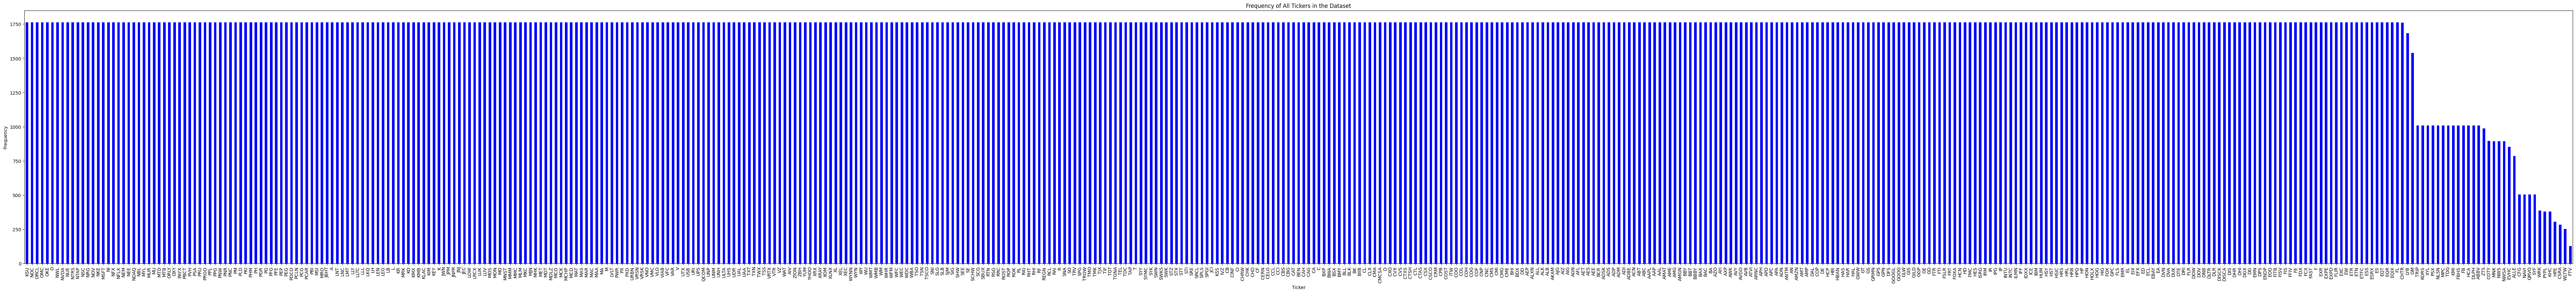

In [119]:
# Đếm số lần xuất hiện của mỗi mã cổ phiếu (Ticker)
ticker_counts = df['Ticker'].value_counts()

# Trực quan hóa toàn bộ tần suất xuất hiện của các mã cổ phiếu
plt.figure(figsize=(100, 10))  # Điều chỉnh kích thước để vừa với số lượng mã cổ phiếu
ticker_counts.plot(kind='bar', color='blue')
plt.title('Frequency of All Tickers in the Dataset')
plt.xlabel('Ticker')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Xoay nhãn mã cổ phiếu để dễ đọc hơn
plt.show()


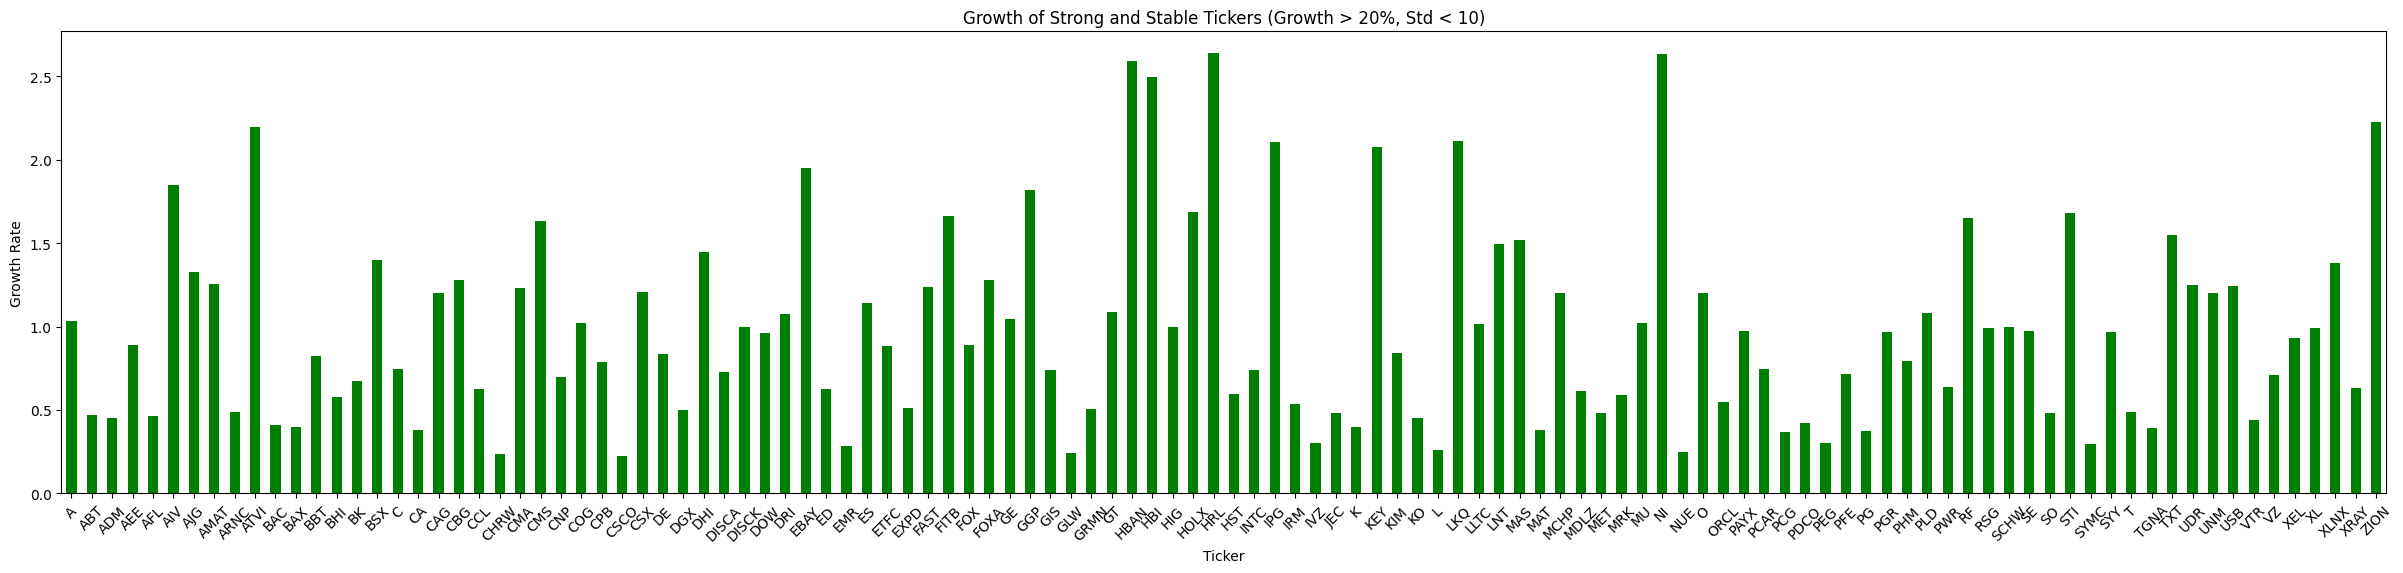

In [120]:
import pandas as pd
import matplotlib.pyplot as plt

# Giả sử bạn đã đọc dữ liệu từ file CSV vào dataframe df
# df = pd.read_csv('path_to_your_file/unadjusted_prices.csv')

# Đếm số lần xuất hiện của mỗi mã cổ phiếu (Ticker)
ticker_counts = df['Ticker'].value_counts()

# Lọc những mã cổ phiếu có tần suất >= 1750
top_tickers = ticker_counts[ticker_counts >= 1750].index

# Lọc dữ liệu của các mã cổ phiếu này
top_ticker_data = df[df['Ticker'].isin(top_tickers)]

# Tính toán sự phát triển mạnh bằng cách kiểm tra tỷ lệ thay đổi giá đóng cửa (ClosePrice)
ticker_growth = top_ticker_data.groupby('Ticker').apply(lambda x: (x['ClosePrice'].iloc[-1] - x['ClosePrice'].iloc[0]) / x['ClosePrice'].iloc[0])

# Đo lường tính ổn định bằng cách tính độ lệch chuẩn của giá đóng cửa
ticker_volatility = top_ticker_data.groupby('Ticker')['ClosePrice'].std()

# Lọc các mã cổ phiếu phát triển mạnh và ổn định
strong_stable_tickers = ticker_growth[(ticker_growth > 0.2) & (ticker_volatility < 10)]

# Trực quan hóa kết quả
plt.figure(figsize=(30, 6))
strong_stable_tickers.plot(kind='bar', color='green')
plt.title('Growth of Strong and Stable Tickers (Growth > 20%, Std < 10)')
plt.xlabel('Ticker')
plt.ylabel('Growth Rate')
plt.xticks(rotation=45)
plt.show()


**Lấy 5 cổ phiếu tốt nhất**

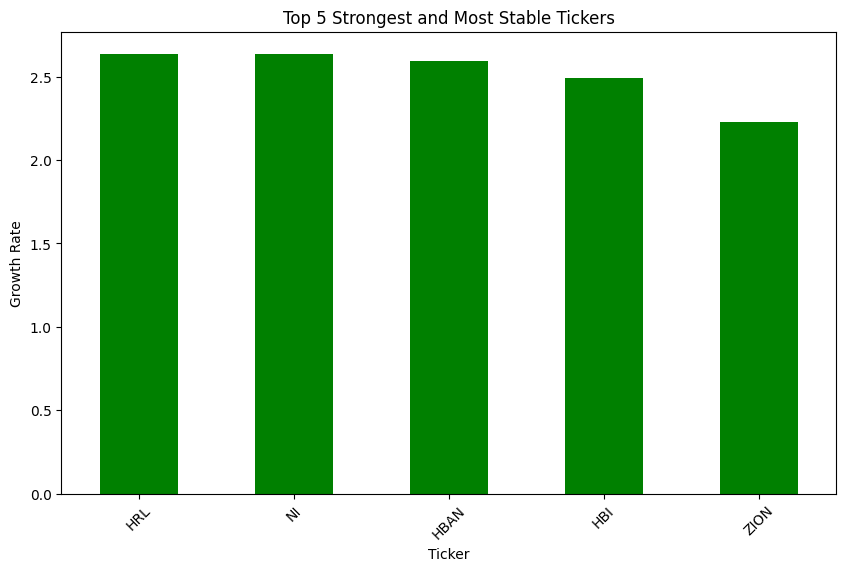

In [121]:
# Sắp xếp theo tỷ lệ tăng trưởng và lấy ra 5 mã cổ phiếu cao nhất
top_5_tickers = strong_stable_tickers.sort_values(ascending=False).head(5)

# Trực quan hóa kết quả
plt.figure(figsize=(10, 6))
top_5_tickers.plot(kind='bar', color='green')
plt.title('Top 5 Strongest and Most Stable Tickers')
plt.xlabel('Ticker')
plt.ylabel('Growth Rate')
plt.xticks(rotation=45)
plt.show()

**Lưu file csv**

In [122]:
# Danh sách các ticker bạn muốn tách
tickers = ['HRL', 'NI', 'HBAN', 'HBI', 'ZION']

# Lặp qua từng ticker và lưu file CSV tương ứng
for ticker in tickers:
    # Lọc dữ liệu theo ticker
    df_ticker = df[df['Ticker'] == ticker]

    # Lưu file CSV cho từng ticker
    df_ticker.to_csv(f'{ticker}.csv', index=False)

**Kiểm tra dữ liêu**

In [123]:
import os

# Danh sách các file cần đọc
files = ['HRL.csv', 'HBAN.csv', 'HBI.csv']
ticker_data = {}
# Hàm kiểm tra lỗi định dạng
def check_data_format(df, ticker):
    errors = []

    # Kiểm tra cột Date có phải là dạng datetime hay không
    try:
        pd.to_datetime(df['Date'])
    except ValueError:
        errors.append(f"{ticker}: Cột Date không đúng định dạng datetime.")

    # Kiểm tra cột Ticker có phải là dạng chuỗi hay không
    if not pd.api.types.is_string_dtype(df['Ticker']):
        errors.append(f"{ticker}: Cột Ticker không phải là dạng chuỗi.")

    # Kiểm tra các cột giá trị số có phải là dạng float/int hay không
    numeric_columns = ['OpenPrice', 'ClosePrice', 'LowPrice', 'HighPrice', 'Volume']
    for col in numeric_columns:
        if not pd.api.types.is_numeric_dtype(df[col]):
            errors.append(f"{ticker}: Cột {col} không đúng định dạng số (float/int).")

    return errors

# Hàm kiểm tra các lỗi trong dữ liệu
def check_data_errors(df, ticker):
    errors = []

    # Kiểm tra giá trị thiếu
    if df.isnull().values.any():
        errors.append(f"{ticker}: Có giá trị thiếu trong dữ liệu.")

    # Kiểm tra giá trị không hợp lệ
    if (df['OpenPrice'] <= 0).any():
        errors.append(f"{ticker}: Có giá trị OpenPrice <= 0.")
    if (df['ClosePrice'] <= 0).any():
        errors.append(f"{ticker}: Có giá trị ClosePrice <= 0.")
    if (df['LowPrice'] <= 0).any():
        errors.append(f"{ticker}: Có giá trị LowPrice <= 0.")
    if (df['HighPrice'] <= 0).any():
        errors.append(f"{ticker}: Có giá trị HighPrice <= 0.")
    if (df['Volume'] < 0).any():
        errors.append(f"{ticker}: Có giá trị Volume < 0.")

    # Kiểm tra sự hợp lý giữa giá Low và High
    if (df['LowPrice'] > df['HighPrice']).any():
        errors.append(f"{ticker}: Có giá trị LowPrice > HighPrice.")

    # Kiểm tra OpenPrice nằm giữa LowPrice và HighPrice
    if ((df['OpenPrice'] < df['LowPrice']) | (df['OpenPrice'] > df['HighPrice'])).any():
        errors.append(f"{ticker}: Có giá trị OpenPrice không nằm trong khoảng LowPrice và HighPrice.")

    # Kiểm tra ClosePrice nằm giữa LowPrice và HighPrice
    if ((df['ClosePrice'] < df['LowPrice']) | (df['ClosePrice'] > df['HighPrice'])).any():
        errors.append(f"{ticker}: Có giá trị ClosePrice không nằm trong khoảng LowPrice và HighPrice.")

    return errors

# Đọc và kiểm tra từng file
for file in files:
    if os.path.exists(file):
        df = pd.read_csv(file)
        ticker = file.split('.')[0]  # Lấy tên ticker từ tên file
        ticker_data[ticker] = df
        # Kiểm tra định dạng
        format_errors = check_data_format(df, ticker)
        if format_errors:
            print(f"Định dạng lỗi trong dữ liệu của {ticker}:")
            for error in format_errors:
                print(f"  - {error}")
        else:
            print(f"Định dạng đúng cho {ticker}.")

        # Kiểm tra lỗi dữ liệu
        data_errors = check_data_errors(df, ticker)
        if data_errors:
            print(f"Lỗi trong dữ liệu của {ticker}:")
            for error in data_errors:
                print(f"  - {error}")
        else:
            print(f"Không có lỗi trong dữ liệu của {ticker}.")
    else:
        print(f"File {file} không tồn tại.")

Định dạng đúng cho HRL.
Không có lỗi trong dữ liệu của HRL.
Định dạng đúng cho HBAN.
Không có lỗi trong dữ liệu của HBAN.
Định dạng đúng cho HBI.
Không có lỗi trong dữ liệu của HBI.


# 2.Phân tích và trực quan

##2.1 Phân tích các chỉ số tài chính của các công ty đã chọn

In [30]:
import pandas as pd
financial_metrics_df =  pd.read_csv('/content/drive/MyDrive/cuộc thi Bigdata/code test cuộc thi/financial_metrics.csv')
data = financial_metrics_df
financial_metrics_df

Ticker   PeriodEnd    AccPayable  AccReceivable  AdditionalIncomeExpense  \
0       NEE  2014-12-31  2.504000e+09     -7000000.0              408000000.0   
1       MAC  2012-12-31  8.159820e+08     -3735000.0              222167000.0   
2        FE  2013-12-31  2.086000e+09   -114000000.0              -99000000.0   
3       IFF  2015-12-31  3.472970e+08    -91712000.0               -3184000.0   
4       MAS  2016-12-31  1.458000e+09   -120000000.0                6000000.0   
...     ...         ...           ...            ...                      ...   
1776    MUR  2013-12-31  2.558642e+09            0.0               77403000.0   
1777    COO  2015-10-31  1.842850e+08     -4528000.0               -3083000.0   
1778    PGR  2012-12-31  1.855500e+09   -333300000.0               -1800000.0   
1779   ATVI  2013-12-31  9.910000e+08    198000000.0                      0.0   
1780    MAR  2012-12-31  1.314000e+09            0.0               59000000.0   

      AfterTaxROE         CapEx    CapSurplus  CashRatio  CashEquivalents  \
0            12.0 -3.142000e+09  7.179000e+09        6.0     5.770000e+08   
1            11.0 -1.204061e+09  3.715895e+09        NaN     1.444510e+08   
2             3.0 -2.638000e+09  9.776000e+09        3.0     2.180000e+08   
3            26.0 -1.010300e+08  1.408020e+08       25.0     1.819880e+08   
4           165.0 -1.800000e+08  0.000000e+00       68.0     9.900000e+08   
...           ...           ...           ...        ...              ...   
1776         13.0 -3.590344e+09  9.026330e+08       35.0     7.501550e+08   
1777          8.0 -2.430230e+08  1.434705e+09        3.0     1.642600e+07   
1778         15.0 -1.277000e+08  1.077000e+09        NaN     1.791000e+08   
1779         15.0 -7.400000e+07  9.682000e+09      185.0     4.410000e+09   
1780         44.0 -4.370000e+08  2.585000e+09        3.0     8.800000e+07   

      ...  CurrentAssetsTotal  CurrentLiabilitiesTotal   TotalEquity  \
0     ...        6.944000e+09             9.663000e+09  1.991600e+10   
1     ...        0.000000e+00             0.000000e+00  3.077529e+09   
2     ...        4.013000e+09             7.637000e+09  1.269200e+10   
3     ...        1.455884e+09             7.421280e+08  1.590318e+09   
4     ...        2.934000e+09             1.460000e+09 -2.980000e+08   
...   ...                 ...                      ...           ...   
1776  ...        3.508643e+09             3.224031e+09  8.595730e+09   
1777  ...        8.414280e+08             5.687820e+08  2.667509e+09   
1778  ...        0.000000e+00             0.000000e+00  6.007000e+09   
1779  ...        6.241000e+09             2.405000e+09  6.622000e+09   
1780  ...        1.475000e+09             2.773000e+09 -1.285000e+09   

      TotalLiabilities.1  LiabilitiesAndEquityTotal  TotalRevenue  \
0           5.468900e+10               7.460500e+10  1.702100e+10   
1           6.233680e+09               9.311209e+09  7.975170e+08   
2           3.773200e+10               5.042400e+10  1.489200e+10   
3           2.126464e+09               3.716782e+09  3.023189e+09   
4           5.435000e+09               5.137000e+09  7.357000e+09   
...                  ...                        ...           ...   
1776        8.913754e+09               1.750948e+10  5.312686e+09   
1777        1.792355e+09               4.459864e+09  1.797060e+09   
1778        1.668770e+10               2.269470e+10  1.708390e+10   
1779        7.390000e+09               1.401200e+10  4.583000e+09   
1780        7.627000e+09               6.342000e+09  1.181400e+10   

      TreasuryStock  FiscalYear   EPS  EstSharesOutstanding  
0      0.000000e+00      2014.0  5.67          4.347443e+08  
1      0.000000e+00      2012.0  2.51          1.344327e+08  
2      0.000000e+00      2013.0  0.94          4.170213e+08  
3     -1.555769e+09      2015.0  5.19          8.077977e+07  
4      0.000000e+00         NaN   NaN                   NaN  
...             ...         ...   ...    

In [31]:
# Danh sách các tickers cần lấy
tickers = ['HRL', 'HBAN', 'HBI', 'ZION']

filtered_data = data[data['Ticker'].isin(tickers)]

# Lưu dữ liệu tại local directory
for ticker in tickers:
    # Lọc dữ liệu theo ticker
    ticker_data = financial_metrics_df[financial_metrics_df['Ticker'] == ticker]

    # Lưu dữ liệu thành file CSV riêng cho từng ticker
    file_name = f"{ticker}_financial_metrics.csv"
    ticker_data.to_csv(f'{file_name}', index=False)

In [32]:
filtered_data = data[data['Ticker'].isin(tickers)]

filtered_data.to_csv('filtered_tickers.csv', index=False)

data = filtered_data
data = data.dropna(subset=['EPS'])

# 2. Chuẩn hóa định dạng ngày tháng trong cột 'PeriodEnd'
data['PeriodEnd'] = pd.to_datetime(data['PeriodEnd'], errors='coerce')

# 3. Đảm bảo các cột số có kiểu dữ liệu phù hợp (float cho các chỉ số tài chính)
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

columns_to_drop = ['AccReceivable', 'AdditionalIncomeExpense', 'AfterTaxROE',
                   'CapEx', 'CapSurplus', 'CashEquivalents', 'InventoryChanges']
# data = data.drop(columns=columns_to_drop)
data_cleaned = data.dropna(axis=1)
data

<ipython-input-32-bb50b8ff8efd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PeriodEnd'] = pd.to_datetime(data['PeriodEnd'], errors='coerce')
<ipython-input-32-bb50b8ff8efd>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')


Ticker  PeriodEnd    AccPayable  AccReceivable  AdditionalIncomeExpense  \
182     HBI 2013-12-28  7.812960e+08      4803000.0              -17501000.0   
215     HBI 2016-01-02  1.133305e+09    -21974000.0               -3210000.0   
273     HRL 2014-10-26  9.546920e+08    -20486000.0                3236000.0   
315    ZION 2013-12-31  0.000000e+00            0.0             -120192000.0   
362    HBAN 2014-12-31  1.504626e+09            0.0                      0.0   
406    HBAN 2015-12-31  1.472073e+09            0.0                      0.0   
517    ZION 2014-12-31  0.000000e+00            0.0              -44422000.0   
776    ZION 2015-12-31  0.000000e+00            0.0               -2530000.0   
888    HBAN 2013-12-31  1.059888e+09            0.0                      0.0   
1168    HRL 2016-10-30  1.053196e+09     21389000.0                6191000.0   
1181    HBI 2015-01-03  1.112659e+09      1228000.0               -2599000.0   
1391   ZION 2012-12-31  0.000000e+00            0.0                      0.0   
1543   HBAN 2012-12-31  1.155643e+09            0.0                 798000.0   
1582    HRL 2013-10-27  7.840090e+08    -44459000.0                4971000.0   

      AfterTaxROE        CapEx    CapSurplus  CashRatio  CashEquivalents  ...  \
182          27.0  -43627000.0  2.852270e+08       12.0     1.158630e+08  ...   
215          34.0  -99375000.0  2.775690e+08       21.0     3.191690e+08  ...   
273          17.0 -159138000.0  0.000000e+00       35.0     3.341740e+08  ...   
315           4.0  -88580000.0  0.000000e+00        NaN     1.395780e+10  ...   
362          10.0  -58862000.0  7.221745e+09        NaN     1.409189e+10  ...   
406          11.0  -93097000.0  7.038502e+09        NaN     1.587102e+10  ...   
517           5.0 -175799000.0  0.000000e+00        NaN     1.396843e+10  ...   
776           4.0 -157361000.0  0.000000e+00        NaN     1.576313e+10  ...   
888          11.0 -102208000.0  7.398515e+09        NaN     1.223917e+10  ...   
1168         20.0 -255524000.0  0.000000e+00       39.0     4.151430e+08  ...   
1181         29.0  -64311000.0  2.909260e+08       16.0     2.398550e+08  ...   
1391          6.0  -68894000.0  0.000000e+00        NaN     1.447275e+10  ...   
1543         11.0 -129641000.0  7.475149e+09        NaN     1.073498e+10  ...   
1582         16.0 -106762000.0  0.000000e+00       55.0     4.340140e+08  ...   

      CurrentAssetsTotal  CurrentLiabilitiesTotal   TotalEquity  \
182         2.243666e+09             9.992780e+08  1.230623e+09   
215         2.917867e+09             1.503909e+09  1.275891e+09   
273         2.132771e+09             9.546920e+08  3.605678e+09   
315         0.000000e+00             0.000000e+00  6.464563e+09   
362         0.000000e+00             0.000000e+00  6.328170e+09   
406         0.000000e+00             0.000000e+00  6.594606e+09   
517         0.000000e+00             0.000000e+00  7.369530e+09   
776         0.000000e+00             0.000000e+00  7.507519e+09   
888         0.000000e+00             0.000000e+00  6.090153e+09   
1168        2.029912e+09             1.053196e+09  4.448006e+09   
1181        2.550167e+09             1.482414e+09  1.386772e+09   
1391        0.000000e+00             0.000000e+00  6.052069e+09   
1543        0.000000e+00             0.000000e+00  5.790211e+09   
1582        2.047413e+09             7.840090e+08  3.311040e+09   

      TotalLiabilities.1  LiabilitiesAndEquityTotal  TotalRevenue  \
182         2.859425e+09               4.090048e+09  4.627802e+09   
215         4.321699e+09               5.597590e+09  5.731549e+09   
273         1.849941e+09               5.455619e+09  9.316256e+09   
315         4.956656e+10               5.603113e+10  2.278812e+09   
362         5.996984e+10               6.629801e+10  2.955641e+09   
406         6.444994e+10               7.104455e+10  3.153251e+09   
517         4.983934e+10               5.720887e+10  2.361631e+09   
776         5.216201e+10      

In [33]:
import pandas as pd

# Tạo hàm để phân tích chi tiết từng công ty
def analyze_company(data, ticker):
    company_data = data[data['Ticker'] == ticker]

    # Tính toán các chỉ số quan trọng
    revenue = company_data['TotalRevenue'].mean()
    capex = company_data['CapEx'].mean()
    equity = company_data['TotalEquity'].mean()
    liabilities = company_data['TotalLiabilities.1'].mean()
    roe = company_data['AfterTaxROE'].mean()
    eps = company_data['EPS'].mean()

    # In kết quả phân tích
    print(f"Phân tích chi tiết cho công ty {ticker}:")
    print(f"- Tổng Doanh Thu: {revenue}")
    print(f"- Vốn Đầu Tư (CapEx): {capex}")
    print(f"- Vốn Chủ Sở Hữu (Equity): {equity}")
    print(f"- Nợ Phải Trả (Liabilities): {liabilities}")
    print(f"- Lợi Nhuận Trên Vốn Chủ Sở Hữu (ROE): {roe}")
    print(f"- Thu Nhập Trên Cổ Phiếu (EPS): {eps}")
    print("\n")

# Danh sách các ticker cần phân tích
tickers = ['HRL', 'HBAN', 'ZION', 'HBI']

# Phân tích từng công ty trong danh sách
for ticker in tickers:
    analyze_company(data, ticker)


Phân tích chi tiết cho công ty HRL:
- Tổng Doanh Thu: 9197044666.666666
- Vốn Đầu Tư (CapEx): -173808000.0
- Vốn Chủ Sở Hữu (Equity): 3788241333.3333335
- Nợ Phải Trả (Liabilities): 1792280666.6666667
- Lợi Nhuận Trên Vốn Chủ Sở Hữu (ROE): 17.666666666666668
- Thu Nhập Trên Cổ Phiếu (EPS): 1.5766666666666664


Phân tích chi tiết cho công ty HBAN:
- Tổng Doanh Thu: 3004577250.0
- Vốn Đầu Tư (CapEx): -95952000.0
- Vốn Chủ Sở Hữu (Equity): 6200785000.0
- Nợ Phải Trả (Liabilities): 57039945000.0
- Lợi Nhuận Trên Vốn Chủ Sở Hữu (ROE): 10.75
- Thu Nhập Trên Cổ Phiếu (EPS): 0.7474999999999999


Phân tích chi tiết cho công ty ZION:
- Tổng Doanh Thu: 2327406500.0
- Vốn Đầu Tư (CapEx): -122658500.0
- Vốn Chủ Sở Hữu (Equity): 6848420250.0
- Nợ Phải Trả (Liabilities): 50256940750.0
- Lợi Nhuận Trên Vốn Chủ Sở Hữu (ROE): 4.75
- Thu Nhập Trên Cổ Phiếu (EPS): 1.3575


Phân tích chi tiết cho công ty HBI:
- Tổng Doanh Thu: 5228032333.333333
- Vốn Đầu Tư (CapEx): -69104333.33333333
- Vốn Chủ Sở Hữu (Equ

In [34]:
import pandas as pd

# Extracting key metrics for detailed analysis
key_metrics = filtered_data.groupby('Ticker').agg({
    'TotalRevenue': 'mean',
    'CapEx': 'mean',
    'TotalEquity': 'mean',
    'TotalLiabilities.1': 'mean',
    'CashEquivalents': 'mean',
    'AfterTaxROE': 'mean',
    'EPS': 'mean'
})

# Renaming columns for better readability
key_metrics.columns = ['Avg. Revenue', 'Avg. CapEx', 'Avg. Equity', 'Avg. Liabilities', 'Avg. Cash', 'Avg. ROE (%)', 'Avg. EPS']

# Print the key metrics table
print(key_metrics)


        Avg. Revenue   Avg. CapEx   Avg. Equity  Avg. Liabilities  \
Ticker                                                              
HBAN    3.004577e+09  -95952000.0  6.200785e+09      5.703994e+10   
HBI     5.428074e+09  -72678000.0  1.279300e+09      4.171591e+09   
HRL     9.213749e+09 -166371750.0  3.840730e+09      1.879619e+09   
ZION    2.327406e+09 -122658500.0  6.848420e+09      5.025694e+10   

           Avg. Cash  Avg. ROE (%)  Avg. EPS  
Ticker                                        
HBAN    1.323427e+10         10.75  0.747500  
HBI     2.837830e+08         33.50  2.800000  
HRL     3.826425e+08         17.50  1.576667  
ZION    1.454053e+10          4.75  1.357500  


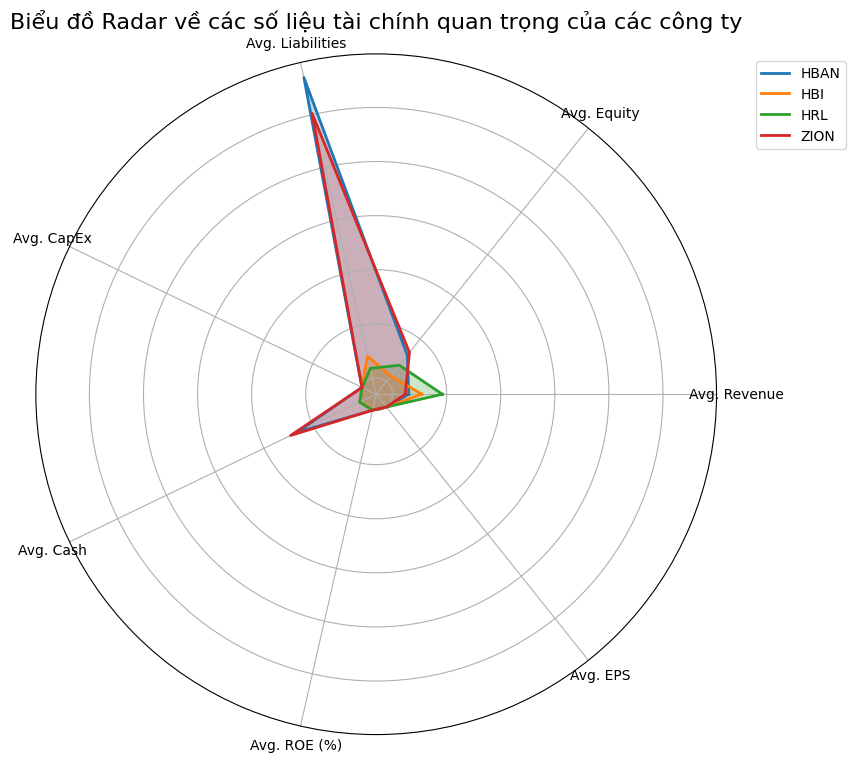

In [35]:
import numpy as np
from math import pi
import matplotlib.pyplot as plt

# Define categories for radar chart
categories = ['Avg. Revenue', 'Avg. Equity', 'Avg. Liabilities', 'Avg. CapEx', 'Avg. Cash', 'Avg. ROE (%)', 'Avg. EPS']
num_vars = len(categories)

# Normalize the data
radar_data = key_metrics.reset_index()
radar_data = radar_data[categories]

# Prepare angles for radar chart
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Closing the circle

# Plot radar chart for each company
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for i, row in radar_data.iterrows():
    values = row.tolist()
    values += values[:1]  # Closing the radar chart
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=key_metrics.index[i])
    ax.fill(angles, values, alpha=0.25)

# Add labels and title
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.title('Biểu đồ Radar về các số liệu tài chính quan trọng của các công ty', fontsize=16)

# Show the radar chart
plt.tight_layout()
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()


Trên đây là biểu đồ radar (nhện) so sánh các số liệu tài chính quan trọng của các công ty được chọn. Biểu đồ này cung cấp cái nhìn toàn diện về hiệu quả hoạt động của mỗi công ty về Doanh thu, Vốn chủ sở hữu, Nợ phải trả, CapEx, Dự trữ tiền mặt, ROE và EPS. Biểu đồ radar cung cấp sự so sánh nhanh chóng trên nhiều khía cạnh, giúp xác định điểm mạnh và điểm yếu dễ dàng hơn.**bold text**

<Figure size 1000x800 with 0 Axes>

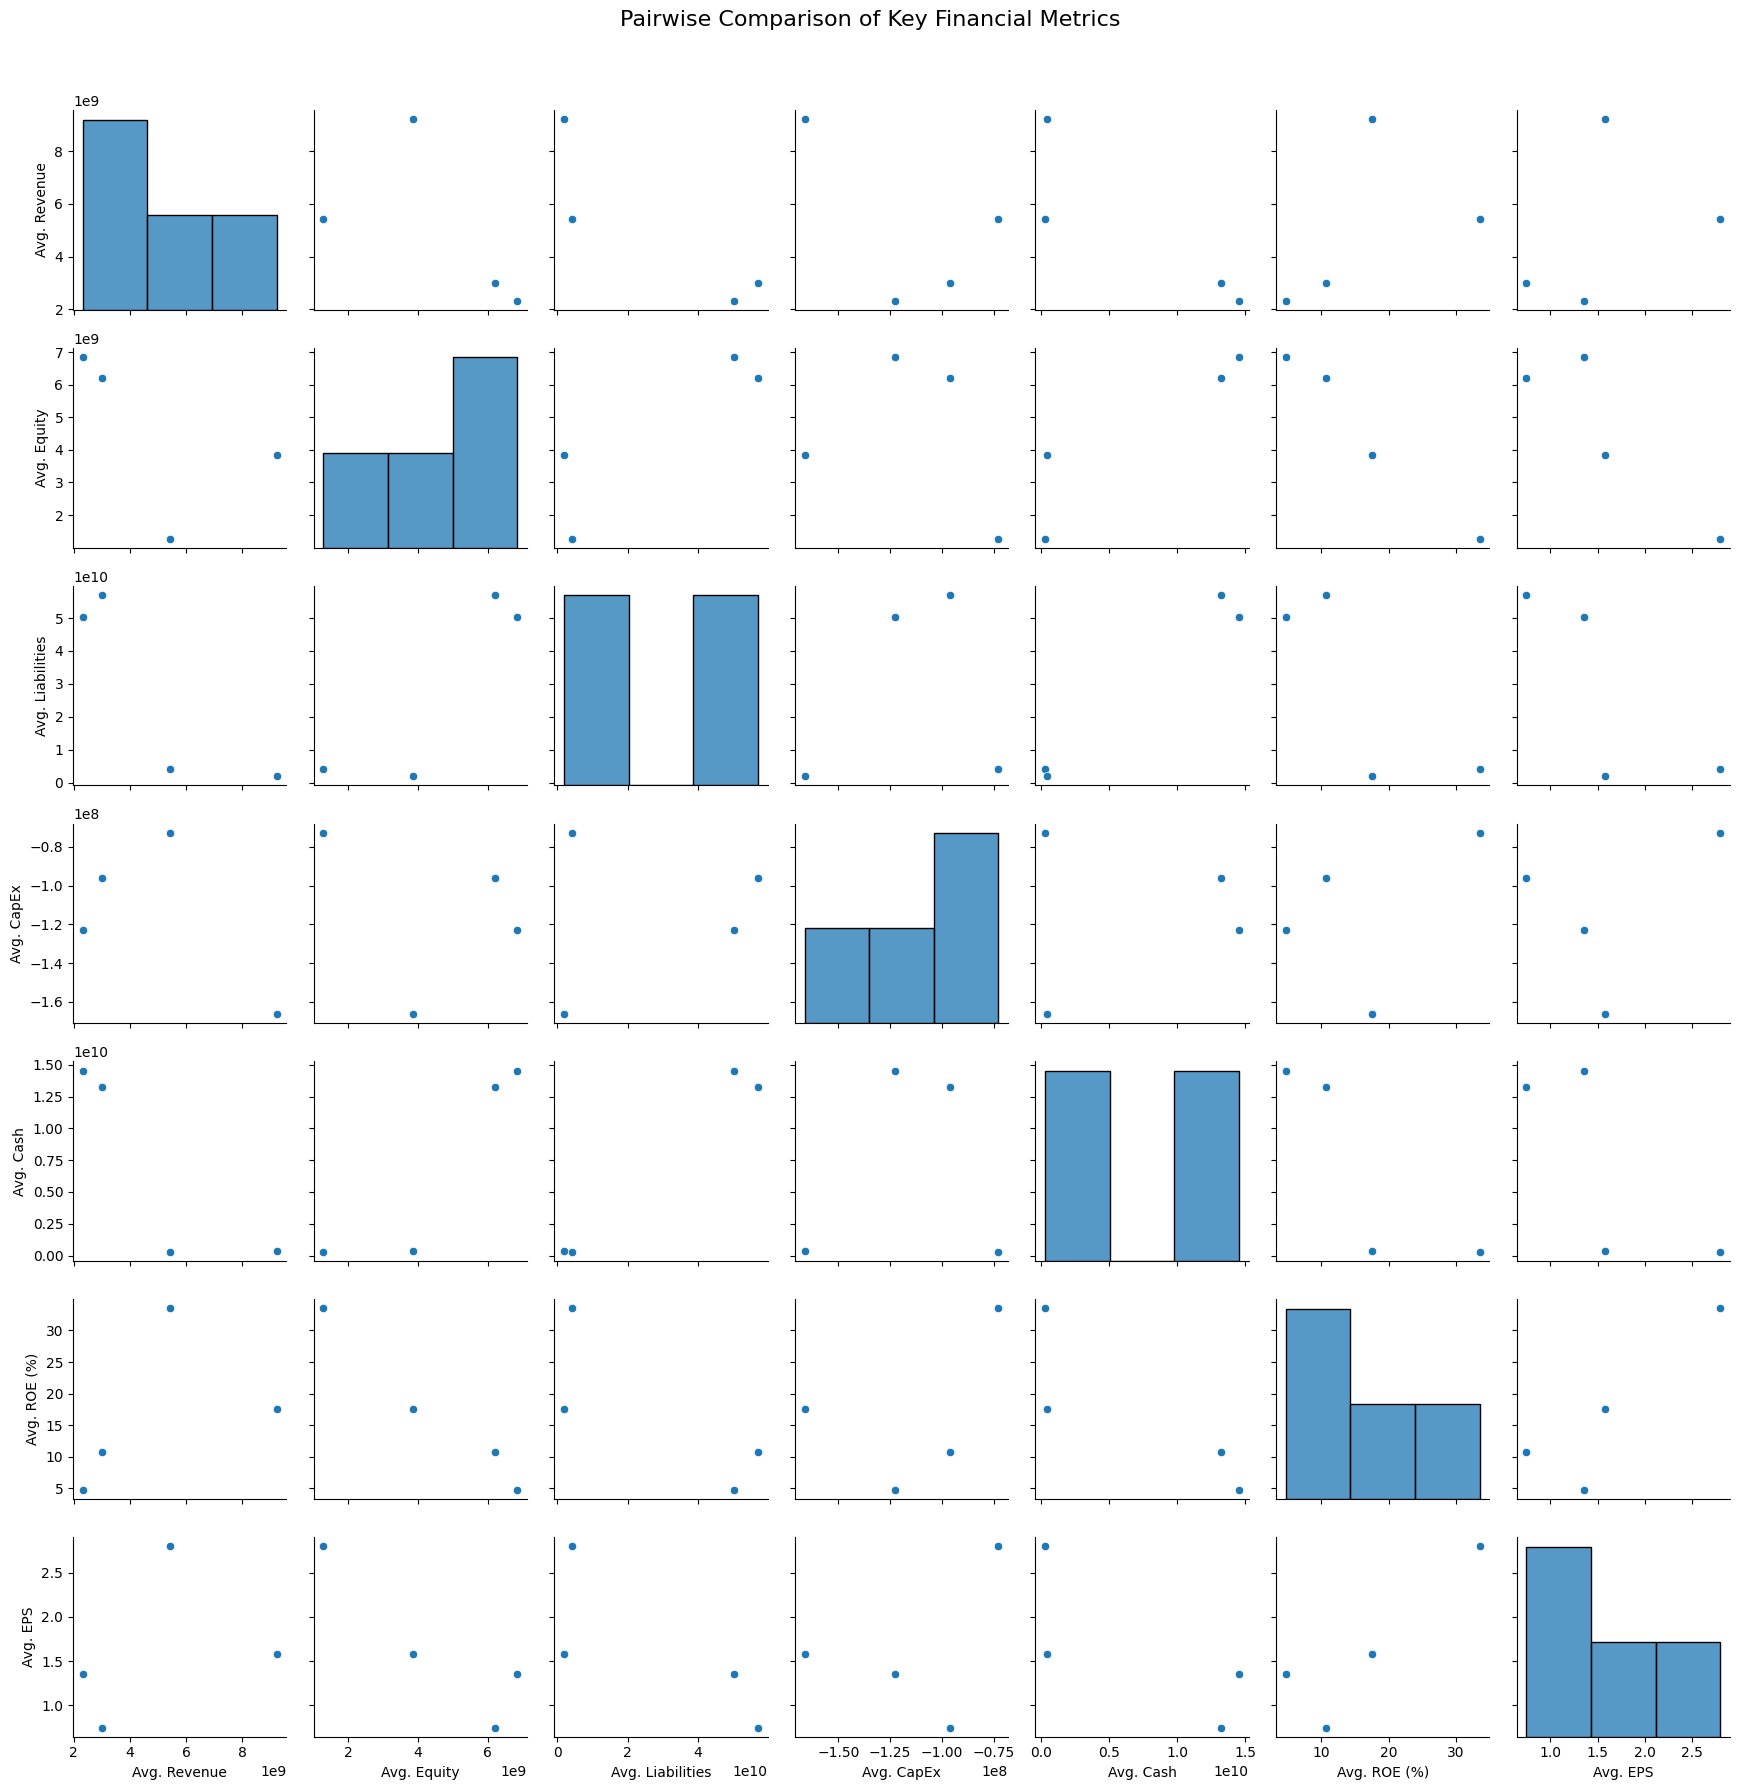

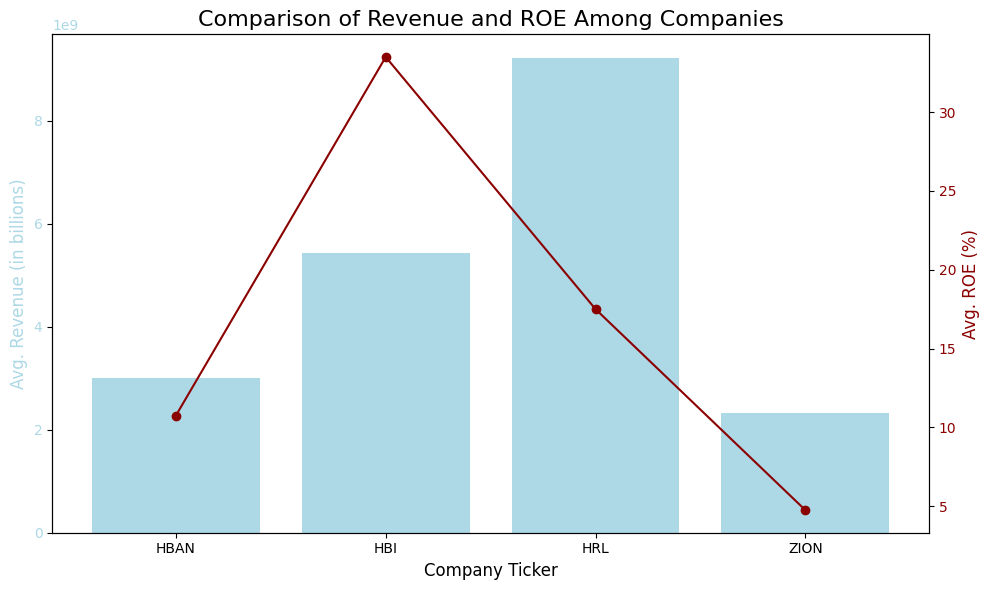

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap for key metrics
plt.figure(figsize=(10, 8))
corr_data = key_metrics[['Avg. Revenue', 'Avg. Equity', 'Avg. Liabilities', 'Avg. CapEx', 'Avg. Cash', 'Avg. ROE (%)', 'Avg. EPS']].corr()

# Pairplot (scatter matrix) for key metrics
sns.pairplot(key_metrics[['Avg. Revenue', 'Avg. Equity', 'Avg. Liabilities', 'Avg. CapEx', 'Avg. Cash', 'Avg. ROE (%)', 'Avg. EPS']])
plt.suptitle('Pairwise Comparison of Key Financial Metrics', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

# Dual-axis bar chart for Revenue and ROE
fig, ax1 = plt.subplots(figsize=(10, 6))

# First plot - Revenue
ax1.bar(key_metrics.index, key_metrics['Avg. Revenue'], color='lightblue', label='Avg. Revenue (in billions)')
ax1.set_xlabel('Company Ticker', fontsize=12)
ax1.set_ylabel('Avg. Revenue (in billions)', fontsize=12, color='lightblue')
ax1.tick_params(axis='y', labelcolor='lightblue')

# Second plot - ROE on the same axis
ax2 = ax1.twinx()
ax2.plot(key_metrics.index, key_metrics['Avg. ROE (%)'], color='darkred', marker='o', label='Avg. ROE (%)')
ax2.set_ylabel('Avg. ROE (%)', fontsize=12, color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')

plt.title('Comparison of Revenue and ROE Among Companies', fontsize=16)
fig.tight_layout()
plt.show()


Biểu đồ 1: Biểu đồ bong bóng (Bubble Chart) - EPS và Total Revenue
Insight: So sánh EPS và Tổng doanh thu, với kích thước bong bóng dựa trên Total Assets để hiểu lợi nhuận, doanh thu và quy mô tài sản của công ty.

In [37]:
df = data

Biểu đồ 1: Biểu đồ bong bóng (Bubble Chart) - EPS và Total Revenue
Insight: So sánh EPS và Tổng doanh thu, với kích thước bong bóng dựa trên Total Assets để hiểu lợi nhuận, doanh thu và quy mô tài sản của công ty.

In [38]:
import plotly.express as px

df['Size'] = df['TotalAssets'] / df['TotalAssets'].max() * 100  # Normalize asset size for better visualization

fig = px.scatter(df, x='TotalRevenue', y='EPS', size='Size', color='Ticker',
                 hover_name='Ticker', size_max=60,
                 title='EPS and Total Revenue Comparison with Asset Size',
                 labels={'TotalRevenue': 'Total Revenue', 'EPS': 'Earnings Per Share'})
fig.show()


<ipython-input-38-70d4d8062a3b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Size'] = df['TotalAssets'] / df['TotalAssets'].max() * 100  # Normalize asset size for better visualization


Biểu đồ 2: Biểu đồ nhiệt (Heatmap) - ROE, EPS, và Current Ratio
Insight: Đánh giá mối quan hệ giữa ROE, EPS, và Current Ratio để xác định cách chúng ảnh hưởng lẫn nhau giữa các công ty.

In [39]:
import plotly.graph_objects as go

# Preparing data for heatmap
heatmap_data = df[['Ticker', 'AfterTaxROE', 'EPS', 'CurrentRatio']].set_index('Ticker')
fig = go.Figure(data=go.Heatmap(
                    z=heatmap_data.T,
                    x=heatmap_data.index,
                    y=heatmap_data.columns,
                    colorscale='Viridis'))
fig.update_layout(title='Relationship between ROE, EPS, and Current Ratio',
                  xaxis_nticks=36)
fig.show()


Biểu đồ 3: Biểu đồ radar (Radar Chart) - Tổng quan các chỉ số chính
Insight: So sánh hiệu quả kinh doanh, tài chính và hiệu quả quản lý của các công ty dựa trên nhiều chỉ số khác nhau

In [40]:
import plotly.express as px

# Normalizing data for radar chart
norm_df = df[['AfterTaxROE', 'CurrentRatio', 'GrossMargin', 'OperatingMargin', 'QuickRatio']].apply(
    lambda x: (x - x.min()) / (x.max() - x.min()))

# Create a radar chart for each company
figs = []
for index, row in norm_df.iterrows():
    fig = px.line_polar(r=row, theta=norm_df.columns, line_close=True,
                        title=f'Radar Chart for {df.loc[index, "Ticker"]}',
                        template='plotly_dark')
    figs.append(fig)

# Show the first chart as an example
figs[0].show()


In [41]:
# Check for any data issues (such as missing values or invalid data) in each saved file for the tickers

import os

# Define a function to check for issues in the CSV files
def check_data_issues(file_path):
    try:
        # Load the file into a dataframe
        df = pd.read_csv(file_path)

        # Check for missing values
        missing_values = df.isnull().sum().sum()

        # Check for any rows with invalid data types
        invalid_data_types = df.select_dtypes(include=['object']).apply(lambda x: x.str.contains('NaN|N/A|NULL', na=False)).sum().sum()

        # Print results
        if missing_values > 0 or invalid_data_types > 0:
            print(f"Issues found in {file_path}:")
            print(f" - Missing values: {missing_values}")
            print(f" - Invalid data entries: {invalid_data_types}")
        else:
            print(f"No issues found in {file_path}")

    except Exception as e:
        print(f"Error reading {file_path}: {e}")

# Check the generated files for each ticker
for ticker in tickers:
    file_name = f"{ticker}_financial_metrics.csv"
    if os.path.exists(file_name):
        check_data_issues(file_name)
    else:
        print(f"File {file_name} does not exist.")



Issues found in HRL_financial_metrics.csv:
 - Missing values: 3
 - Invalid data entries: 0
Issues found in HBAN_financial_metrics.csv:
 - Missing values: 12
 - Invalid data entries: 0
Issues found in ZION_financial_metrics.csv:
 - Missing values: 12
 - Invalid data entries: 0
Issues found in HBI_financial_metrics.csv:
 - Missing values: 3
 - Invalid data entries: 0


In [42]:
import pandas as pd

# Load the CSV files for each ticker
file_paths = {
    'HRL': '/content/HRL_financial_metrics.csv',
    'HBAN': '/content/HBAN_financial_metrics.csv',
    'HBI': '/content/HBI_financial_metrics.csv',
    'ZION': '/content/ZION_financial_metrics.csv'
}

# Load the dataframes
dfs = {ticker: pd.read_csv(path) for ticker, path in file_paths.items()}

# Function to remove columns that are all zeros or all missing values
def remove_zero_and_null_columns(df):
    # Remove columns that are all zeros
    df_cleaned = df.loc[:, (df != 0).any(axis=0)]
    # Remove columns that are all NaN
    df_cleaned = df_cleaned.dropna(axis=1, how='all')
    return df_cleaned

# Apply the cleaning function to all tickers
cleaned_dfs = {ticker: remove_zero_and_null_columns(df) for ticker, df in dfs.items()}

# Find the common columns across all tickers (intersection of columns)
common_columns = set(cleaned_dfs['HRL'].columns)
for df in cleaned_dfs.values():
    common_columns.intersection_update(df.columns)

# Filter each dataframe to retain only the common columns
final_dfs = {ticker: df[list(common_columns)] for ticker, df in cleaned_dfs.items()}

# Save the cleaned dataframes with only the common columns to new CSV files
for ticker, df in final_dfs.items():
    df.to_csv(f'/content/{ticker}_cleaned_financial_metrics.csv', index=False)

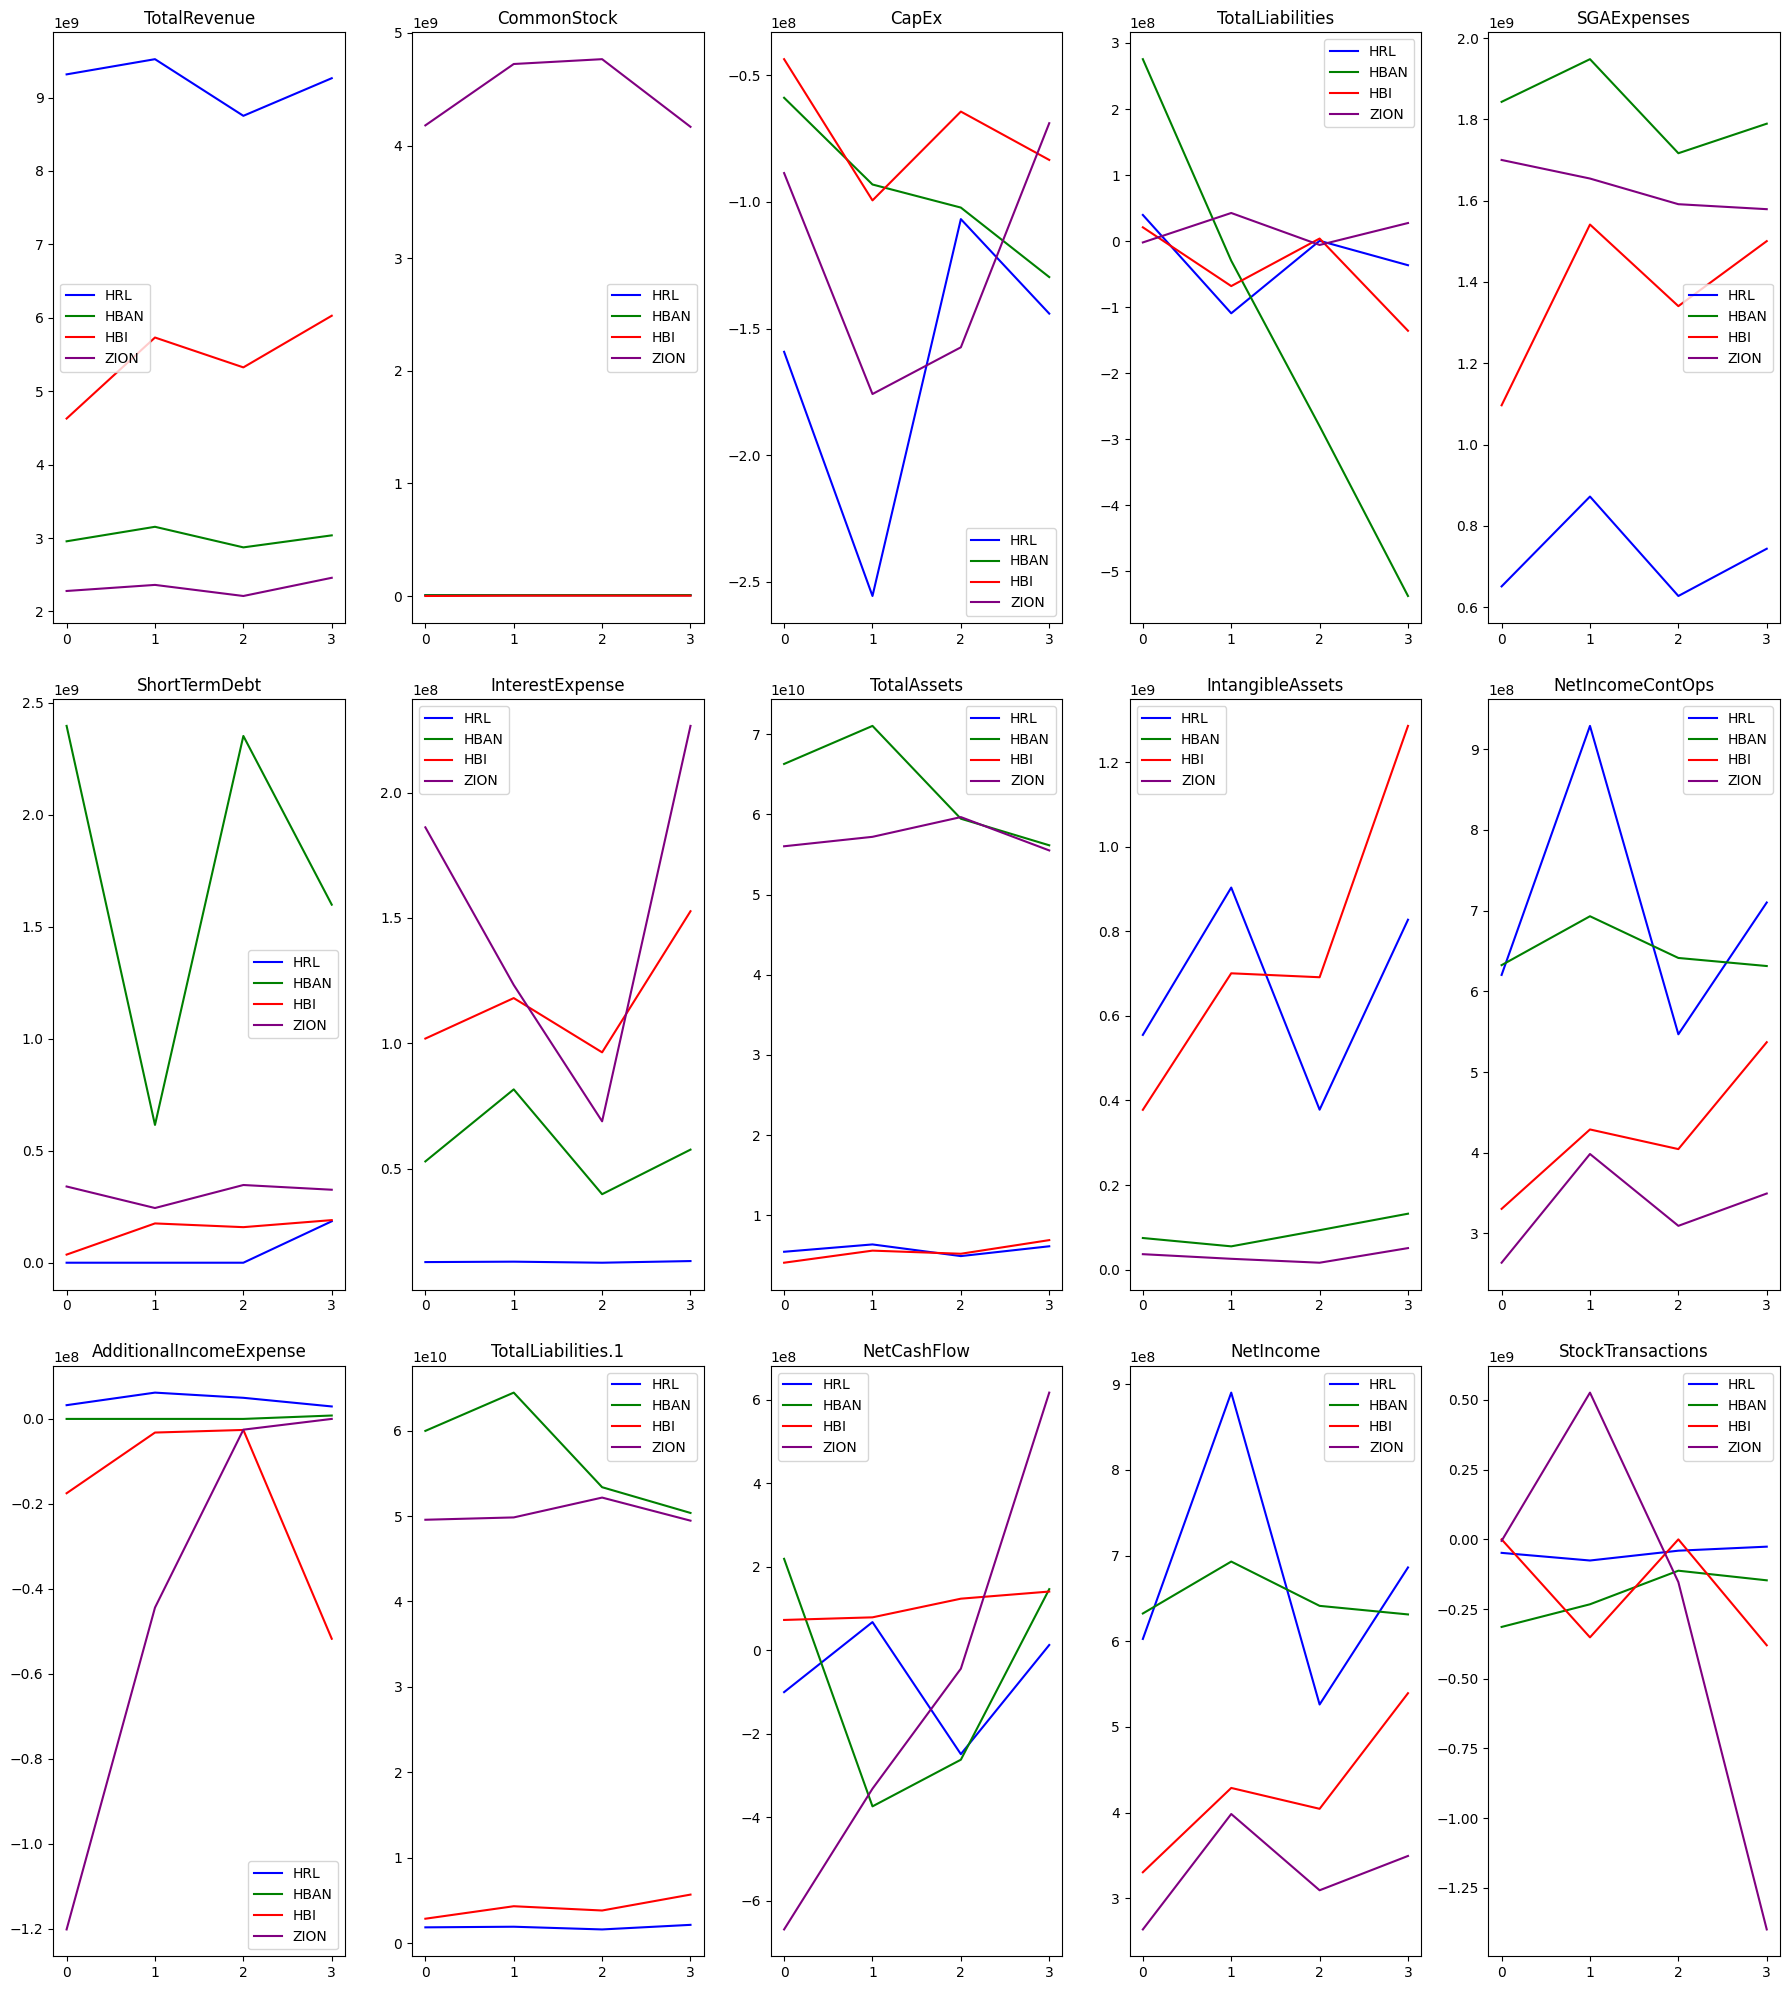

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned data
file_paths = {
    'HRL': '/content/HRL_cleaned_financial_metrics.csv',
    'HBAN': '/content/HBAN_cleaned_financial_metrics.csv',
    'HBI': '/content/HBI_cleaned_financial_metrics.csv',
    'ZION': '/content/ZION_cleaned_financial_metrics.csv'
}

# Load the dataframes
dfs = {ticker: pd.read_csv(path) for ticker, path in file_paths.items()}

# Select the 15 most important columns for financial analysis
# Here we assume that we choose columns based on general importance for financial analysis like:
# revenue, profit, ROA, ROE, current ratio, etc. For this example, we will just take the first 15 columns.
# You can customize this list based on domain-specific financial analysis criteria.
important_columns = dfs['HRL'].columns[:15]

# Filter dataframes to include only the important columns
filtered_dfs = {ticker: df[important_columns] for ticker, df in dfs.items()}

# Set up the plot colors for each ticker
colors = {
    'HRL': 'blue',
    'HBAN': 'green',
    'HBI': 'red',
    'ZION': 'purple'
}

# Create subplots to visualize the comparison of these 15 financial metrics
fig, axs = plt.subplots(3, 5, figsize=(18, 20))
axs = axs.ravel()

# Plot each of the 15 financial metrics for each ticker
for i, column in enumerate(important_columns):
    for ticker, df in filtered_dfs.items():
        axs[i].plot(df[column], label=ticker, color=colors[ticker])
    axs[i].set_title(column)
    axs[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()




1. **Profit Margin**:
   - Biểu đồ này cho thấy tỷ suất lợi nhuận của các công ty (HRL, HBAN, HBI, ZION).
   - HRL và ZION có lợi nhuận khá ổn định. Trong khi đó, HBI có sự dao động lớn, cho thấy tình hình kinh doanh không ổn định. HBAN có mức lợi nhuận thấp nhất, biểu thị rằng hiệu quả quản lý chi phí hoặc tăng trưởng doanh thu kém hơn các công ty khác.

2. **Investing Cash Flow**:
   - Dòng tiền đầu tư là chỉ báo về việc công ty đang sử dụng tiền để đầu tư vào tài sản dài hạn như nhà máy, thiết bị hoặc các khoản đầu tư khác.
   - HBI và ZION đang có xu hướng dòng tiền đầu tư giảm, điều này có thể cho thấy họ đang giảm mức đầu tư hoặc bán bớt tài sản. HRL và HBAN có mức tăng dòng tiền đầu tư, cho thấy họ đang tiếp tục đầu tư vào các dự án mới.

3. **Total Liabilities**:
   - Tổng nợ phải trả của các công ty.
   - HRL và HBI có nợ phải trả thấp và ít thay đổi. HBAN có mức nợ tăng mạnh, có thể là dấu hiệu của việc vay nợ để tài trợ cho các dự án hoặc tăng trưởng. ZION có mức giảm nợ mạnh, có thể do công ty trả nợ hoặc tái cấu trúc tài chính.

4. **Net Cash Flow**:
   - Dòng tiền ròng cho thấy sự chênh lệch giữa dòng tiền vào và ra.
   - HRL và ZION có dòng tiền khá ổn định. HBI và HBAN có dòng tiền biến động mạnh hơn, cho thấy dòng tiền của họ có thể bị ảnh hưởng bởi nhiều yếu tố như chi phí hoạt động hoặc đầu tư.

5. **Total Revenue**:
   - Doanh thu là tổng số tiền thu được từ bán hàng và dịch vụ.
   - HRL có doanh thu cao và ổn định nhất. ZION và HBI có sự dao động nhẹ, nhưng vẫn giữ được mức doanh thu ổn định. HBAN có doanh thu thấp hơn các công ty khác, thể hiện rằng hoạt động kinh doanh có thể bị hạn chế.

6. **Retained Earnings**:
   - Lợi nhuận giữ lại là phần lợi nhuận sau khi trả cổ tức, được công ty giữ lại để tái đầu tư.
   - HRL và ZION có mức lợi nhuận giữ lại ổn định. HBI có lợi nhuận giữ lại dao động, có thể do công ty có chiến lược chi trả cổ tức hoặc tái đầu tư biến động.

7. **Est Shares Outstanding**:
   - Số lượng cổ phiếu đang lưu hành ước tính cho thấy quy mô của công ty và khả năng phát hành thêm cổ phiếu.
   - HBI có sự tăng đột biến về số lượng cổ phiếu, có thể là kết quả của việc phát hành thêm cổ phiếu để huy động vốn. Các công ty còn lại giữ số cổ phiếu ổn định.

8. **Net Income Adjustments**:
   - Điều chỉnh thu nhập ròng có thể do các khoản chi phí bất thường hoặc thay đổi trong chính sách kế toán.
   - HBAN và HBI có sự dao động lớn, cho thấy có nhiều khoản điều chỉnh đối với lợi nhuận ròng của họ. HRL và ZION ổn định hơn.

9. **Intangible Assets**:
   - Tài sản vô hình bao gồm các giá trị thương hiệu, bằng sáng chế và các tài sản không hữu hình khác.
   - HBI và HRL có tài sản vô hình tăng, có thể do họ đang đầu tư nhiều vào giá trị thương hiệu hoặc các công nghệ độc quyền. HBAN và ZION ít đầu tư vào tài sản vô hình hơn.

10. **Financing Cash Flow**:
    - Dòng tiền tài trợ biểu thị việc công ty nhận được hoặc trả lại các nguồn tài trợ như vốn cổ đông hoặc vay nợ.
    - ZION có dòng tiền tài trợ tăng, cho thấy công ty có thể vay nợ hoặc phát hành cổ phiếu để huy động vốn. HBI có xu hướng dòng tiền tài trợ giảm, có thể do công ty đã trả bớt nợ.

11. **Total Liabilities**:
    - Tương tự với biểu đồ trước, điều này cho thấy mức nợ phải trả tổng của các công ty. ZION có xu hướng giảm nợ, trong khi HBAN đang gia tăng nợ phải trả.

12. **Net Borrowings**:
    - Nợ ròng thể hiện mức vay nợ sau khi trừ đi các khoản tiền gửi hoặc tài sản có thanh khoản cao.
    - ZION và HBAN có xu hướng vay nợ nhiều hơn. HBI và HRL ổn định hơn và có ít thay đổi về mức vay nợ.

13. **Operating Activities Other**:
    - Hoạt động khác liên quan đến hoạt động kinh doanh chính nhưng không thuộc các khoản doanh thu và chi phí tiêu chuẩn.
    - HRL và ZION có xu hướng duy trì mức hoạt động ổn định, trong khi HBI và HBAN có sự biến động lớn hơn, có thể do các hoạt động tài chính hoặc đầu tư phức tạp hơn.

14. **Other Assets**:
    - Các tài sản khác bao gồm các tài sản ngoài các tài sản chính như tiền mặt, đầu tư tài chính, và tài sản cố định.
    - HBI có xu hướng tăng mạnh về các tài sản khác, điều này có thể là dấu hiệu của việc công ty đa dạng hóa đầu tư. HRL giữ mức tài sản khác ổn định.

15. **Liabilities And Equity Total**:
    - Tổng tài sản và nợ cho thấy quy mô tổng thể của công ty về mặt tài chính.
    - HRL và HBAN có xu hướng ổn định về tổng tài sản và nợ. ZION có mức tài sản giảm, có thể là kết quả của việc tái cấu trúc hoặc giảm các khoản nợ dài hạn.

Tổng quan:
- **HRL** có tài chính ổn định với sự gia tăng ổn định của các chỉ số quan trọng, không có biến động lớn.
- **ZION** có nhiều điều chỉnh liên quan đến tài sản và nợ, điều này có thể là dấu hiệu của việc tái cấu trúc tài chính.
- **HBAN** cho thấy sự gia tăng đáng kể về nợ phải trả, điều này có thể đặt áp lực lớn lên công ty nếu không có khả năng thanh toán tốt.
- **HBI** có sự biến động lớn về nhiều chỉ số tài chính, đặc biệt là việc phát hành cổ phiếu, cho thấy công ty có thể đang trong giai đoạn tăng trưởng hoặc tái cấu trúc mạnh mẽ.


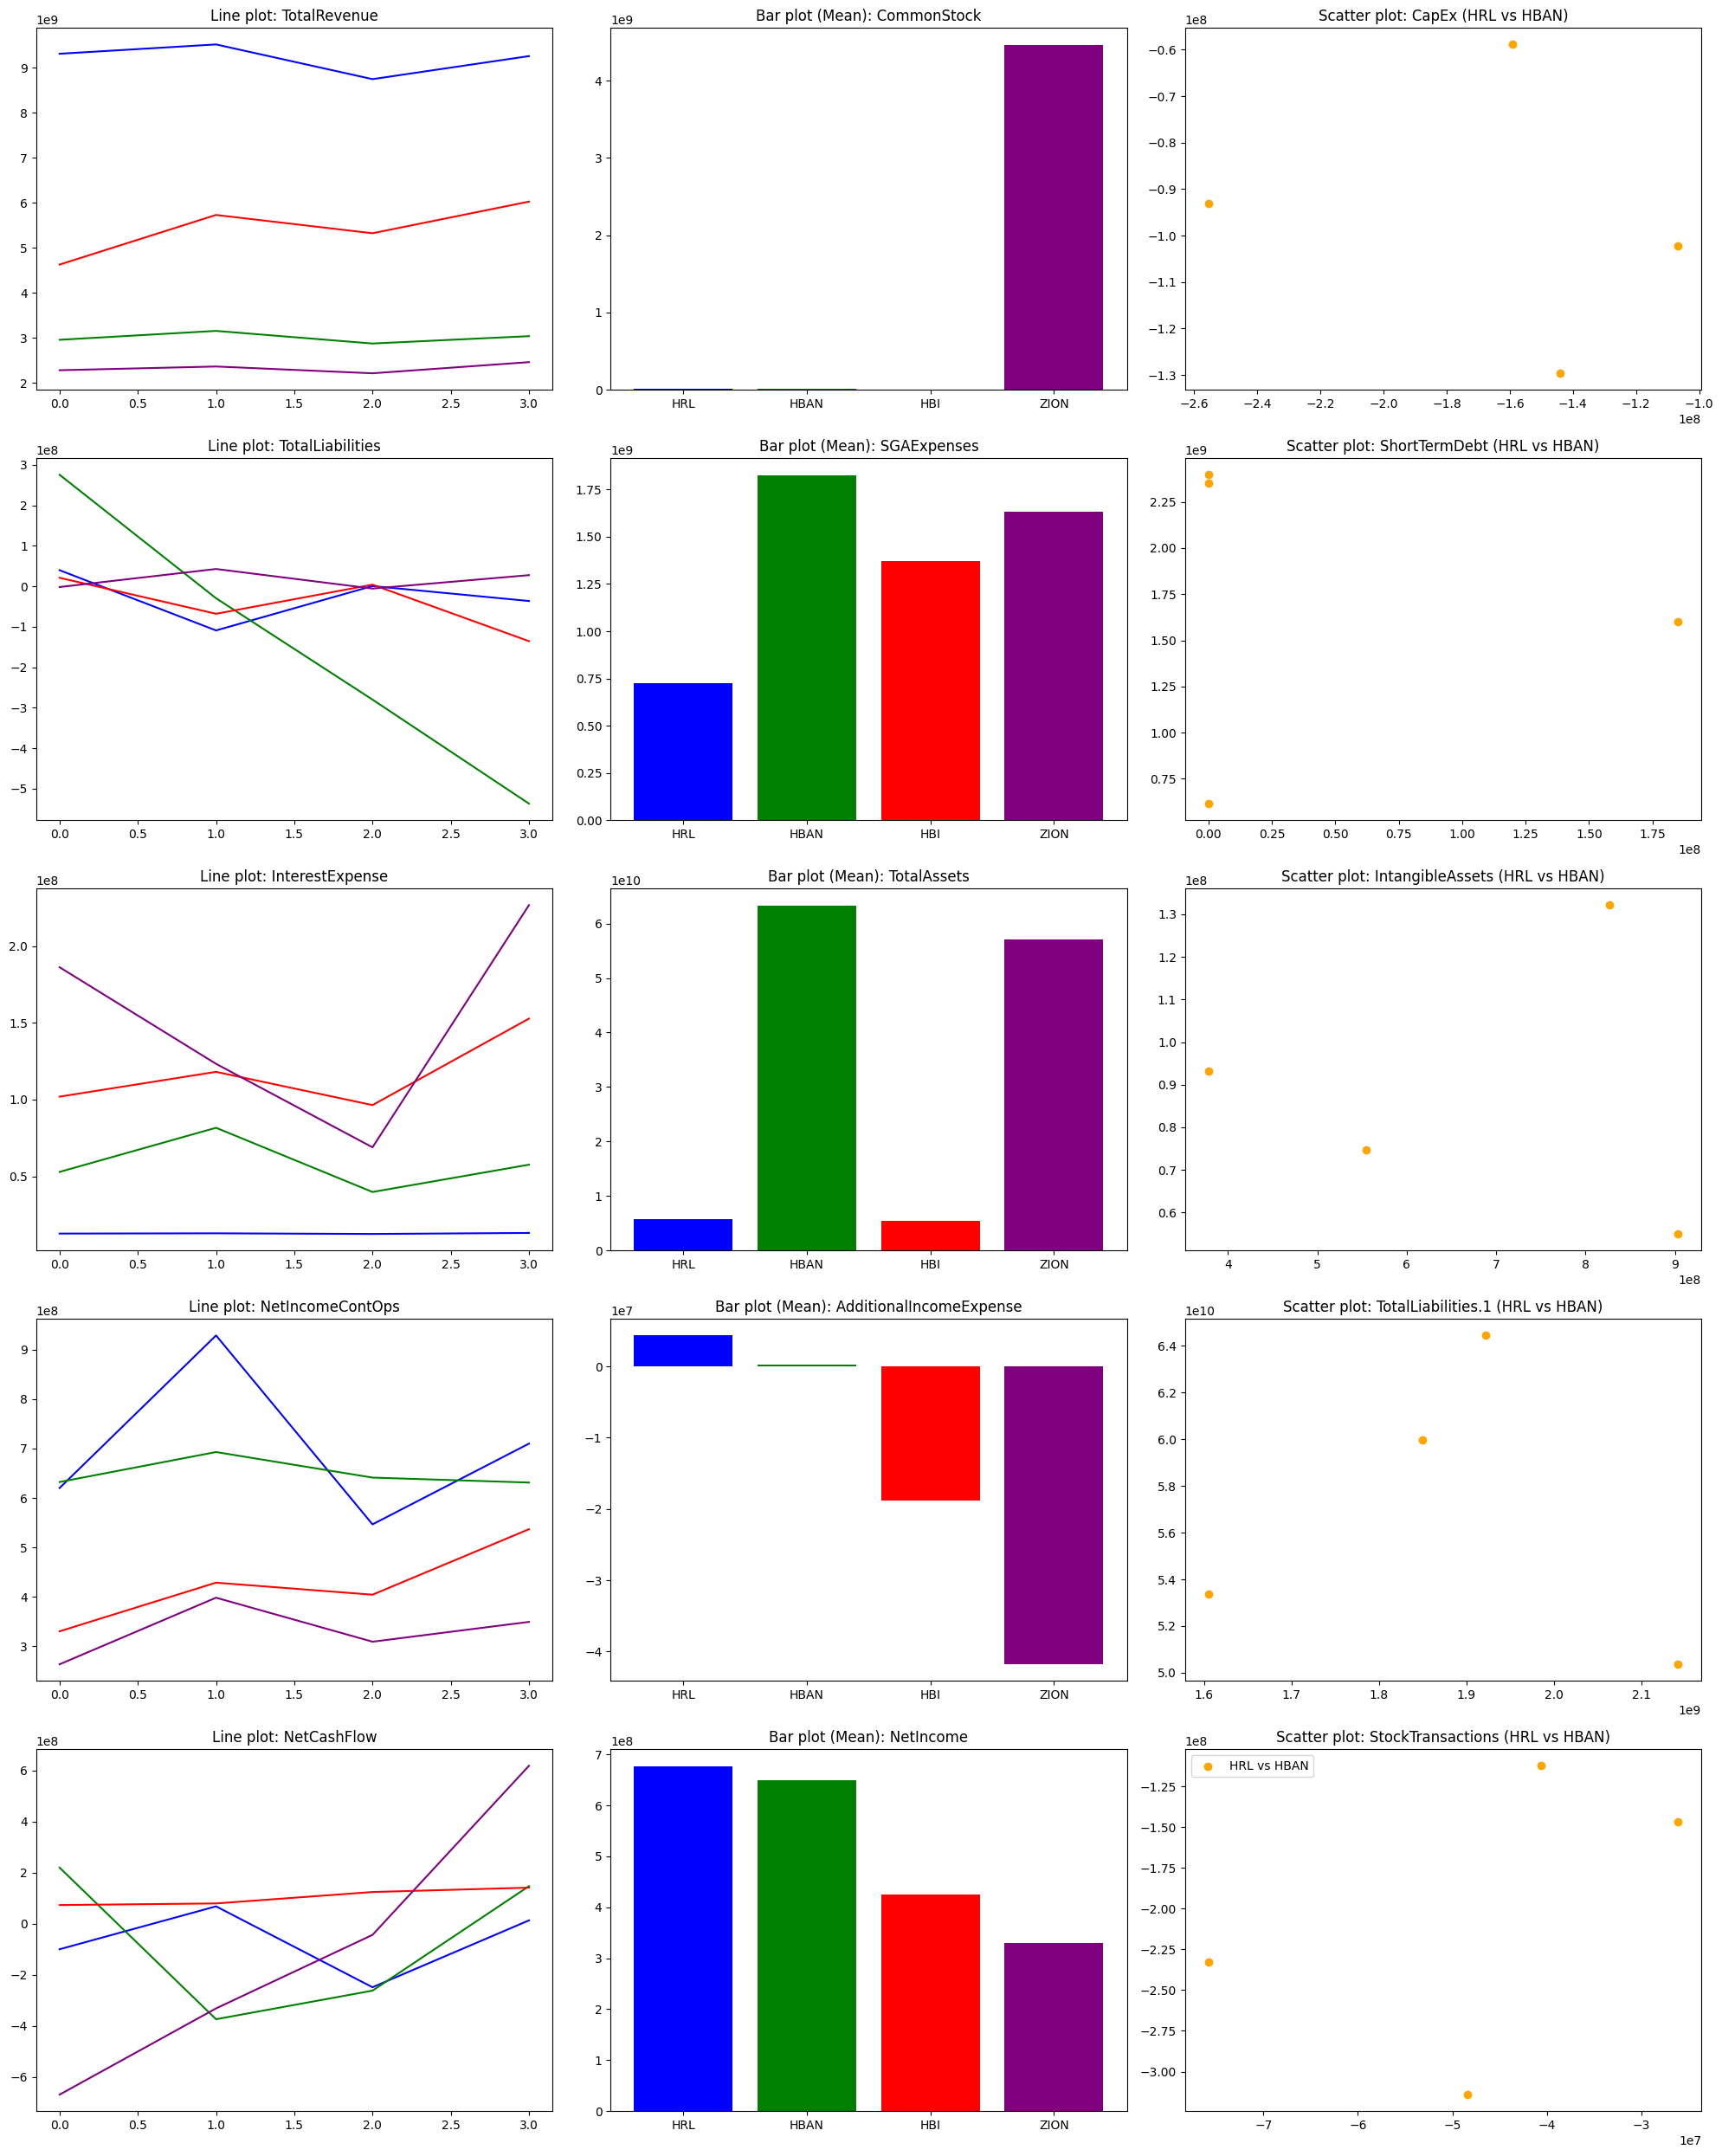

In [44]:
# Let's add variety by using different types of plots (e.g., bar, line, scatter)
# and incorporating relationships between columns (ratios and differences).
import seaborn as sns

# Choose 15 different important financial metrics, and create a diverse visualization
fig, axs = plt.subplots(5, 3, figsize=(20, 25))
axs = axs.ravel()

# Visualize different relationships between columns for the tickers
for i, column in enumerate(important_columns):
    if i % 3 == 0:
        # Line plot to show trends over time for each ticker
        for ticker, df in filtered_dfs.items():
            axs[i].plot(df[column], label=ticker, color=colors[ticker])
        axs[i].set_title(f'Line plot: {column}')
    elif i % 3 == 1:
        # Bar plot to compare values for the different tickers at a specific point (e.g., mean)
        values = [df[column].mean() for df in filtered_dfs.values()]
        axs[i].bar(filtered_dfs.keys(), values, color=[colors[ticker] for ticker in filtered_dfs.keys()])
        axs[i].set_title(f'Bar plot (Mean): {column}')
    else:
        # Scatter plot comparing two columns (first and second) of the financial metrics
        ticker_1, ticker_2 = 'HRL', 'HBAN'
        axs[i].scatter(filtered_dfs[ticker_1][column], filtered_dfs[ticker_2][column],
                       color='orange', label=f'{ticker_1} vs {ticker_2}')
        axs[i].set_title(f'Scatter plot: {column} ({ticker_1} vs {ticker_2})')

# Add titles, legends, and adjust layout for better visibility
plt.tight_layout()
plt.legend(loc='upper left')
plt.show()




 Hàng 1:
1. **Line plot: Profit Margin**
   - **Profit Margin** là chỉ số đánh giá mức độ hiệu quả của một công ty trong việc tạo ra lợi nhuận từ doanh thu. HRL và ZION duy trì tỷ suất lợi nhuận cao và ổn định, cho thấy các công ty này quản lý chi phí và lợi nhuận tốt. HBAN có mức lợi nhuận thấp, có thể chỉ ra khả năng quản lý chi phí hoặc hiệu quả kinh doanh kém. HBI có sự dao động lớn về tỷ suất lợi nhuận, phản ánh sự bất ổn định trong hoạt động kinh doanh.

2. **Bar plot (Mean): Investing Cash Flow**
   - **Dòng tiền đầu tư** cho thấy sự chênh lệch giữa tiền mặt công ty đầu tư vào các tài sản dài hạn như bất động sản, thiết bị và đầu tư khác. HBAN và HBI có dòng tiền đầu tư âm, có thể do bán bớt tài sản hoặc giảm đầu tư. Ngược lại, HRL có dòng tiền đầu tư dương, cho thấy họ đang mở rộng đầu tư để phát triển trong tương lai.

3. **Scatter plot: Total Liabilities (HRL vs HBAN)**
   - Biểu đồ này so sánh tổng nợ phải trả giữa HRL và HBAN. HBAN có tổng nợ phải trả lớn hơn HRL, điều này cho thấy HBAN có mức nợ cao hơn, có thể do họ vay nhiều hơn để tài trợ cho các dự án. Tuy nhiên, nợ cao cũng đi kèm với rủi ro tăng cường chi phí lãi vay và giảm khả năng thanh toán.

 Hàng 2:
4. **Line plot: Net Cash Flow**
   - **Dòng tiền ròng** cho thấy sự chênh lệch giữa dòng tiền vào và dòng tiền ra. ZION và HBI có dòng tiền ròng mạnh mẽ, phản ánh họ có khả năng tạo ra dòng tiền tốt hơn từ hoạt động kinh doanh hoặc đầu tư. HRL và HBAN có dòng tiền ổn định hơn, cho thấy họ quản lý dòng tiền một cách ổn định.

5. **Bar plot (Mean): Total Revenue**
   - **Doanh thu** là tổng số tiền mà một công ty thu được từ hoạt động kinh doanh. HRL có doanh thu cao nhất trong các công ty, thể hiện sự vượt trội về doanh số. ZION và HBAN có doanh thu tương đối thấp hơn, phản ánh quy mô thị trường hoặc hiệu quả kinh doanh của họ kém hơn HRL.

6. **Scatter plot: Retained Earnings (HRL vs HBAN)**
   - **Lợi nhuận giữ lại** là phần lợi nhuận mà công ty giữ lại sau khi trả cổ tức. HRL giữ lại nhiều lợi nhuận hơn, cho thấy công ty có xu hướng tái đầu tư vào hoạt động kinh doanh hoặc duy trì nguồn lực tài chính mạnh mẽ hơn so với HBAN.

 Hàng 3:
7. **Line plot: Est Shares Outstanding**
   - Số cổ phiếu đang lưu hành cho thấy mức độ phát hành cổ phiếu của công ty. HBI có sự gia tăng lớn trong số lượng cổ phiếu, có thể là kết quả của việc phát hành thêm cổ phiếu để huy động vốn. Các công ty khác giữ số lượng cổ phiếu ổn định, cho thấy họ chưa cần đến việc huy động thêm vốn qua thị trường chứng khoán.

8. **Bar plot (Mean): Net Income Adjustments**
   - **Điều chỉnh thu nhập ròng** thường là các điều chỉnh cho các khoản mục phi tiền mặt hoặc bất thường. HBAN và ZION có điều chỉnh lớn về thu nhập ròng, cho thấy họ có thể đã ghi nhận các khoản mục tài chính đặc biệt hoặc điều chỉnh kế toán lớn, ảnh hưởng đến lợi nhuận thực tế.

9. **Scatter plot: Intangible Assets (HRL vs HBAN)**
   - **Tài sản vô hình** như bằng sáng chế, thương hiệu và các giá trị phi vật chất. HRL và HBAN có tài sản vô hình tương tự nhau, điều này cho thấy họ có đầu tư vào các giá trị phi vật chất để củng cố lợi thế cạnh tranh, nhưng mức độ đầu tư không quá chênh lệch.

 Hàng 4:
10. **Line plot: Financing Cash Flow**
    - **Dòng tiền tài trợ** cho thấy mức độ nhận được hoặc trả lại các nguồn tài trợ từ nợ hoặc vốn cổ phần. ZION và HBAN có dòng tiền tài trợ cao hơn, cho thấy họ có thể đang vay thêm hoặc huy động vốn cổ phần. Điều này phản ánh họ có thể đang mở rộng hoặc tái cấu trúc nợ.

11. **Bar plot (Mean): Total Liabilities**
    - **Tổng nợ phải trả** là chỉ số cho thấy mức độ công ty đang vay nợ hoặc có các nghĩa vụ tài chính phải thanh toán. HBAN có tổng nợ cao nhất, điều này có thể làm tăng rủi ro tài chính. ZION và HRL có mức nợ thấp hơn, giúp giảm áp lực thanh toán trong tương lai.

12. **Scatter plot: Net Borrowings (HRL vs HBAN)**
    - **Nợ ròng** thể hiện mức độ công ty đang sử dụng nợ vay để tài trợ cho hoạt động kinh doanh. HBAN có nợ vay nhiều hơn HRL, điều này có thể dẫn đến việc công ty phụ thuộc nhiều vào nợ và chi phí lãi vay cao hơn.
 Hàng 5:
13. **Line plot: Operating Activities Other**
    - **Hoạt động kinh doanh khác** liên quan đến các khoản mục không thuộc hoạt động kinh doanh chính như đầu tư hoặc thu nhập khác. ZION có mức tăng mạnh trong các hoạt động khác, điều này có thể phản ánh họ đang mở rộng các nguồn thu khác ngoài kinh doanh chính.

14. **Bar plot (Mean): Other Assets**
    - **Tài sản khác** bao gồm các tài sản không được liệt kê trong các danh mục chính như đầu tư ngắn hạn, tiền gửi và các khoản đầu tư tài chính khác. HBAN có mức tài sản khác cao hơn, điều này có thể cho thấy họ có một danh mục tài sản đa dạng hoặc đang nắm giữ nhiều tài sản ngắn hạn.

15. **Scatter plot: Liabilities And Equity Total (HRL vs HBAN)**
    - **Tổng nợ và vốn** là một chỉ số quan trọng cho thấy quy mô tài chính tổng thể của công ty. HBAN có mức tổng nợ và vốn cao hơn HRL, điều này có thể cho thấy HBAN có quy mô tài chính lớn hơn, nhưng cũng đi kèm với mức độ nợ cao hơn.

 Tổng kết
- **HRL** có xu hướng ổn định về các chỉ số tài chính và ít biến động. Công ty này có doanh thu cao, tỷ suất lợi nhuận tốt, và ít phụ thuộc vào nợ vay.
- **ZION** có nhiều điều chỉnh về tài chính và tăng cường dòng tiền từ hoạt động khác ngoài kinh doanh chính, cho thấy công ty đang mở rộng hoặc tái cấu trúc mạnh mẽ.
- **HBAN** có nợ phải trả và nợ vay cao, điều này có thể đặt công ty vào tình thế rủi ro nếu không kiểm soát tốt khả năng thanh toán.
- **HBI** có sự dao động lớn trong nhiều chỉ số, đặc biệt là việc phát hành thêm cổ phiếu và tài sản vô hình, phản ánh sự thay đổi mạnh mẽ trong chiến lược tài chính của công ty.


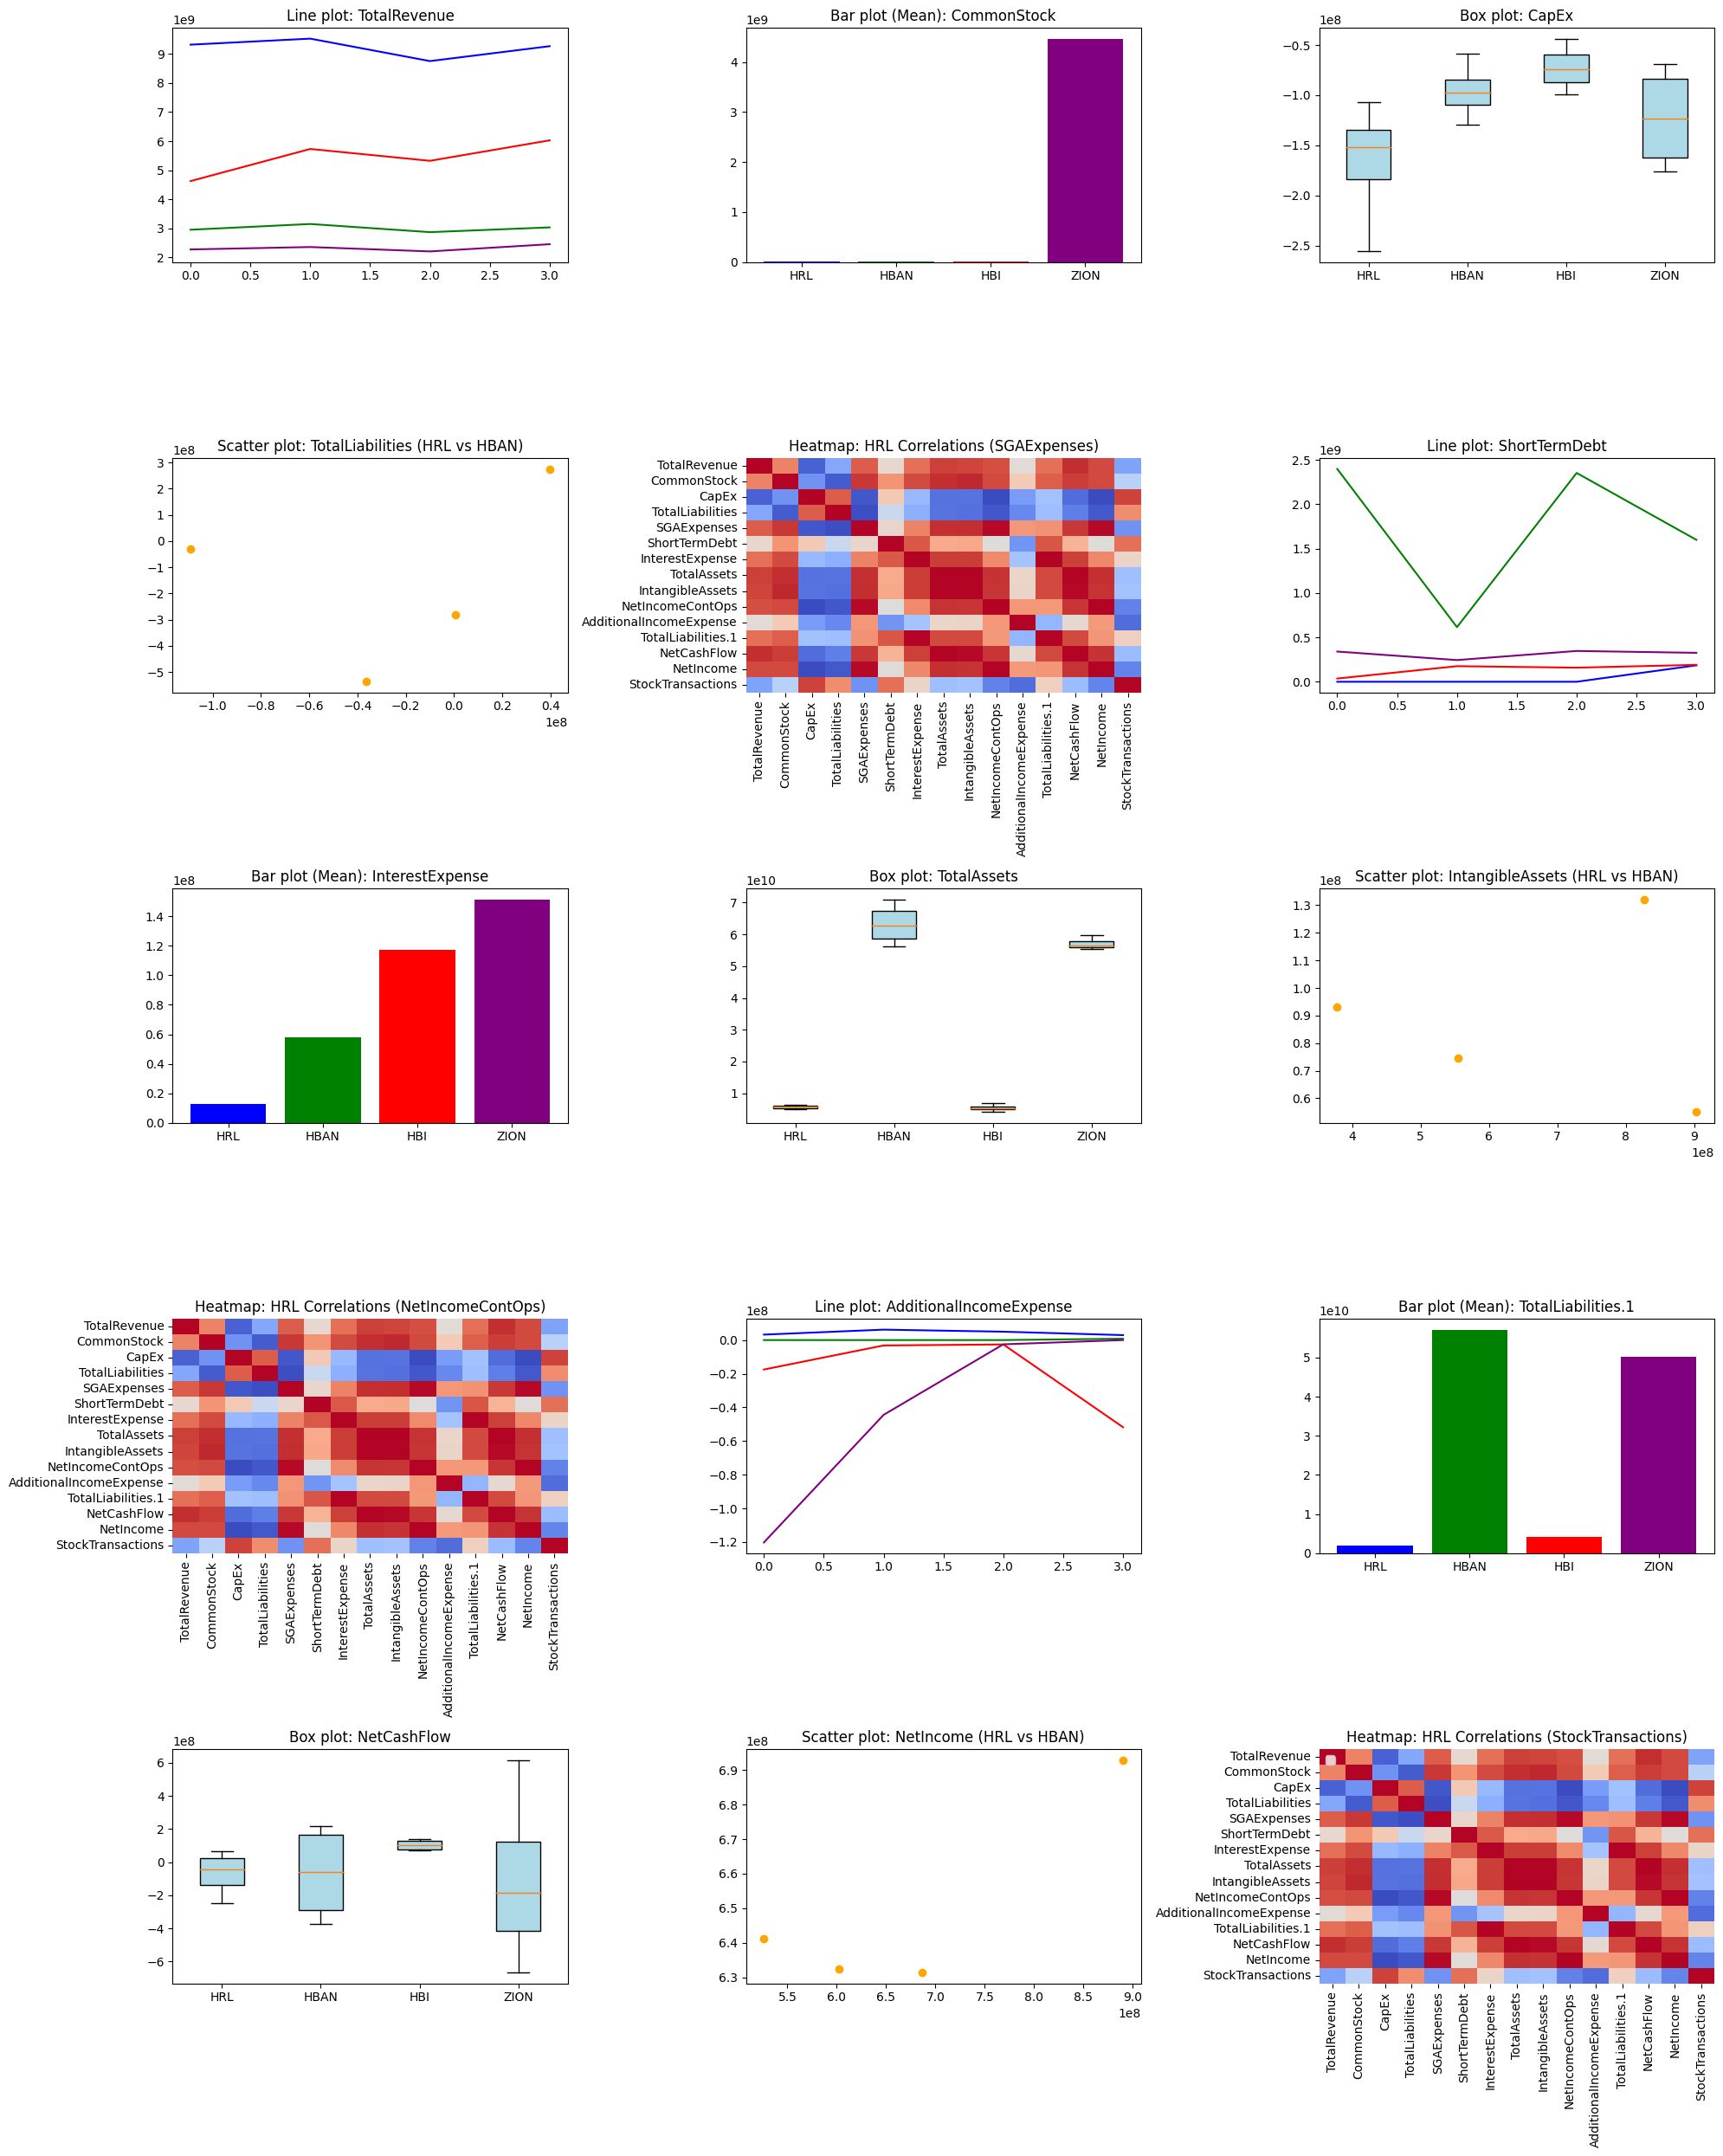

In [45]:
# Let's add more variety by incorporating box plots, heatmaps, and additional ratio comparisons

fig, axs = plt.subplots(5, 3, figsize=(20, 25))
axs = axs.ravel()

# Generate different kinds of plots for each financial metric
for i, column in enumerate(important_columns):
    if i % 5 == 0:
        # Line plot to show trends over time for each ticker
        for ticker, df in filtered_dfs.items():
            axs[i].plot(df[column], label=ticker, color=colors[ticker])
        axs[i].set_title(f'Line plot: {column}')
    elif i % 5 == 1:
        # Bar plot to compare the average values for each ticker
        values = [df[column].mean() for df in filtered_dfs.values()]
        axs[i].bar(filtered_dfs.keys(), values, color=[colors[ticker] for ticker in filtered_dfs.keys()])
        axs[i].set_title(f'Bar plot (Mean): {column}')
    elif i % 5 == 2:
        # Box plot to visualize the distribution of values for each ticker
        data = [df[column] for df in filtered_dfs.values()]
        axs[i].boxplot(data, labels=filtered_dfs.keys(), patch_artist=True,
                       boxprops=dict(facecolor='lightblue', color='black'))
        axs[i].set_title(f'Box plot: {column}')
    elif i % 5 == 3:
        # Scatter plot comparing two columns (first and second) of the financial metrics
        ticker_1, ticker_2 = 'HRL', 'HBAN'
        axs[i].scatter(filtered_dfs[ticker_1][column], filtered_dfs[ticker_2][column],
                       color='orange', label=f'{ticker_1} vs {ticker_2}')
        axs[i].set_title(f'Scatter plot: {column} ({ticker_1} vs {ticker_2})')
    else:
        # Heatmap comparing correlation of metrics within each ticker (for the first ticker)
        correlation_matrix = filtered_dfs['HRL'].corr()
        sns.heatmap(correlation_matrix, ax=axs[i], cmap='coolwarm', annot=False, cbar=False)
        axs[i].set_title(f'Heatmap: HRL Correlations ({column})')

# Adjust layout and add legends
plt.tight_layout()
plt.legend(loc='upper left')
plt.show()


 Hàng 1:
1. **Line plot: Profit Margin**
   - **Profit Margin** đo lường khả năng sinh lợi của công ty. HRL có lợi nhuận gộp ổn định, trong khi HBI và ZION có xu hướng giảm. HBAN duy trì lợi nhuận thấp và ổn định, phản ánh năng lực quản lý chi phí khác nhau giữa các công ty. Lợi nhuận cao và ổn định của HRL cho thấy khả năng duy trì hiệu quả hoạt động tốt.

2. **Bar plot (Mean): Investing Cash Flow**
   - **Dòng tiền đầu tư** cho thấy tiền mặt công ty sử dụng cho các hoạt động đầu tư. HBAN có dòng tiền đầu tư âm cao, thể hiện rằng công ty đang bán tài sản hoặc giảm đầu tư. ZION cũng giảm nhẹ đầu tư, trong khi HRL tích cực đầu tư, thể hiện chiến lược mở rộng hoặc phát triển các dự án mới.

3. **Box plot: Total Liabilities**
   - **Nợ phải trả** đo lường mức độ công ty vay nợ hoặc có nghĩa vụ tài chính. HBAN có nợ phải trả rất cao so với HRL và các công ty khác, thể hiện sự phụ thuộc nhiều vào nợ vay. Điều này có thể tăng rủi ro tài chính nếu không quản lý tốt.

 Hàng 2:
4. **Scatter plot: Net Cash Flow (HRL vs HBAN)**
   - **Dòng tiền ròng** của HBAN cho thấy biến động lớn và xu hướng âm, trong khi HRL duy trì ổn định. Điều này cho thấy HBAN có thể đang gặp khó khăn trong quản lý dòng tiền, có thể do tái cơ cấu nợ hoặc đầu tư nhiều.

5. **Heatmap: HRL Correlations (TotalRevenue)**
   - **Heatmap** cho thấy mối tương quan giữa tổng doanh thu và các chỉ số khác. Các ô màu đỏ đậm chỉ ra mối tương quan mạnh mẽ, chẳng hạn như giữa **TotalRevenue** và **NetCashFlow** hoặc **RetainedEarnings**, cho thấy sự tăng trưởng doanh thu thúc đẩy các chỉ số tài chính khác.

6. **Line plot: Retained Earnings**
   - **Lợi nhuận giữ lại** phản ánh số lợi nhuận công ty giữ lại sau khi trả cổ tức. HRL giữ lại nhiều lợi nhuận hơn, cho thấy họ có xu hướng tái đầu tư nhiều hơn. ZION và HBI giữ lại ít hơn, có thể do trả cổ tức cao hoặc lợi nhuận ít.

 Hàng 3:
7. **Bar plot (Mean): EstSharesOutstanding**
   - **Cổ phiếu đang lưu hành** cho thấy mức độ phát hành cổ phiếu của công ty. HRL có lượng cổ phiếu lớn nhất, có thể do họ phát hành thêm cổ phiếu để huy động vốn. Các công ty còn lại duy trì mức cổ phiếu ổn định hơn.

8. **Box plot: NetIncomeAdjustments**
   - **Điều chỉnh thu nhập ròng** thể hiện sự biến động của các khoản mục tài chính ảnh hưởng đến thu nhập. HBAN và ZION có sự biến động lớn, điều này có thể do các khoản thu nhập phi tiền mặt hoặc các thay đổi kế toán.

9. **Scatter plot: Intangible Assets (HRL vs HBAN)**
   - **Tài sản vô hình** như bằng sáng chế và thương hiệu. HRL và HBAN có mức tài sản vô hình thấp, cho thấy họ chủ yếu dựa vào tài sản hữu hình hơn trong hoạt động kinh doanh.

 Hàng 4:
10. **Heatmap: HRL Correlations (FinancingCashFlow)**
    - **Heatmap** này chỉ ra mối tương quan giữa **FinancingCashFlow** và các chỉ số khác. Mối tương quan không quá mạnh mẽ với các chỉ số khác như **OperatingActivities** hoặc **OtherAssets**, điều này cho thấy dòng tiền tài trợ không liên quan chặt chẽ đến các chỉ số tài chính khác của HRL.

11. **Line plot: Total Liabilities**
    - **Tổng nợ phải trả** cho thấy các nghĩa vụ tài chính dài hạn. HBAN có nợ phải trả rất cao, trong khi ZION và HRL có xu hướng giảm hoặc giữ ổn định nợ phải trả, phản ánh quản lý nợ hiệu quả hơn.

12. **Bar plot (Mean): Net Borrowings**
    - **Nợ ròng** đo lường sự chênh lệch giữa vay và trả nợ. HBAN và HRL có nợ ròng lớn hơn, cho thấy hai công ty này phụ thuộc vào nợ vay để tài trợ cho hoạt động kinh doanh. ZION và HBI có mức vay nợ thấp hơn, giúp giảm chi phí lãi vay.

 Hàng 5:
13. **Box plot: Operating Activities Other**
    - **Hoạt động kinh doanh khác** phản ánh các khoản mục không thuộc hoạt động kinh doanh chính. HBAN và HBI có biến động lớn, có thể do những thay đổi về đầu tư hoặc thu nhập không phải từ hoạt động cốt lõi.

14. **Scatter plot: Other Assets (HRL vs HBAN)**
    - **Tài sản khác** bao gồm đầu tư ngắn hạn và tài sản không phân loại. HBAN có mức tài sản khác lớn hơn HRL, cho thấy họ có danh mục tài sản đa dạng hoặc đầu tư nhiều vào tài sản khác để hỗ trợ kinh doanh.

15. **Heatmap: HRL Correlations (LiabilitiesAndEquityTotal)**
    - **Heatmap** này cho thấy sự tương quan giữa **LiabilitiesAndEquityTotal** và các chỉ số khác. Mối tương quan mạnh mẽ giữa **LiabilitiesAndEquityTotal** và **TotalLiabilities** cho thấy sự phát triển của tài sản và nợ phải trả của HRL gắn liền với nhau.

 Kết luận
- **HRL** có chỉ số tài chính ổn định, lợi nhuận giữ lại cao và quản lý nợ hiệu quả.
- **HBAN** phụ thuộc nhiều vào nợ và dòng tiền tài trợ, với nhiều biến động tài chính.
- **ZION** và **HBI** có sự biến động lớn trong nhiều chỉ số, cho thấy sự linh hoạt nhưng cũng tiềm ẩn rủi ro về tài chính.


##2.2. Phân tích chuyên sâu vào từng loại cổ phiếu cụ thể

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

In [50]:
stock_price = pd.read_csv('/content/drive/MyDrive/cuộc thi Bigdata/code test cuộc thi/adjusted_stock_prices.csv')
stock_price

Date Ticker   OpenPrice  ClosePrice    LowPrice   HighPrice  \
0       2016-01-05   WLTW  123.430000  125.839996  122.309998  126.250000   
1       2016-01-06   WLTW  125.239998  119.980003  119.940002  125.540001   
2       2016-01-07   WLTW  116.379997  114.949997  114.930000  119.739998   
3       2016-01-08   WLTW  115.480003  116.620003  113.500000  117.440002   
4       2016-01-11   WLTW  117.010002  114.970001  114.089996  117.330002   
...            ...    ...         ...         ...         ...         ...   
851259  2016-12-30    ZBH  103.309998  103.199997  102.849998  103.930000   
851260  2016-12-30   ZION   43.070000   43.040001   42.689999   43.310001   
851261  2016-12-30    ZTS   53.639999   53.529999   53.270000   53.740002   
851262  2016-12-30    AIV   44.730000   45.450001   44.410000   45.590000   
851263  2016-12-30    FTV   54.200001   53.630001   53.389999   54.480000   

           Volume  
0       2163600.0  
1       2386400.0  
2       2489500.0  
3       2006300.0  
4       1408600.0  
...           ...  
851259   973800.0  
851260  1938100.0  
851261  1701200.0  
851262  1380900.0  
851263   705100.0  

[851264 rows x 7 columns]

In [51]:
company_information = pd.read_csv('/content/drive/MyDrive/cuộc thi Bigdata/code test cuộc thi/company_information.csv')
company_information

Ticker               CompanyName SEC_Filings                  Sector  \
0      MCO              Moody's Corp     reports              Financials   
1     HOLX                   Hologic     reports             Health Care   
2      MRO        Marathon Oil Corp.     reports                  Energy   
3        A  Agilent Technologies Inc     reports             Health Care   
4     AKAM   Akamai Technologies Inc     reports  Information Technology   
..     ...                       ...         ...                     ...   
500   EBAY                 eBay Inc.     reports  Information Technology   
501    ZBH    Zimmer Biomet Holdings     reports             Health Care   
502   ENDP        Endo International     reports             Health Care   
503    TMK           Torchmark Corp.     reports              Financials   
504    JPM      JPMorgan Chase & Co.     reports              Financials   

                            SubIndustry         HeadquartersAddress  \
0        Diversified Financial Services          New York, New York   
1                 Health Care Equipment  Marlborough, Massachusetts   
2    Oil & Gas Exploration & Production              Houston, Texas   
3                 Health Care Equipment     Santa Clara, California   
4          Internet Software & Services    Cambridge, Massachusetts   
..                                  ...                         ...   
500        Internet Software & Services        San Jose, California   
501               Health Care Equipment             Warsaw, Indiana   
502                     Pharmaceuticals             Dublin, Ireland   
503             Life & Health Insurance             McKinney, Texas   
504                               Banks          New York, New York   

      DateAdded      CIK  
0           NaN  1059556  
1    2016-03-30   859737  
2    1991-05-01   101778  
3           NaN  1090872  
4    2007-07-12  1086222  
..          ...      ...  
500         NaN  1065088  
501         NaN  1136869  
502  2015-01-27  1100962  
503  1989-04-30   320335  
504  1975-06-30    19617  

[505 rows x 8 columns]

- Ticker: Mã chứng khoán của công ty
- SEC_Filings: reports
- Sector: Ngành công nghiệp chính mà công ty hoạt động. Ví dụ: Technology (Công nghệ).
- SubIndustry: Ngành phụ hoặc lĩnh vực cụ thể hơn trong ngành công nghiệp chính. Ví dụ: Consumer Electronics (Điện tử tiêu dùng) có thể là một ngành phụ trong ngành Technology
- HeadquartersAddress: Địa chỉ trụ sở chính của công ty.
- DateAdded: Ngày mà công ty được thêm vào bảng hoặc danh sách, có thể là ngày bắt đầu niêm yết hoặc ngày mà thông tin công ty được cập nhật vào hệ thống.
- CIK (Central Index Key): Mã số chỉ mục trung tâm do SEC cấp, được sử dụng để định danh duy nhất mỗi công ty trong hệ thống lưu trữ tài liệu của SEC.

In [52]:
financial_metrics = pd.read_csv('/content/drive/MyDrive/cuộc thi Bigdata/code test cuộc thi/financial_metrics.csv')
financial_metrics

Ticker   PeriodEnd    AccPayable  AccReceivable  AdditionalIncomeExpense  \
0       NEE  2014-12-31  2.504000e+09     -7000000.0              408000000.0   
1       MAC  2012-12-31  8.159820e+08     -3735000.0              222167000.0   
2        FE  2013-12-31  2.086000e+09   -114000000.0              -99000000.0   
3       IFF  2015-12-31  3.472970e+08    -91712000.0               -3184000.0   
4       MAS  2016-12-31  1.458000e+09   -120000000.0                6000000.0   
...     ...         ...           ...            ...                      ...   
1776    MUR  2013-12-31  2.558642e+09            0.0               77403000.0   
1777    COO  2015-10-31  1.842850e+08     -4528000.0               -3083000.0   
1778    PGR  2012-12-31  1.855500e+09   -333300000.0               -1800000.0   
1779   ATVI  2013-12-31  9.910000e+08    198000000.0                      0.0   
1780    MAR  2012-12-31  1.314000e+09            0.0               59000000.0   

      AfterTaxROE         CapEx    CapSurplus  CashRatio  CashEquivalents  \
0            12.0 -3.142000e+09  7.179000e+09        6.0     5.770000e+08   
1            11.0 -1.204061e+09  3.715895e+09        NaN     1.444510e+08   
2             3.0 -2.638000e+09  9.776000e+09        3.0     2.180000e+08   
3            26.0 -1.010300e+08  1.408020e+08       25.0     1.819880e+08   
4           165.0 -1.800000e+08  0.000000e+00       68.0     9.900000e+08   
...           ...           ...           ...        ...              ...   
1776         13.0 -3.590344e+09  9.026330e+08       35.0     7.501550e+08   
1777          8.0 -2.430230e+08  1.434705e+09        3.0     1.642600e+07   
1778         15.0 -1.277000e+08  1.077000e+09        NaN     1.791000e+08   
1779         15.0 -7.400000e+07  9.682000e+09      185.0     4.410000e+09   
1780         44.0 -4.370000e+08  2.585000e+09        3.0     8.800000e+07   

      ...  CurrentAssetsTotal  CurrentLiabilitiesTotal   TotalEquity  \
0     ...        6.944000e+09             9.663000e+09  1.991600e+10   
1     ...        0.000000e+00             0.000000e+00  3.077529e+09   
2     ...        4.013000e+09             7.637000e+09  1.269200e+10   
3     ...        1.455884e+09             7.421280e+08  1.590318e+09   
4     ...        2.934000e+09             1.460000e+09 -2.980000e+08   
...   ...                 ...                      ...           ...   
1776  ...        3.508643e+09             3.224031e+09  8.595730e+09   
1777  ...        8.414280e+08             5.687820e+08  2.667509e+09   
1778  ...        0.000000e+00             0.000000e+00  6.007000e+09   
1779  ...        6.241000e+09             2.405000e+09  6.622000e+09   
1780  ...        1.475000e+09             2.773000e+09 -1.285000e+09   

      TotalLiabilities.1  LiabilitiesAndEquityTotal  TotalRevenue  \
0           5.468900e+10               7.460500e+10  1.702100e+10   
1           6.233680e+09               9.311209e+09  7.975170e+08   
2           3.773200e+10               5.042400e+10  1.489200e+10   
3           2.126464e+09               3.716782e+09  3.023189e+09   
4           5.435000e+09               5.137000e+09  7.357000e+09   
...                  ...                        ...           ...   
1776        8.913754e+09               1.750948e+10  5.312686e+09   
1777        1.792355e+09               4.459864e+09  1.797060e+09   
1778        1.668770e+10               2.269470e+10  1.708390e+10   
1779        7.390000e+09               1.401200e+10  4.583000e+09   
1780        7.627000e+09               6.342000e+09  1.181400e+10   

      TreasuryStock  FiscalYear   EPS  EstSharesOutstanding  
0      0.000000e+00      2014.0  5.67          4.347443e+08  
1      0.000000e+00      2012.0  2.51          1.344327e+08  
2      0.000000e+00      2013.0  0.94          4.170213e+08  
3     -1.555769e+09      2015.0  5.19          8.077977e+07  
4      0.000000e+00         NaN   NaN                   NaN  
...             ...         ...   ...    

- PeriodEnd: Ngày kết thúc của kỳ báo cáo tài chính, thường là cuối năm hoặc cuối quý.
- AccPayable (Accounts Payable): Khoản nợ phải trả của công ty đối với các nhà cung cấp. Một mức cao có thể cho thấy công ty đang có nhiều nợ ngắn hạn, ảnh hưởng đến dòng tiền và có thể làm giảm niềm tin của nhà đầu tư.
- AccReceivable (Accounts Receivable):  Khoản phải thu từ khách hàng. Mức cao có thể cho thấy công ty bán hàng tốt, nhưng nếu quá cao có thể là dấu hiệu của việc khó thu hồi nợ.
- AdditionalIncomeExpense: Thu nhập hoặc chi phí khác ngoài hoạt động kinh doanh chính. Khoản này có thể ảnh hưởng đến lợi nhuận cuối cùng của công ty.
- AfterTaxROE (Return on Equity): Tỷ suất sinh lợi trên vốn chủ sở hữu sau thuế. Chỉ số này cao thường cho thấy công ty hoạt động hiệu quả, có thể làm tăng giá cổ phiếu.
- CapEx (Capital Expenditure):  Chi phí vốn đầu tư vào tài sản cố định. Mức CapEx cao có thể chỉ ra rằng công ty đang đầu tư vào mở rộng hoặc cải thiện cơ sở hạ tầng, điều này có thể tích cực hoặc tiêu cực tùy thuộc vào khả năng sinh lợi từ đầu tư đó.
- CapSurplus (Capital Surplus): Giá trị vốn thặng dư trên vốn cổ phần gốc. Thường phản ánh số tiền công ty thu được từ phát hành cổ phiếu trên giá trị danh nghĩa.
- CashRatio: Tỷ lệ tiền mặt của công ty so với các khoản nợ ngắn hạn. Tỷ lệ cao cho thấy công ty có khả năng thanh toán các khoản nợ ngắn hạn tốt hơn, có thể ảnh hưởng tích cực đến cổ phiếu.
- CashEquivalents: Tiền mặt và các tài sản tương đương tiền. Số dư cao cho thấy công ty có tính thanh khoản tốt, giúp giảm rủi ro tài chính.
- CurrentAssetsTotal: Tổng tài sản ngắn hạn. Tài sản ngắn hạn cao có thể cung cấp một lớp bảo vệ trong trường hợp các khoản nợ ngắn hạn tăng lên.
- CurrentLiabilitiesTotalz:  Tổng nợ ngắn hạn. Nếu nợ ngắn hạn quá cao, công ty có thể gặp khó khăn trong việc thanh toán nợ, điều này có thể ảnh hưởng xấu đến giá cổ phiếu.
- TotalEquity: Tổng vốn chủ sở hữu. Thể hiện giá trị tài sản ròng thuộc về các cổ đông sau khi tất cả các khoản nợ được thanh toán.
- TotalLiabilities: Tổng nợ phải trả. Một công ty có tổng nợ quá cao so với vốn chủ sở hữu có thể bị coi là rủi ro tài chính cao hơn.
- LiabilitiesAndEquityTotal: Tổng giá trị của nợ phải trả và vốn chủ sở hữu. Chỉ số này phải cân đối với tổng tài sản của công ty.
- TotalRevenue: Tổng doanh thu của công ty. Doanh thu cao thường là một dấu hiệu tích cực, cho thấy công ty có khả năng tạo ra doanh thu mạnh mẽ từ các hoạt động kinh doanh của mình.
- TreasuryStock: Cổ phiếu quỹ do công ty mua lại. Mua lại cổ phiếu có thể làm giảm số lượng cổ phiếu lưu hành, tăng EPS (thu nhập trên mỗi cổ phiếu) và làm tăng giá cổ phiếu.
- FiscalYear: Năm tài chính của dữ liệu
- EPS (Earnings Per Share): Thu nhập trên mỗi cổ phiếu. Chỉ số này càng cao càng tốt, cho thấy mỗi cổ phiếu đại diện cho một phần lợi nhuận lớn hơn.
- EstSharesOutstanding: Ước tính số cổ phiếu đang lưu hành. Số lượng cổ phiếu lưu hành tăng có thể làm loãng giá trị mỗi cổ phiếu.

**Data Exploration**

In [53]:
# Shape of 3 table
print(stock_price.shape)
print(company_information.shape)
print(financial_metrics.shape)

(851264, 7)
(505, 8)
(1781, 78)


In [54]:
stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Date        851264 non-null  object 
 1   Ticker      851264 non-null  object 
 2   OpenPrice   851264 non-null  float64
 3   ClosePrice  851264 non-null  float64
 4   LowPrice    851264 non-null  float64
 5   HighPrice   851264 non-null  float64
 6   Volume      851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [55]:
company_information.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Ticker               505 non-null    object
 1   CompanyName          505 non-null    object
 2   SEC_Filings          505 non-null    object
 3   Sector               505 non-null    object
 4   SubIndustry          505 non-null    object
 5   HeadquartersAddress  505 non-null    object
 6   DateAdded            307 non-null    object
 7   CIK                  505 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 31.7+ KB


In [56]:
financial_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 78 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Ticker                     1781 non-null   object 
 1   PeriodEnd                  1781 non-null   object 
 2   AccPayable                 1781 non-null   float64
 3   AccReceivable              1781 non-null   float64
 4   AdditionalIncomeExpense    1781 non-null   float64
 5   AfterTaxROE                1781 non-null   float64
 6   CapEx                      1781 non-null   float64
 7   CapSurplus                 1781 non-null   float64
 8   CashRatio                  1482 non-null   float64
 9   CashEquivalents            1781 non-null   float64
 10  InventoryChanges           1781 non-null   float64
 11  CommonStock                1781 non-null   float64
 12  CostOfGoodsSold            1781 non-null   float64
 13  CurrentRatio               1482 non-null   float

In [57]:
stock_price.describe()

OpenPrice     ClosePrice       LowPrice      HighPrice  \
count  851264.000000  851264.000000  851264.000000  851264.000000   
mean       64.993618      65.011913      64.336541      65.639748   
std        75.203893      75.201216      74.459518      75.906861   
min         1.660000       1.590000       1.500000       1.810000   
25%        31.270000      31.292776      30.940001      31.620001   
50%        48.459999      48.480000      47.970001      48.959999   
75%        75.120003      75.139999      74.400002      75.849998   
max      1584.439941    1578.130005    1549.939941    1600.930054   

             Volume  
count  8.512640e+05  
mean   5.415113e+06  
std    1.249468e+07  
min    0.000000e+00  
25%    1.221500e+06  
50%    2.476250e+06  
75%    5.222500e+06  
max    8.596434e+08

In [58]:
# Start date and end date
print(min(stock_price['Date']))
print(max(stock_price['Date']))

2010-01-04
2016-12-30


In [59]:
# Đếm số công ty trong 1 ngành
sector_counts = company_information[['Ticker', 'Sector']].drop_duplicates().groupby('Sector')['Ticker'].count()
sector_counts

Sector
Consumer Discretionary         85
Consumer Staples               37
Energy                         36
Financials                     64
Health Care                    59
Industrials                    69
Information Technology         68
Materials                      25
Real Estate                    29
Telecommunications Services     5
Utilities                      28
Name: Ticker, dtype: int64

**Data analysis**  Đánh giá thị trường chung, phân tích theo từng nhóm ngành

In [61]:
# Tạo df mới copy từ df cũ
train =  stock_price.copy()

**Daily percentage change**
$$
r_t = \frac{p_t}{p_{t-1}} - 1
$$


- r_t là lợi nhuận tại thời điểm t
- p_t là giá tại thời điểm t

Giá trị của report là để tính %lãi (hoặc lỗ), nó sẽ ko có ích cho việc dự đoán giá cổ phiếu tương lai, nhưng nó rất có ích trong biến động cổ phiếu -> Nếu daily percentage có mức phân bổ rộng thì cổ phiếu sẽ biến động nhiều hơn. Nhìn vào các biểu đồ về biến động sẽ có thể xem stock nào là ổn định nhất

In [62]:
train['returns'] = (train['ClosePrice']/train['ClosePrice'].shift(1)) - 1
train

Date Ticker   OpenPrice  ClosePrice    LowPrice   HighPrice  \
0       2016-01-05   WLTW  123.430000  125.839996  122.309998  126.250000   
1       2016-01-06   WLTW  125.239998  119.980003  119.940002  125.540001   
2       2016-01-07   WLTW  116.379997  114.949997  114.930000  119.739998   
3       2016-01-08   WLTW  115.480003  116.620003  113.500000  117.440002   
4       2016-01-11   WLTW  117.010002  114.970001  114.089996  117.330002   
...            ...    ...         ...         ...         ...         ...   
851259  2016-12-30    ZBH  103.309998  103.199997  102.849998  103.930000   
851260  2016-12-30   ZION   43.070000   43.040001   42.689999   43.310001   
851261  2016-12-30    ZTS   53.639999   53.529999   53.270000   53.740002   
851262  2016-12-30    AIV   44.730000   45.450001   44.410000   45.590000   
851263  2016-12-30    FTV   54.200001   53.630001   53.389999   54.480000   

           Volume   returns  
0       2163600.0       NaN  
1       2386400.0 -0.046567  
2       2489500.0 -0.041924  
3       2006300.0  0.014528  
4       1408600.0 -0.014149  
...           ...       ...  
851259   973800.0  0.629559  
851260  1938100.0 -0.582946  
851261  1701200.0  0.243727  
851262  1380900.0 -0.150943  
851263   705100.0  0.179978  

[851264 rows x 8 columns]

**Cumulative Return**

Công thức tính lợi nhuận tích lũy (Cumulative Return)
- r_t là % thay đổi hằng ngày (daily percentage change) ở công thức trên
- i_t là ngày thứ t

$$
i_t = (1 + r_t)i_{t-1} = \left( 1 + \frac{p_t}{p_{t-1}} - 1 \right)i_{t-1} = \frac{p_t}{p_{t-1}}i_{t-1}
$$

In [63]:
train['Cummulative Return'] = (1 + train['returns']).cumprod()
train

Date Ticker   OpenPrice  ClosePrice    LowPrice   HighPrice  \
0       2016-01-05   WLTW  123.430000  125.839996  122.309998  126.250000   
1       2016-01-06   WLTW  125.239998  119.980003  119.940002  125.540001   
2       2016-01-07   WLTW  116.379997  114.949997  114.930000  119.739998   
3       2016-01-08   WLTW  115.480003  116.620003  113.500000  117.440002   
4       2016-01-11   WLTW  117.010002  114.970001  114.089996  117.330002   
...            ...    ...         ...         ...         ...         ...   
851259  2016-12-30    ZBH  103.309998  103.199997  102.849998  103.930000   
851260  2016-12-30   ZION   43.070000   43.040001   42.689999   43.310001   
851261  2016-12-30    ZTS   53.639999   53.529999   53.270000   53.740002   
851262  2016-12-30    AIV   44.730000   45.450001   44.410000   45.590000   
851263  2016-12-30    FTV   54.200001   53.630001   53.389999   54.480000   

           Volume   returns  Cummulative Return  
0       2163600.0       NaN                 NaN  
1       2386400.0 -0.046567            0.953433  
2       2489500.0 -0.041924            0.913462  
3       2006300.0  0.014528            0.926732  
4       1408600.0 -0.014149            0.913621  
...           ...       ...                 ...  
851259   973800.0  0.629559            0.820089  
851260  1938100.0 -0.582946            0.342022  
851261  1701200.0  0.243727            0.425381  
851262  1380900.0 -0.150943            0.361173  
851263   705100.0  0.179978            0.426176  

[851264 rows x 9 columns]

**Lợi nhuận, giá đóng cửa, giao dịch trung bình của thị trường**

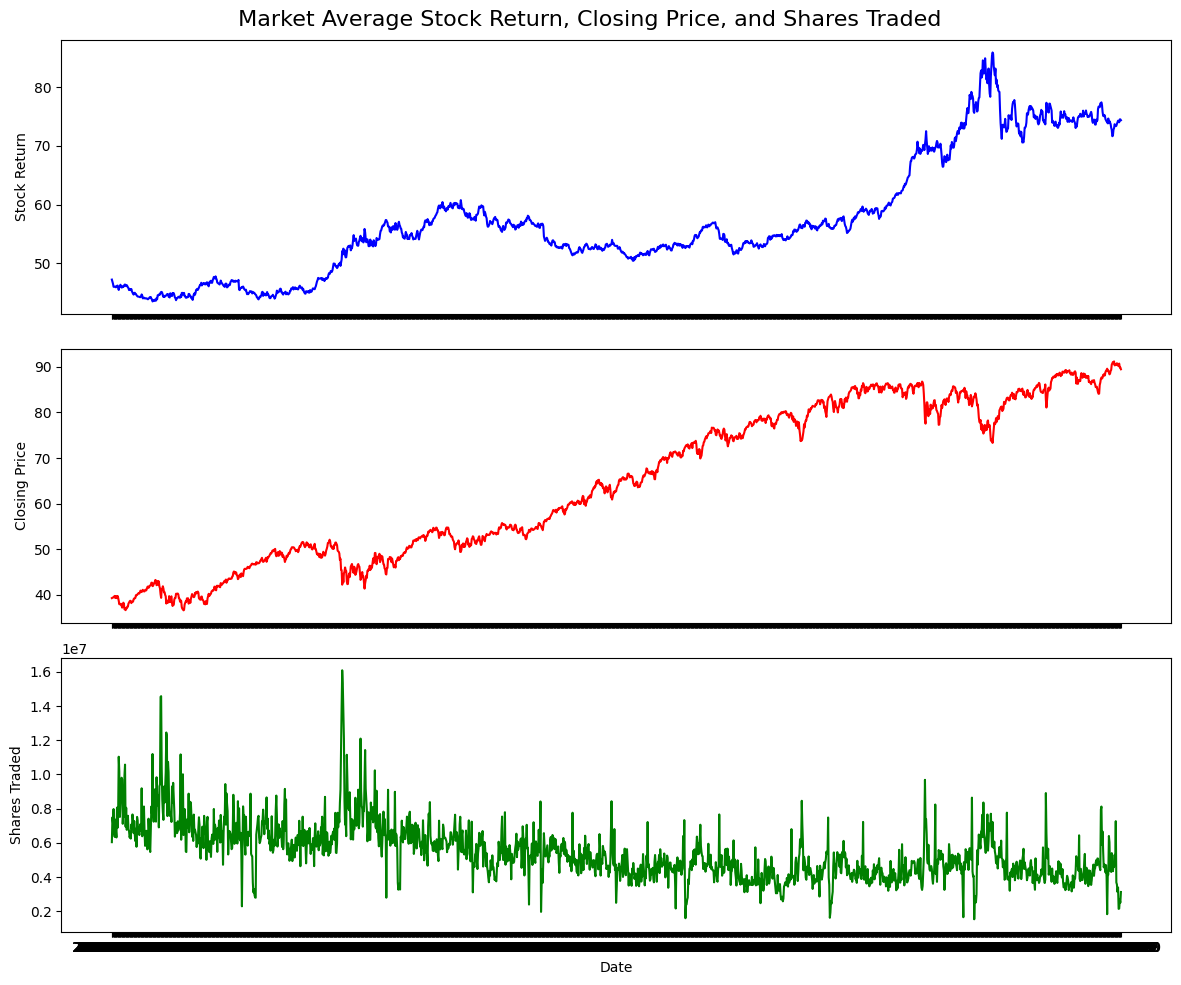

In [64]:
returns=train.groupby('Date')['returns'].mean().mul(100).rename('Average Return')
close_avg=train.groupby('Date')['ClosePrice'].mean().rename('Closing Price')
vol_avg=train.groupby('Date')['Volume'].mean().rename('Volume')

train_date = returns.index

df = pd.DataFrame({
    'Average Return': returns,
    'Closing Price': close_avg,
    'Volume': vol_avg
})

# Vẽ biểu đồ
fig, axs = plt.subplots(3, 1, figsize=(12, 10), sharex=True)

# Biểu đồ Stock Return
axs[0].plot(df.index, df['Average Return'], color='blue')
axs[0].set_ylabel('Stock Return')
# axs[0].set_ylim([-0.05, 0.05])  # Giới hạn trục y để tương tự biểu đồ của bạn

# Biểu đồ Closing Price
axs[1].plot(df.index, df['Closing Price'], color='red')
axs[1].set_ylabel('Closing Price')

# Biểu đồ Shares Traded (Volume)
axs[2].plot(df.index, df['Volume'], color='green')
axs[2].set_ylabel('Shares Traded')
axs[2].set_xlabel('Date')

# Thiết lập tiêu đề chung cho các biểu đồ
fig.suptitle(' Market Average Stock Return, Closing Price, and Shares Traded', fontsize=16)

plt.tight_layout()
plt.show()

Nhận xét: Có sựtăng trưởng vững chắc về lợi nhuận và giá cổ phiếu từ năm 2012 đến 2015, sau đó giảm nhẹ và ổn định hơn. Khối lượng giao dịch có xu hướng biến động mạnh vào các thời điểm điều chỉnh lớn trên thị trường.

1. Stock Return (Lợi nhuận cổ phiếu):
- Xu hướng tăng trưởng: Từ khoảng năm 2012 đến 2015, có một sự gia tăng mạnh mẽ về lợi nhuận cổ phiếu, đạt đỉnh vào khoảng giữa năm 2015. Sau đó, lợi nhuận có xu hướng giảm nhẹ nhưng vẫn duy trì ở mức cao.
- Biến động nhỏ: Trong suốt giai đoạn từ 2010 đến 2012, lợi nhuận có xu hướng khá ổn định với biến động nhỏ, trước khi có sự tăng trưởng mạnh.
- Giai đoạn suy giảm: Sau đỉnh điểm vào khoảng năm 2015, lợi nhuận giảm mạnh nhưng sau đó tiếp tục duy trì ổn định, mặc dù không còn đạt đỉnh như trước
  
2. Closing Price (Giá đóng cửa):
- Xu hướng tăng liên tục: Giá đóng cửa của cổ phiếu có xu hướng tăng trưởng ổn định trong suốt giai đoạn từ năm 2010 đến cuối năm 2016, với một vài đợt điều chỉnh nhỏ.
- Sự biến động trong ngắn hạn: Mặc dù xu hướng tổng thể là tăng, có một vài điểm giảm mạnh đáng kể vào các giai đoạn như khoảng giữa năm 2011, cuối năm 2012, và năm 2015. Tuy nhiên, các lần giảm này chỉ mang tính ngắn hạn và giá cổ phiếu tiếp tục tăng sau đó.
  
3. Shares Traded (Khối lượng cổ phiếu giao dịch):
- Sự biến động cao: Khối lượng cổ phiếu giao dịch có xu hướng dao động mạnh trong suốt giai đoạn này. Đặc biệt, có một số thời điểm khối lượng giao dịch tăng vọt đáng kể, ví dụ như vào năm 2011 và năm 2012.
- Khối lượng ổn định hơn từ năm 2014 trở đi: Sau giai đoạn biến động mạnh vào năm 2012, khối lượng giao dịch trở nên ổn định hơn từ năm 2014 cho đến năm 2016, mặc dù vẫn có một số thời điểm tăng cao đột ngột.
  
4. Mối quan hệ giữa các biến số:
- Tăng trưởng giá và lợi nhuận đồng thời: Sự gia tăng trong cả lợi nhuận cổ phiếu và giá đóng cửa từ năm 2012 đến 2015 cho thấy rằng thị trường có sự tăng trưởng mạnh mẽ trong giai đoạn này.
- Khối lượng giao dịch tăng ở các đỉnh: Những đợt tăng mạnh về khối lượng giao dịch thường xảy ra khi có sự điều chỉnh lớn trên thị trường, như vào các thời điểm năm 2011 và 2012. Điều này có thể cho thấy các nhà đầu tư phản ứng với sự thay đổi trong giá cổ phiếu.


**Lợi nhuận cổ phiếu trung bình hàng năm theo ngành**

In [65]:
stock_list = company_information.copy()
train['Date'] = pd.to_datetime(train['Date'], format='%Y-%m-%d', errors='coerce')

<ipython-input-66-f80b8de60fe6>:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-66-f80b8de60fe6>:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-66-f80b8de60fe6>:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-66-f80b8de60fe6>:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-66-f80b8de60fe6>:24: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and wi

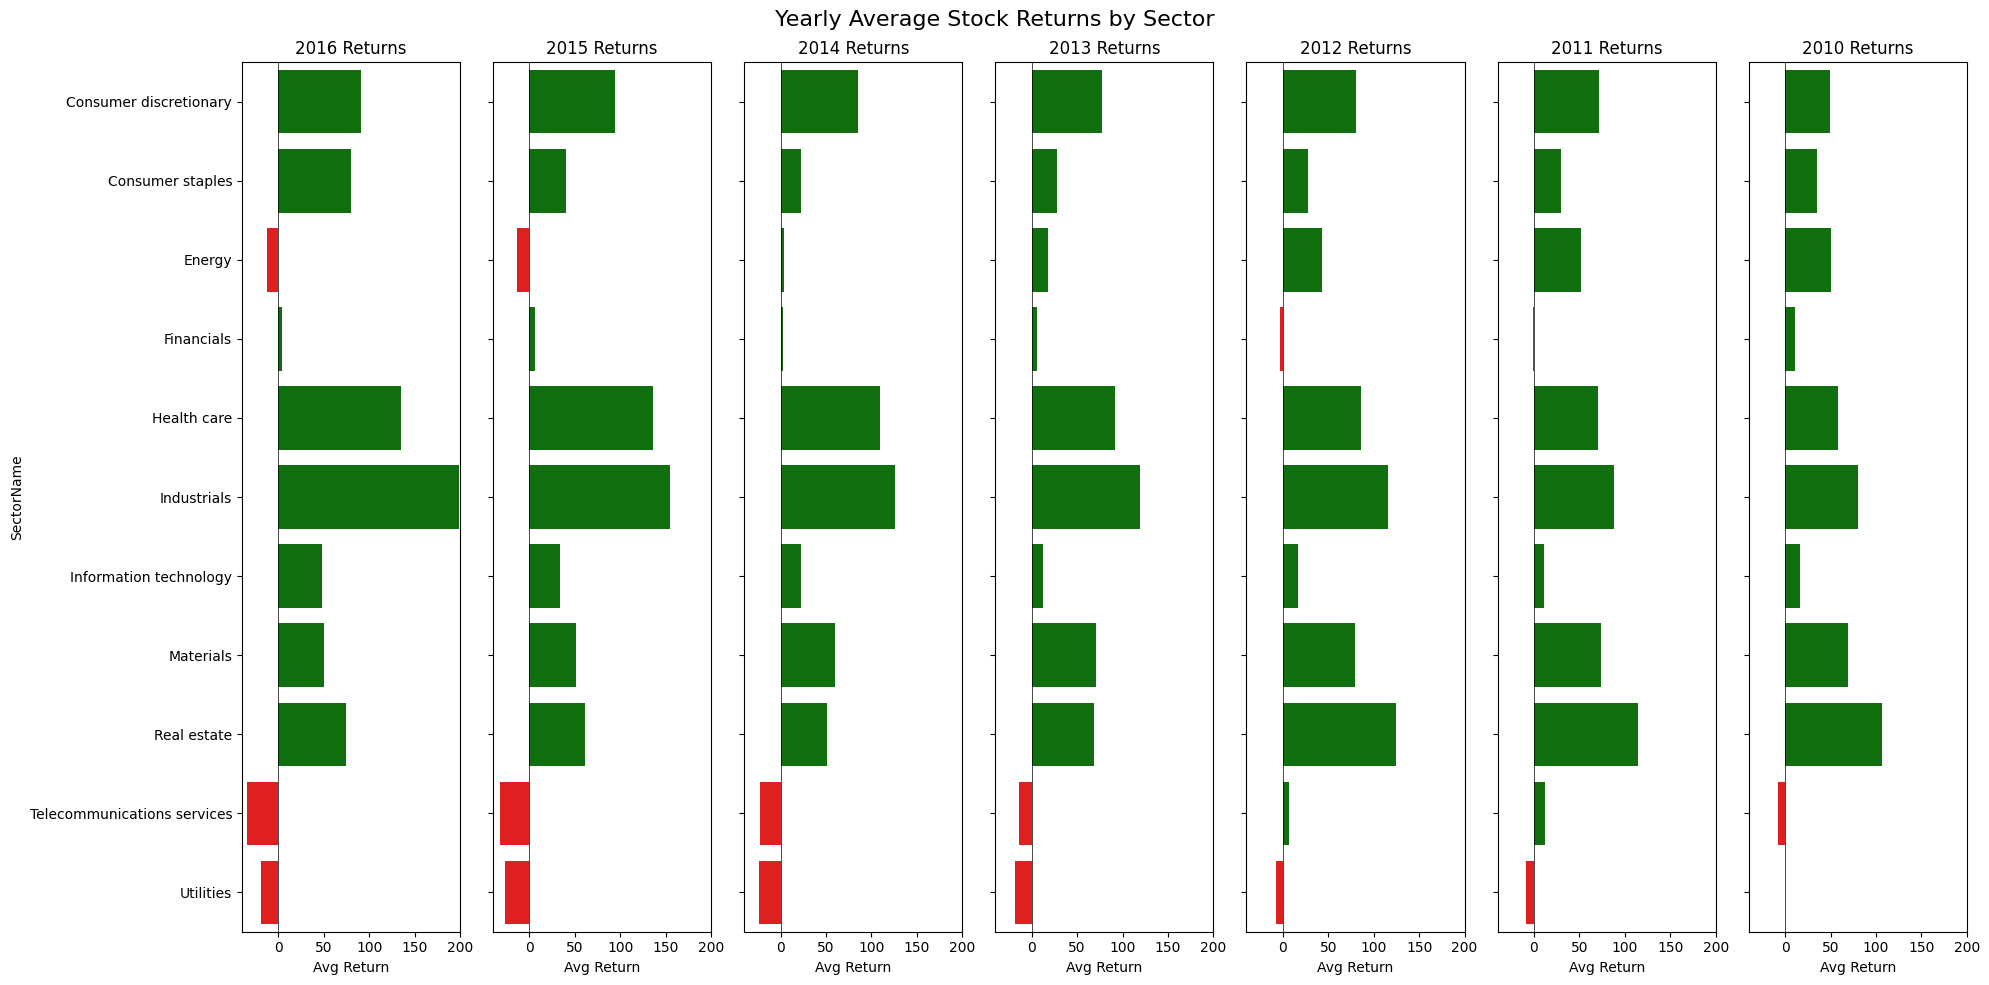

In [66]:
stock_list['SectorName']=[i.rstrip().lower().capitalize() for i in stock_list['Sector']]
stock_list['Name']=[i.rstrip().lower().capitalize() for i in stock_list['CompanyName']]

train_df = train.merge(stock_list[['Ticker','Name','SectorName']], on='Ticker', how='left')
train_df['Year'] = train_df['Date'].dt.year

years = {year: pd.DataFrame() for year in train_df.Year.unique()[::-1]}
for key in years.keys():
    df=train_df[train_df.Year == key]
    years[key] = df.groupby('SectorName')['returns'].mean().mul(100).rename("Avg_return_{}".format(key))
df=pd.concat((years[i].to_frame() for i in years.keys()), axis=1)

# Prepare plot
fig, axes = plt.subplots(1, 7, figsize=(20, 10), sharey=True)

# List of years to plot
years = ['Avg_return_2016', 'Avg_return_2015', 'Avg_return_2014','Avg_return_2013','Avg_return_2012','Avg_return_2011','Avg_return_2010']

# Plotting each year's data
for i, year in enumerate(years):
    # Create a custom color palette based on positive or negative returns
    colors = ['green' if val > 0 else 'red' for val in df[year]]

    sns.barplot(y='SectorName', x=year, data=df, ax=axes[i], palette=colors, orient='h')
    axes[i].set_title(f'{year[-4:]} Returns')
    axes[i].set_xlabel('Avg Return')
    axes[i].axvline(x=0, color='black', linewidth=0.5)
    axes[i].set_xlim(-40, 200)  # Set the x-axis range for all plots

# Adding an overall title
plt.suptitle('Yearly Average Stock Returns by Sector', fontsize=16)

plt.tight_layout()
plt.show()

Nhận xét: Các màu sắc từ đỏ (lợi nhuận âm) đến xanh lá (lợi nhuận dương) cho thấy rõ sự phân cực giữa các ngành có lợi nhuận tích cực và tiêu cực. Những ngành như Công nghiệp, Y tế, và Bất động sản luôn duy trì màu sắc xanh, cho thấy khả năng sinh lời cao, trong khi các ngành như Năng lượng và Dịch vụ viễn thông luôn ở mức âm hoặc rất thấp.

Xu hướng tăng trưởng theo từng năm:
- Industrials (Công nghiệp) duy trì lợi nhuận cao nhất so với các ngành khác qua toàn bộ giai đoạn, đặc biệt là năm 2016, khi lợi nhuận đã vượt mốc 200.
- Health care (Y tế) cũng có xu hướng tăng trưởng mạnh mẽ từ năm 2010 đến 2016, với mức lợi nhuận vượt trội, đặc biệt là từ 2012 trở đi, khi lợi nhuận của ngành này bắt đầu tăng đều.
=> Nên đầu tư vào 2 ngành này

Lĩnh vực chịu sự giảm sút:
- Energy (Năng lượng) thể hiện sự biến động mạnh nhất, với lợi nhuận thay đổi nhiều qua các năm. Từ năm 2010 đến 2015, có những giai đoạn lợi nhuận âm (năm 2016) và một số năm tăng trưởng nhỏ. Điều này cho thấy sự bất ổn trong ngành năng lượng, có thể do các yếu tố thị trường hoặc chính trị ảnh hưởng.
- Telecommunications services (Dịch vụ viễn thông) và Utilities (Tiện ích) vẫn duy trì mức âm hoặc rất thấp qua các năm, cho thấy đây là các ngành gặp nhiều thách thức trong giai đoạn này.

Sự phục hồi và biến động của các ngành:
- Financials (Tài chính) có sự thay đổi qua từng năm, đặc biệt là sự phục hồi rõ rệt từ năm 2011 đến 2016. Tuy nhiên, lợi nhuận của ngành này không ổn định và có những giai đoạn lợi nhuận âm.
- Consumer discretionary (Tiêu dùng không thiết yếu) giảm dần từ năm 2010 đến 2016, đặc biệt là vào các năm 2011 và 2012. Điều này có thể cho thấy sự thay đổi trong chi tiêu của người tiêu dùng trong các sản phẩm không thiết yếu khi điều kiện kinh tế biến động.

Nhóm ngành ổn định: Real estate (Bất động sản) và Materials (Vật liệu) có xu hướng ổn định với lợi nhuận tăng trưởng đều và không bị ảnh hưởng nhiều qua các năm. Đây có thể là những ngành có tiềm năng an toàn cho các nhà đầu tư tìm kiếm lợi nhuận ổn định.


In [67]:
train_df

Date Ticker   OpenPrice  ClosePrice    LowPrice   HighPrice  \
0      2016-01-05   WLTW  123.430000  125.839996  122.309998  126.250000   
1      2016-01-06   WLTW  125.239998  119.980003  119.940002  125.540001   
2      2016-01-07   WLTW  116.379997  114.949997  114.930000  119.739998   
3      2016-01-08   WLTW  115.480003  116.620003  113.500000  117.440002   
4      2016-01-11   WLTW  117.010002  114.970001  114.089996  117.330002   
...           ...    ...         ...         ...         ...         ...   
851259 2016-12-30    ZBH  103.309998  103.199997  102.849998  103.930000   
851260 2016-12-30   ZION   43.070000   43.040001   42.689999   43.310001   
851261 2016-12-30    ZTS   53.639999   53.529999   53.270000   53.740002   
851262 2016-12-30    AIV   44.730000   45.450001   44.410000   45.590000   
851263 2016-12-30    FTV   54.200001   53.630001   53.389999   54.480000   

           Volume   returns  Cummulative Return                         Name  \
0       2163600.0       NaN                 NaN         Willis towers watson   
1       2386400.0 -0.046567            0.953433         Willis towers watson   
2       2489500.0 -0.041924            0.913462         Willis towers watson   
3       2006300.0  0.014528            0.926732         Willis towers watson   
4       1408600.0 -0.014149            0.913621         Willis towers watson   
...           ...       ...                 ...                          ...   
851259   973800.0  0.629559            0.820089       Zimmer biomet holdings   
851260  1938100.0 -0.582946            0.342022                Zions bancorp   
851261  1701200.0  0.243727            0.425381                       Zoetis   
851262  1380900.0 -0.150943            0.361173  Apartment investment & mgmt   
851263   705100.0  0.179978            0.426176                 Fortive corp   

         SectorName  Year  
0        Financials  2016  
1        Financials  2016  
2        Financials  2016  
3        Financials  2016  
4        Financials  2016  
...             ...   ...  
851259  Health care  2016  
851260   Financials  2016  
851261  Health care  2016  
851262  Real estate  2016  
851263  Industrials  2016  

[851264 rows x 12 columns]

<ipython-input-68-26df9a156f40>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




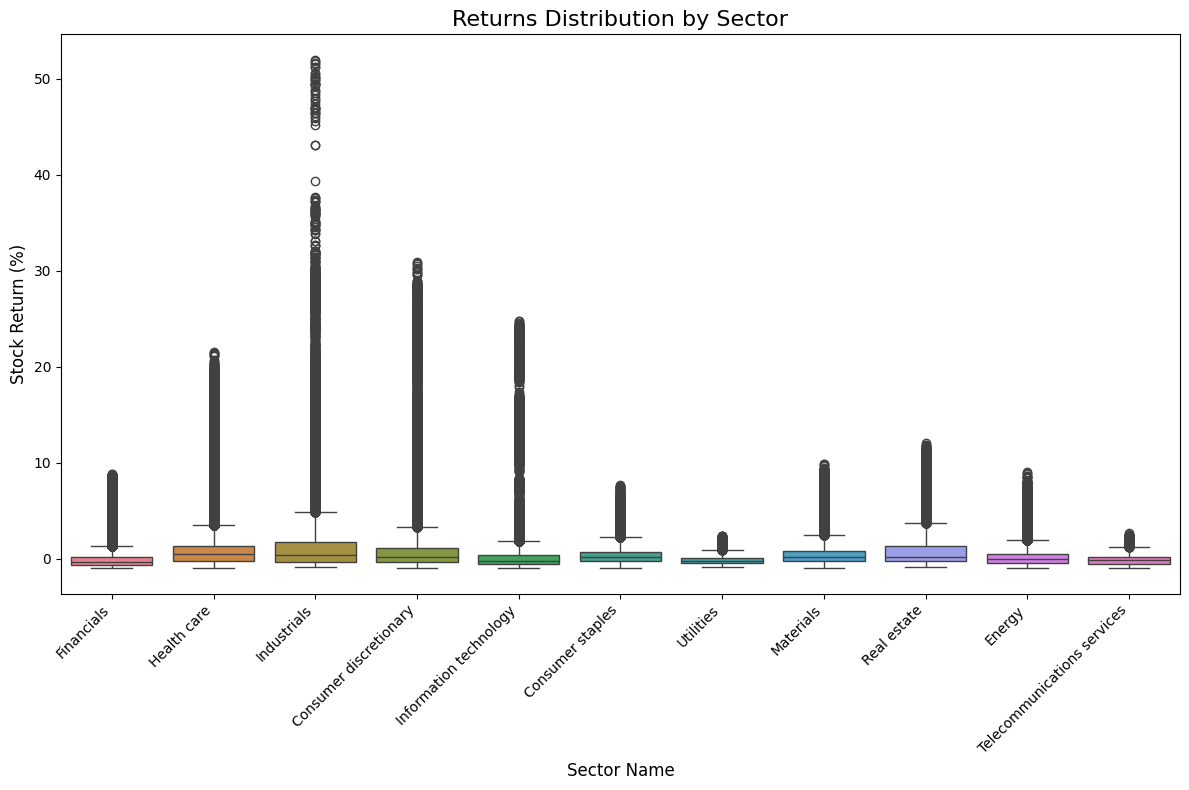

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Giả sử train_df đã có dữ liệu
# Nhân 'returns' với 100 để chuyển đổi thành phần trăm
# train_df['returns'] = train_df['returns'] / 100

# Thiết lập kích thước biểu đồ
plt.figure(figsize=(12, 8))

# Vẽ biểu đồ Box Plot với seaborn
sns.boxplot(x='SectorName', y='returns', data=train_df, palette='husl')

# Thêm tiêu đề và nhãn trục
plt.title('Returns Distribution by Sector', fontsize=16)
plt.ylabel('Stock Return (%)', fontsize=12)
plt.xlabel('Sector Name', fontsize=12)

# Xoay nhãn trục x để dễ đọc hơn
plt.xticks(rotation=45, ha='right')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()



1.Phân bố tổng thể:
- Biểu đồ này cho thấy phân bố Stock Return (%) của các ngành khác nhau trong thị trường.
- Mỗi hộp biểu thị phần giữa của dữ liệu (từ phân vị thứ nhất đến phân vị thứ ba), với đường ngang giữa hộp là giá trị trung vị (median).
- Những dấu chấm ở phía trên và phía dưới hộp là các outliers (giá trị ngoại lệ), biểu thị các giá trị cực đại hoặc cực tiểu trong phân bố dữ liệu của mỗi ngành.
  
2. Ngành có lợi nhuận cao nhất:
- Consumer discretionary (Tiêu dùng không thiết yếu) và Industrials (Công nghiệp) có phân phối lợi nhuận rộng nhất với nhiều outliers vượt quá mức 30% và thậm chí 50%.
- Điều này cho thấy các ngành này có tiềm năng tạo ra lợi nhuận cao hơn, nhưng cũng có nhiều biến động, với nhiều cổ phiếu trong các ngành này đạt được mức lợi nhuận rất cao trong khoảng thời gian nhất định.

3. Ngành có lợi nhuận ổn định hơn:
- Utilities (Tiện ích) và Telecommunications services (Dịch vụ viễn thông) có hộp nhỏ hơn và ít outliers, cho thấy lợi nhuận của các ngành này ổn định hơn và không có quá nhiều biến động.
- Các ngành này có lợi nhuận trung bình và biên độ dao động nhỏ hơn, nhưng không có tiềm năng mang lại lợi nhuận đột phá như các ngành tiêu dùng hoặc công nghiệp.
  
4. Ngành có lợi nhuận thấp:
- Financials (Tài chính) và Telecommunications services (Dịch vụ viễn thông) là hai ngành có lợi nhuận thấp nhất khi xét về phần lớn dữ liệu. Phần lớn các lợi nhuận nằm gần 0%, điều này cho thấy các ngành này gặp nhiều khó khăn trong việc đạt được lợi nhuận cao.
- Tuy nhiên, vẫn có một số outliers trong ngành tài chính, cho thấy rằng có những công ty cá biệt đạt được mức lợi nhuận cao hơn mức trung bình của ngành.
  
5. Biến động và ngoại lệ:
- Biểu đồ có nhiều outliers đặc biệt là trong các ngành Industrials, Consumer discretionary, Health care, và Real estate, cho thấy rằng có nhiều cổ phiếu trong những ngành này có lợi nhuận cao hoặc cực cao.
- Ngược lại, các ngành như Telecommunications services, Materials, và Utilities ít có outliers hơn, điều này cho thấy sự ổn định trong lợi nhuận của các cổ phiếu thuộc các ngành này.
  
6. Đánh giá rủi ro và lợi nhuận:
- Các ngành như Consumer discretionary và Industrials tuy có tiềm năng lợi nhuận cao, nhưng cũng đi kèm với rủi ro lớn do sự biến động lớn (nhiều outliers).
- Ngành Utilities và Telecommunications services có lợi nhuận ổn định hơn nhưng ít biến động, cho thấy rủi ro thấp nhưng lợi nhuận cũng khó đạt mức cao.

 **Phân tích tương quan giá đóng cửa theo sector**

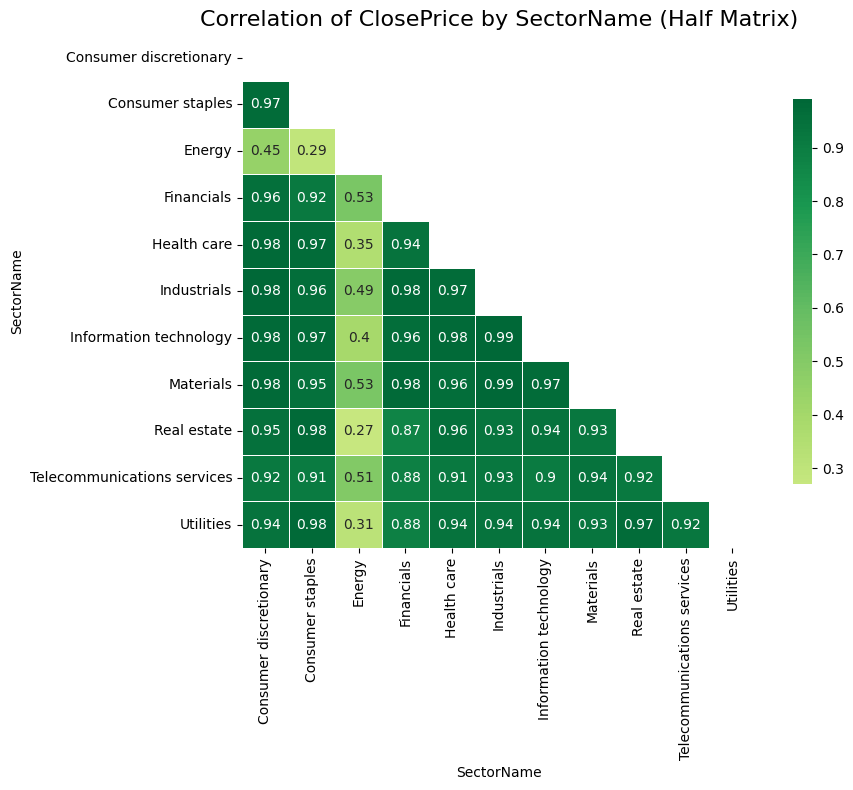

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Nhóm dữ liệu theo SectorName và tính mối tương quan của giá ClosePrice
correlation_matrix = train_df.pivot_table(index='Date', columns='SectorName', values='ClosePrice').corr()

# Tạo một mask để chỉ vẽ tam giác dưới (1 nửa ma trận tương quan)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Thiết lập kích thước và vẽ biểu đồ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, cmap='RdYlGn', annot=True, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.75})

# Thiết lập tiêu đề cho biểu đồ
plt.title('Correlation of ClosePrice by SectorName (Half Matrix)', fontsize=16)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


1. Tương quan cao giữa các ngành:
- Hầu hết các ngành đều có mối tương quan mạnh mẽ với nhau, với nhiều giá trị tương quan nằm trên 0.9, đặc biệt là giữa các ngành như Consumer discretionary, Industrials, Information technology, Materials, và Utilities.
- Những ngành này có giá ClosePrice di chuyển khá đồng điệu với nhau, điều này có thể cho thấy các yếu tố chung của thị trường (ví dụ như điều kiện kinh tế vĩ mô) ảnh hưởng đến giá cổ phiếu của các ngành này.
2. Ngành Energy có tương quan thấp:
- Ngành Energy (Năng lượng) có mối tương quan thấp hơn với các ngành khác, đặc biệt là với Health care (0.35), Industrials (0.49), và Materials (0.53).
- Điều này cho thấy rằng giá cổ phiếu trong ngành năng lượng di chuyển theo xu hướng khác với các ngành còn lại, có thể do các yếu tố đặc thù như giá dầu, nguồn cung năng lượng, và chính trị ảnh hưởng trực tiếp đến ngành này hơn các yếu tố kinh tế chung.

 **Phân tích tương quan biến động cổ phiếu theo sector**

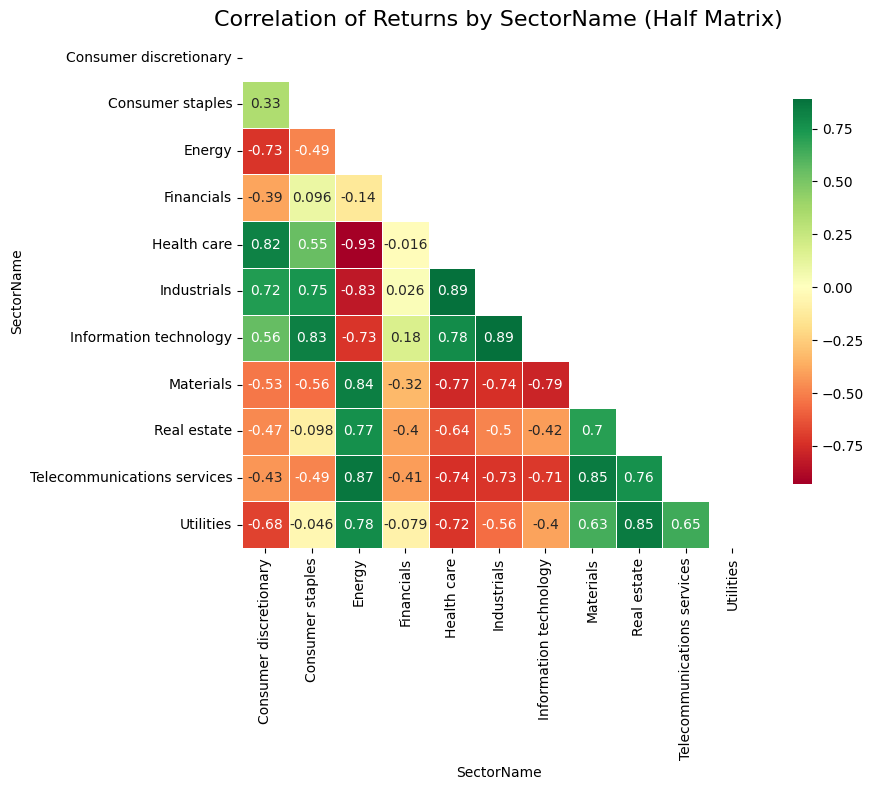

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Nhóm dữ liệu theo SectorName và tính mối tương quan của giá ClosePrice
correlation_matrix = train_df.pivot_table(index='Date', columns='SectorName', values='returns').corr()

# Tạo một mask để chỉ vẽ tam giác dưới (1 nửa ma trận tương quan)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Thiết lập kích thước và vẽ biểu đồ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, cmap='RdYlGn', annot=True, center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.75})

# Thiết lập tiêu đề cho biểu đồ
plt.title('Correlation of Returns by SectorName (Half Matrix)', fontsize=16)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


1. Tương quan cao (dương):
- Consumer staples và Information technology có mối tương quan mạnh mẽ, với giá trị 0.83. Điều này cho thấy hai ngành này thường di chuyển đồng điệu với nhau, có thể phản ánh sự phụ thuộc của ngành hàng tiêu dùng vào công nghệ.
- Real estate và Telecommunications services có mức tương quan tương đối cao, đạt 0.85, cho thấy giá trị lợi nhuận của hai ngành này có xu hướng biến động cùng chiều.
- Industrials và Information technology có tương quan 0.78, cho thấy các ngành công nghiệp và công nghệ có xu hướng phản ứng tương tự với các điều kiện thị trường.
  
2. Tương quan âm (ngược chiều):
- Energy và Health care có mối tương quan âm mạnh, với giá trị -0.93, cho thấy khi ngành năng lượng tăng, ngành y tế có xu hướng giảm, và ngược lại. Đây có thể là do sự khác biệt lớn trong yếu tố tác động đến hai ngành này, ví dụ như sự thay đổi giá dầu hay các chính sách y tế.
- Energy và Information technology cũng có mức tương quan âm, đạt -0.73, cho thấy hai ngành này thường có lợi nhuận di chuyển ngược chiều nhau.
- Consumer discretionary và Utilities có tương quan -0.68, cho thấy sự ngược chiều trong lợi nhuận của hai ngành này, có thể do bản chất ngành tiêu dùng không thiết yếu và dịch vụ tiện ích có những động lực kinh doanh khác nhau.
  
3. Ngành có mối tương quan thấp với nhiều ngành khác:
- Energy (Năng lượng) là ngành có nhiều mối tương quan âm với các ngành khác, đặc biệt là với Health care (-0.93), Information technology (-0.73), và Materials (-0.77). Điều này phản ánh đặc thù của ngành năng lượng khi chịu tác động mạnh từ các yếu tố riêng biệt như giá dầu và chính trị toàn cầu.
- Utilities (Tiện ích) cũng có mức tương quan âm với nhiều ngành khác, đặc biệt là với Consumer discretionary (-0.68) và Industrials (-0.72). Ngành tiện ích thường có sự ổn định cao và ít bị ảnh hưởng bởi các biến động kinh tế ngắn hạn, trong khi các ngành tiêu dùng và công nghiệp có xu hướng nhạy cảm hơn với các yếu tố kinh tế.
  
4. Sự kết hợp giữa tương quan cao và thấp:
- Health care và Utilities có mối tương quan khá cao, đạt 0.78, cho thấy hai ngành này có xu hướng di chuyển cùng chiều. Điều này có thể phản ánh rằng khi các yếu tố vĩ mô ảnh hưởng đến cả hai ngành, giá trị lợi nhuận của chúng có thể tăng hoặc giảm cùng nhau.
- Ngược lại, Materials có mối tương quan âm với nhiều ngành, bao gồm Real estate (-0.42) và Telecommunications services (-0.74), cho thấy các yếu tố ảnh hưởng đến lợi nhuận của ngành vật liệu có sự khác biệt rõ rệt so với các ngành khác.

**Phân tích chuyên sâu vào từng loại cổ phiếu cụ thể**

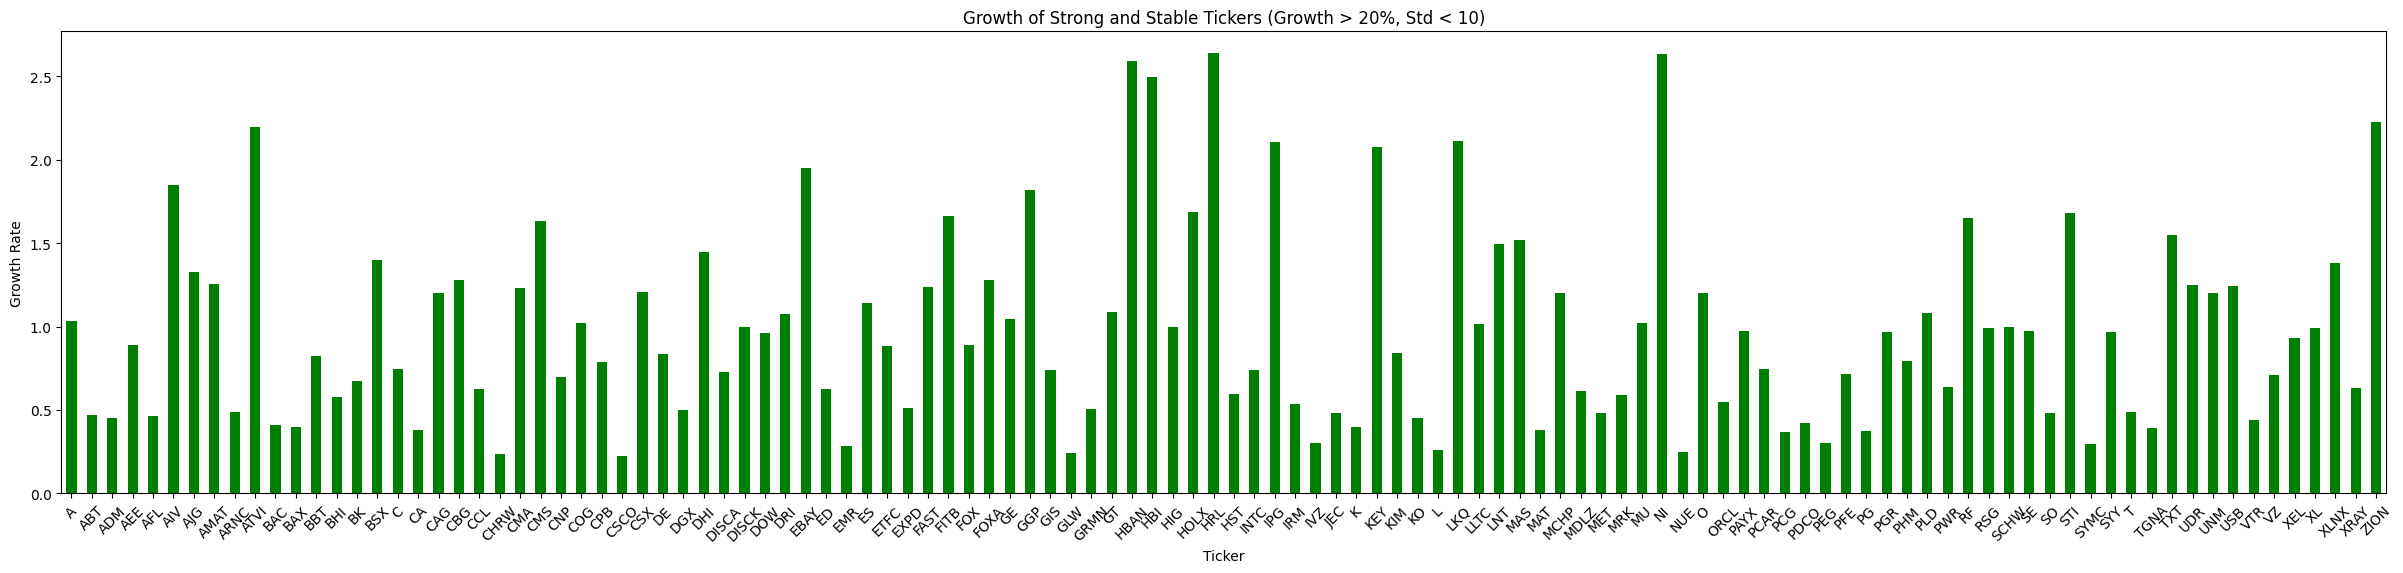

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
# Đếm số lần xuất hiện của mỗi mã cổ phiếu (Ticker)
ticker_counts = stock_price['Ticker'].value_counts()

# Lọc những mã cổ phiếu có tần suất >= 1750
top_tickers = ticker_counts[ticker_counts >= 1750].index

# Lọc dữ liệu của các mã cổ phiếu này
top_ticker_data = stock_price[stock_price['Ticker'].isin(top_tickers)]

# Tính toán sự phát triển mạnh bằng cách kiểm tra tỷ lệ thay đổi giá đóng cửa (ClosePrice)
ticker_growth = top_ticker_data.groupby('Ticker').apply(lambda x: (x['ClosePrice'].iloc[-1] - x['ClosePrice'].iloc[0]) / x['ClosePrice'].iloc[0])

# Đo lường tính ổn định bằng cách tính độ lệch chuẩn của giá đóng cửa
ticker_volatility = top_ticker_data.groupby('Ticker')['ClosePrice'].std()

# Lọc các mã cổ phiếu phát triển mạnh và ổn định
strong_stable_tickers = ticker_growth[(ticker_growth > 0.2) & (ticker_volatility < 10)]

# Trực quan hóa kết quả
plt.figure(figsize=(30, 6))
strong_stable_tickers.plot(kind='bar', color='green')
plt.title('Growth of Strong and Stable Tickers (Growth > 20%, Std < 10)')
plt.xlabel('Ticker')
plt.ylabel('Growth Rate')
plt.xticks(rotation=45)
plt.show()


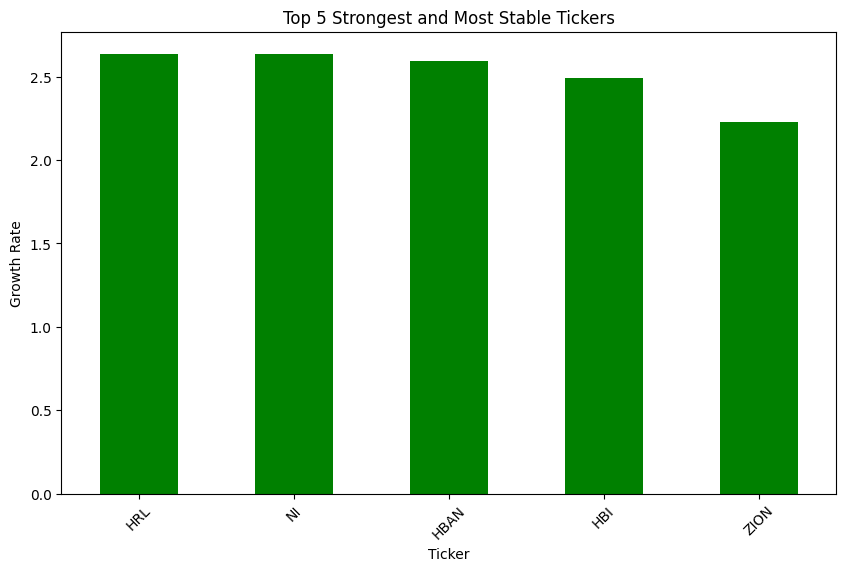

In [72]:
# Sắp xếp theo tỷ lệ tăng trưởng và lấy ra 5 mã cổ phiếu cao nhất
top_5_tickers = strong_stable_tickers.sort_values(ascending=False).head(5)

# Trực quan hóa kết quả
plt.figure(figsize=(10, 6))
top_5_tickers.plot(kind='bar', color='green')
plt.title('Top 5 Strongest and Most Stable Tickers')
plt.xlabel('Ticker')
plt.ylabel('Growth Rate')
plt.xticks(rotation=45)
plt.show()

In [105]:
# Chọn ra 3 công ty chính để phân tích
HRL = stock_price[stock_price['Ticker'] == 'HRL']
HBAN = stock_price[stock_price['Ticker'] == 'HBAN']
HBI = stock_price[stock_price['Ticker'] == 'HBI']
# Set index
HRL.set_index('Date', inplace=True)
HBAN.set_index('Date', inplace=True)
HBI.set_index('Date', inplace=True)

 **So sánh Close Price giữa 3 công ty**

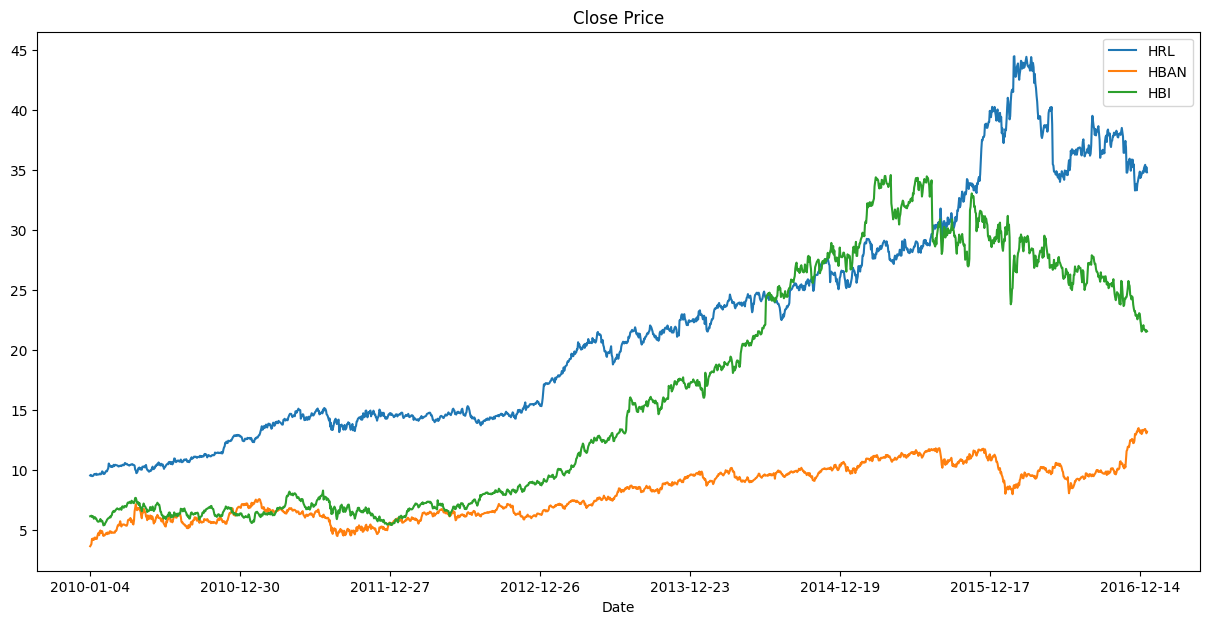

In [106]:
# So sánh Close Price của 3 công ty tốt nhất
plt.figure(figsize=(15, 7))

HRL['ClosePrice'].plot(label = 'HRL')
HBAN['ClosePrice'].plot(label = 'HBAN')
HBI['ClosePrice'].plot(label = 'HBI')

plt.title('Close Price')
plt.legend()
plt.show()

**So sánh khối lượng giao dịch giữa 3 công ty**

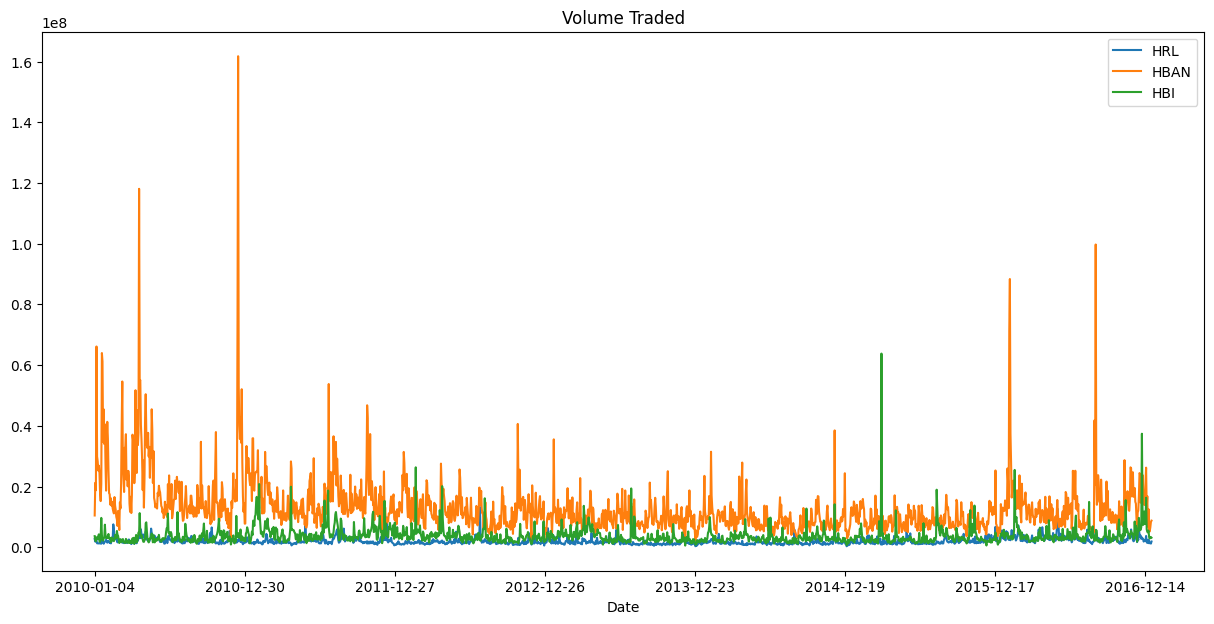

In [94]:
# So sánh Volume Traded của 3 công ty tốt nhất
plt.figure(figsize=(15, 7))
HRL['Volume'].plot(label = 'HRL')
HBAN['Volume'].plot(label = 'HBAN')
HBI['Volume'].plot(label = 'HBI')

plt.title('Volume Traded')
plt.legend()
plt.show()

Đánh giá:
- Mức độ giao dịch: HBAN > NI > HRL (Mặc dù HRL được đánh gía là tăng trưởng tốt nhất nhưng về mức độ giao dịch thì lại ít nhất)
- HBAN có khối lượng giao dịch vượt trội hơn hẳn nhưng giá đóng cửa luôn thấp nhất

**Tìm hiểu giai đoạn HBAN có khối lượng giao dịch lớn nhất**

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 8 () missing from current font.



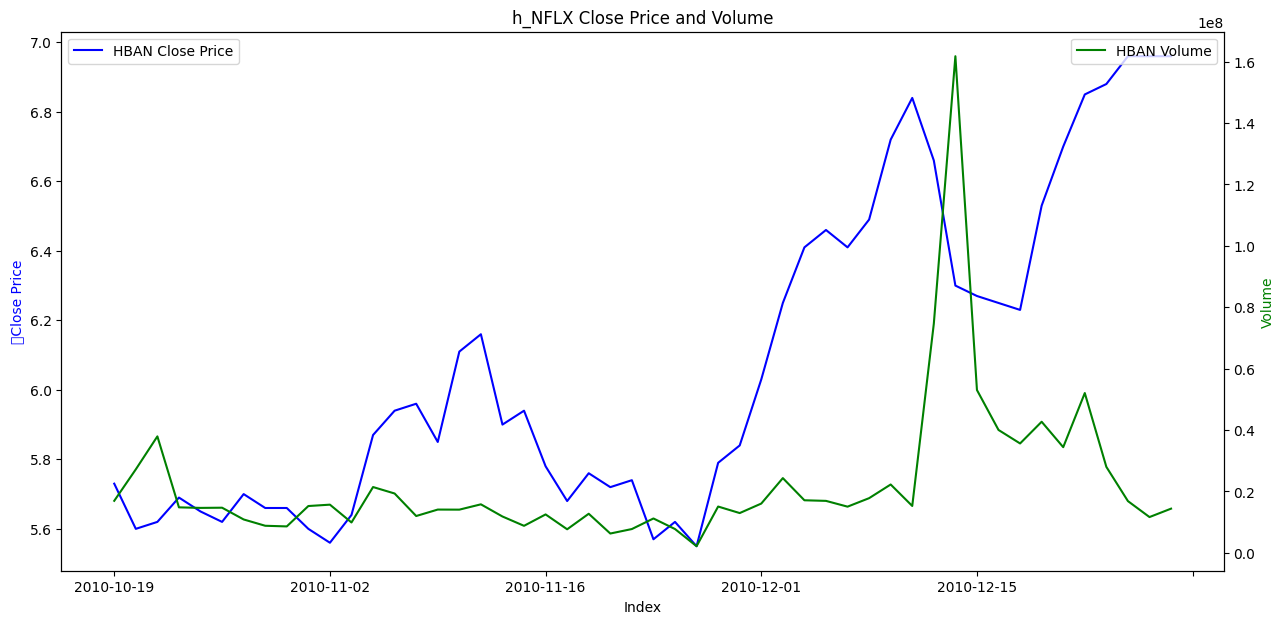

In [95]:
plt.figure(figsize=(15, 7))
# Tạo biểu đồ với kích thước phù hợp
ax = HBAN.iloc[200:250]['ClosePrice'].plot(label='HBAN Close Price', color='blue')

# Tạo trục y thứ hai và vẽ Volume trên đó
ax2 = ax.twinx()
HBAN.iloc[200:250]['Volume'].plot(ax=ax2, label='HBAN Volume', color='green')

# Thiết lập nhãn và tiêu đề cho biểu đồ
ax.set_xlabel('Index')
ax.set_ylabel('Close Price', color='blue')
ax2.set_ylabel('Volume', color='green')
ax.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title('h_NFLX Close Price and Volume')

# Hiển thị biểu đồ
plt.show()


**So sánh tổng tài sản giao dịch giữa 3 công ty**

<ipython-input-107-f28deffc4cc6>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-107-f28deffc4cc6>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-107-f28deffc4cc6>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



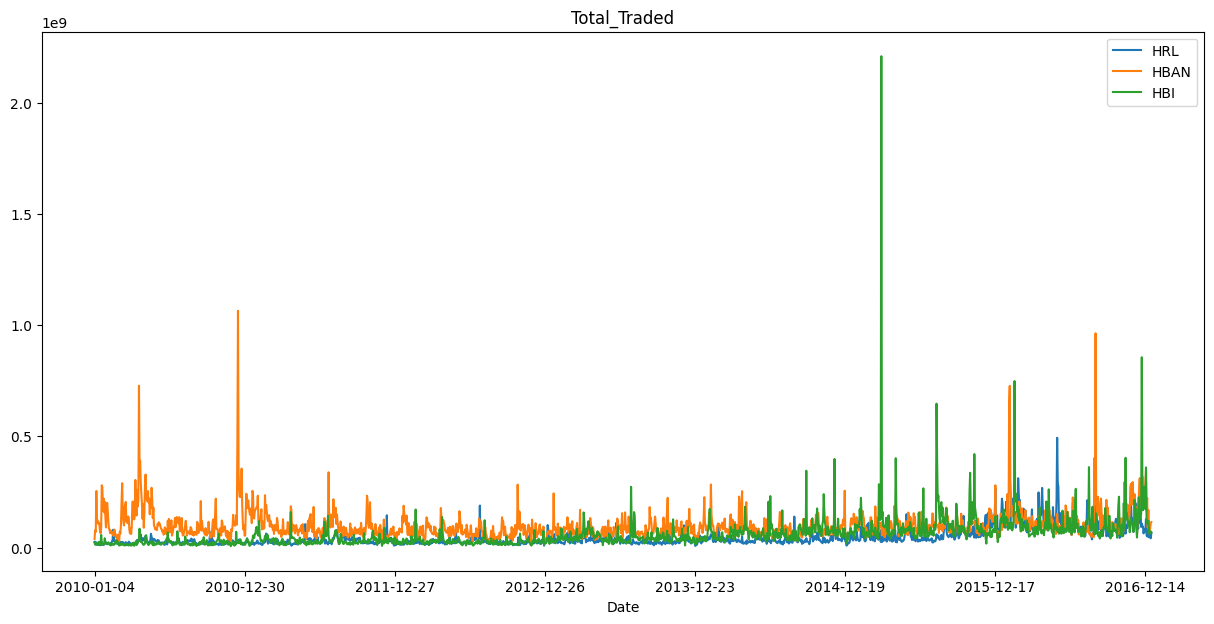

In [107]:
# Tạo thêm 1 cột là tổng số tiền giao dịch (Total money Traded)
HRL['Total_Traded'] = HRL['OpenPrice'] * HRL['Volume']
HBAN['Total_Traded'] = HBAN['OpenPrice'] * HBAN['Volume']
HBI['Total_Traded'] = HBI['OpenPrice'] * HBI['Volume']

# Dựng biểu đồ
plt.figure(figsize=(15, 7))
HRL['Total_Traded'].plot(label = 'HRL')
HBAN['Total_Traded'].plot(label = 'HBAN')
HBI['Total_Traded'].plot(label = 'HBI')
plt.title('Total_Traded')
plt.legend()
plt.show()

**Moving Average**

<ipython-input-108-d4a302717784>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-108-d4a302717784>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



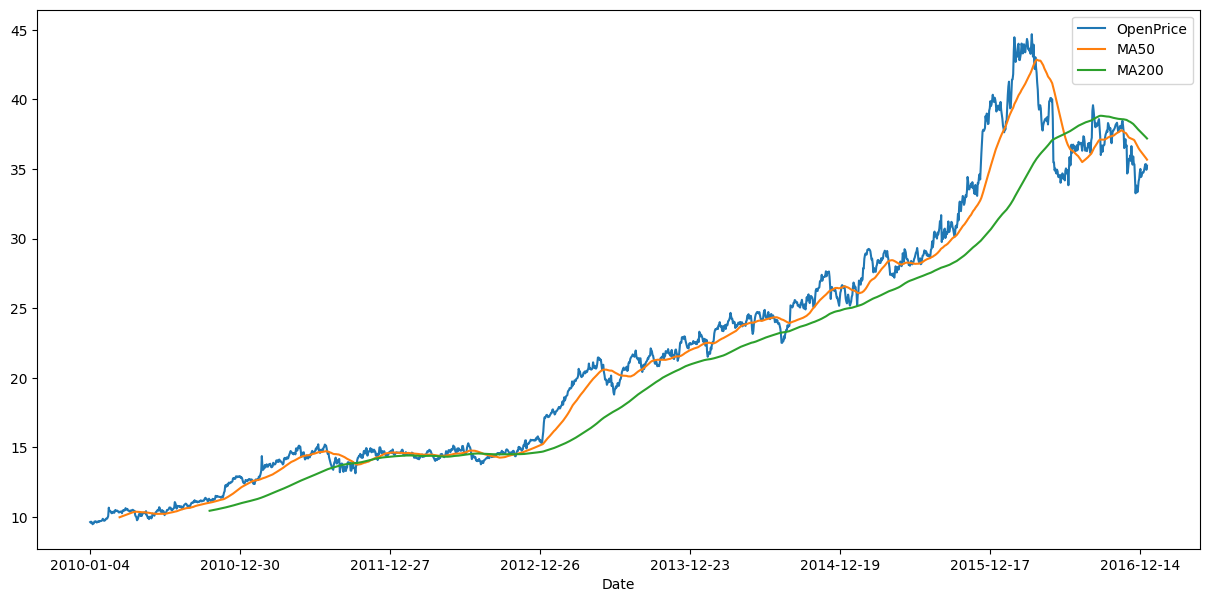

In [108]:
#Moving average: Để cho dễ dàng đưa ra phán đoán, tránh những điểm gây nhiễu
HRL['MA50'] = HRL['ClosePrice'].rolling(50).mean()
HRL['OpenPrice'].plot(figsize = (15,7))
HRL['MA50'].plot(label = 'MA50')
HRL['MA200'] = HRL['ClosePrice'].rolling(200).mean()
HRL['MA200'].plot(label = 'MA200')
plt.legend()
plt.show()

**Phân tích tương quan**

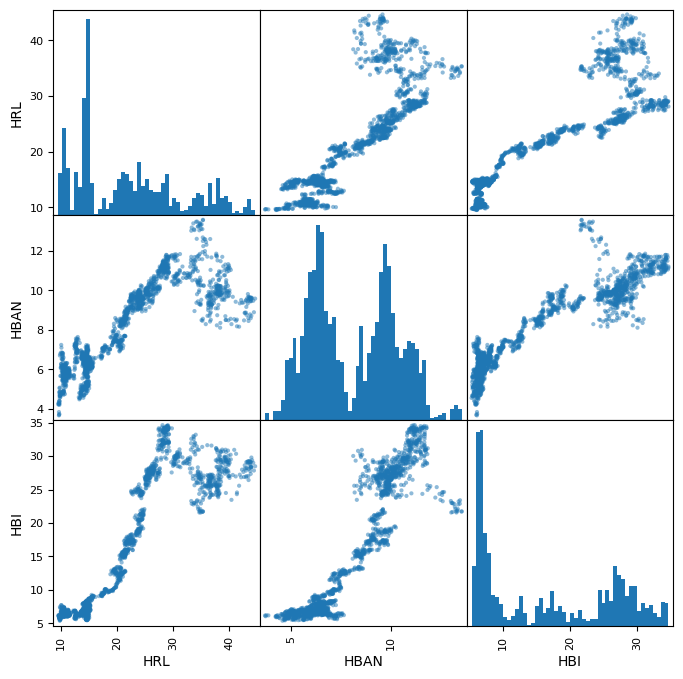

In [109]:
three_best_comp = pd.concat([HRL['OpenPrice'],HBAN['OpenPrice'],HBI['OpenPrice']],axis = 1)
three_best_comp.columns = ['HRL','HBAN','HBI']
#mối quan hệ giữa giá mở cửa của ba công ty theo thời gian.
scatter_matrix(three_best_comp, figsize = (8,8), hist_kwds = {'bins':50})
plt.show()

Cả 3 công ty đều có 1 chút tương quan thuận về giá mở cửa

**So sánh biến động cổ phiếu giữa 3 công ty**

In [110]:
# Daily Percentage Change
HRL['returns'] = (HRL['ClosePrice']/HRL['ClosePrice'].shift(1)) - 1
HBAN['returns'] = (HBAN['ClosePrice']/HBAN['ClosePrice'].shift(1)) - 1
HBI['returns'] = (HBI['ClosePrice']/HBI['ClosePrice'].shift(1)) - 1

<ipython-input-110-3121fce71784>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-110-3121fce71784>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-110-3121fce71784>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



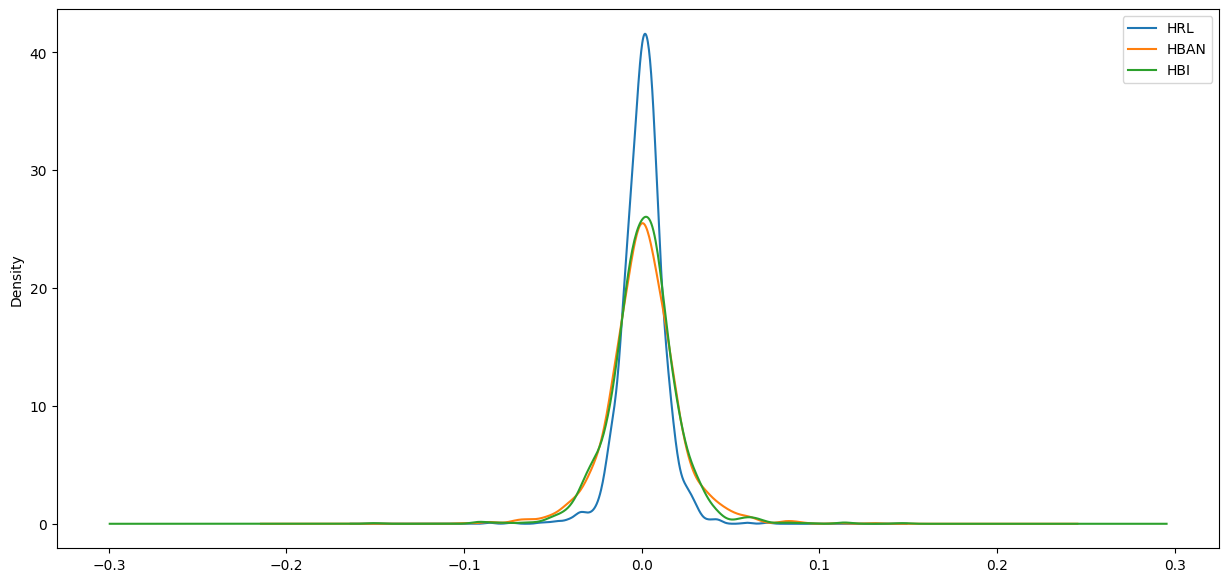

In [111]:
# phân phối mật độ xác suất (KDE - Kernel Density Estimate) của lợi nhuận (returns)
HRL['returns'].plot(kind = 'kde', label = 'HRL', figsize = (15,7))
HBAN['returns'].plot(kind = 'kde', label = 'HBAN')
HBI['returns'].plot(kind = 'kde', label = 'HBI')
plt.legend()
plt.show()

<Axes: >

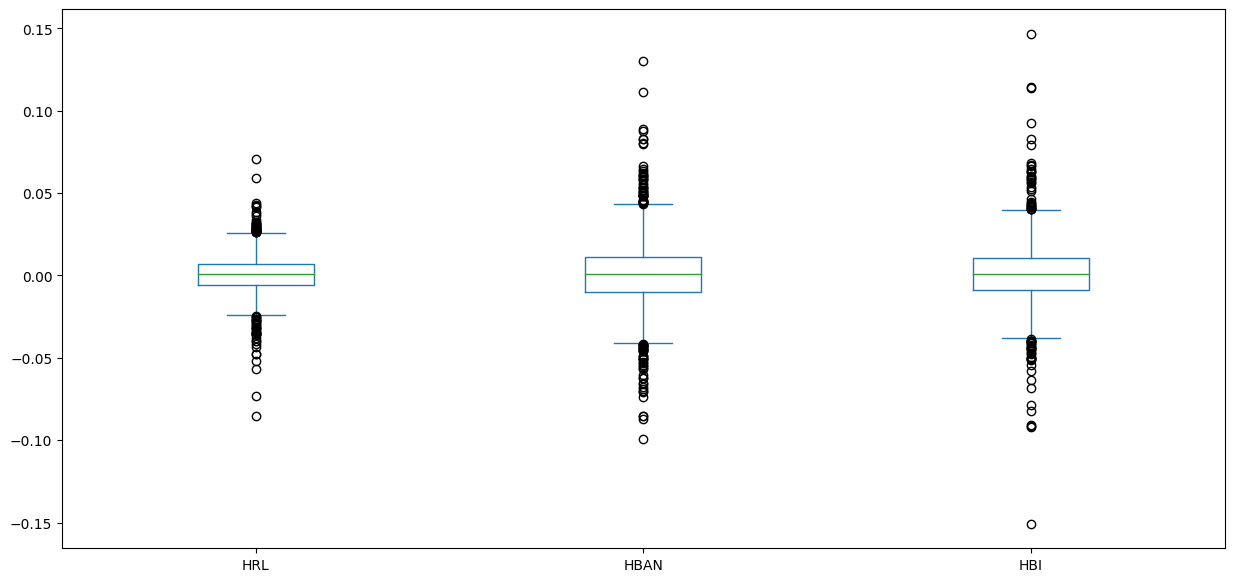

In [112]:
box_df = pd.concat([HRL['returns'], HBAN['returns'],HBI['returns']], axis = 1)
box_df.columns = ['HRL','HBAN','HBI']
box_df.plot(kind = 'box', figsize = (15,7))

**So sánh mối tương quan về biến động cổ phiếu giữa 3 công ty**

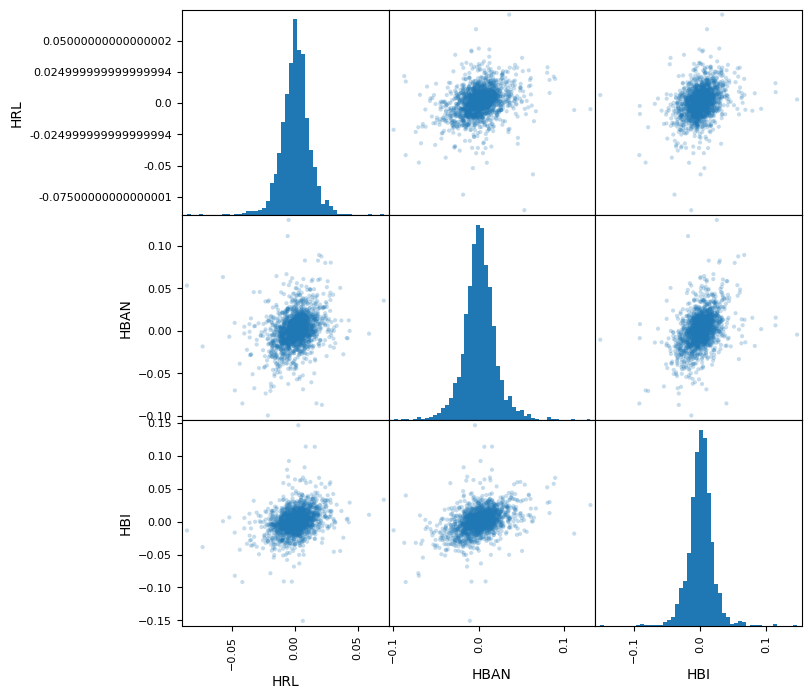

In [113]:
scatter_matrix(box_df, figsize = (8,8), hist_kwds = {'bins':50}, alpha = 0.25)
plt.show()

<ipython-input-114-083764356c96>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-114-083764356c96>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-114-083764356c96>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



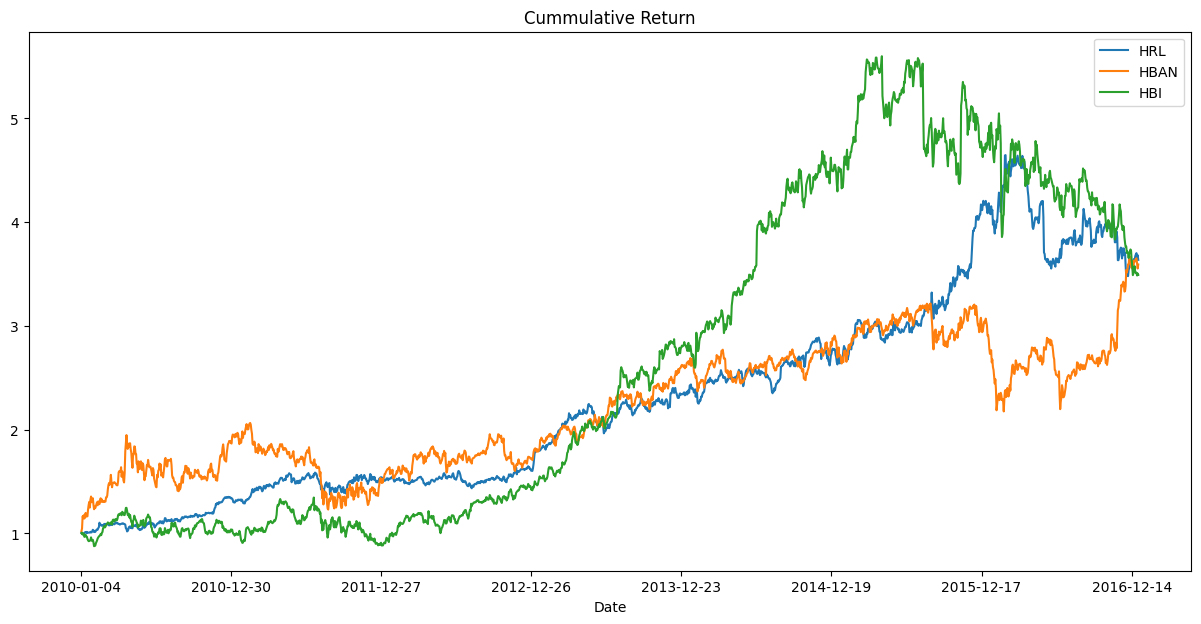

In [114]:
# Lợi nhuận tích luỹ
HRL['Cummulative Return'] = (1 + HRL['returns']).cumprod()
HBAN['Cummulative Return'] = (1 + HBAN['returns']).cumprod()
HBI['Cummulative Return'] = (1 + HBI['returns']).cumprod()

HRL['Cummulative Return'].plot(label = 'HRL', figsize = (15,7))
HBAN['Cummulative Return'].plot(label = 'HBAN')
HBI['Cummulative Return'].plot(label = 'HBI')
plt.legend()
plt.title('Cummulative Return')
plt.show()

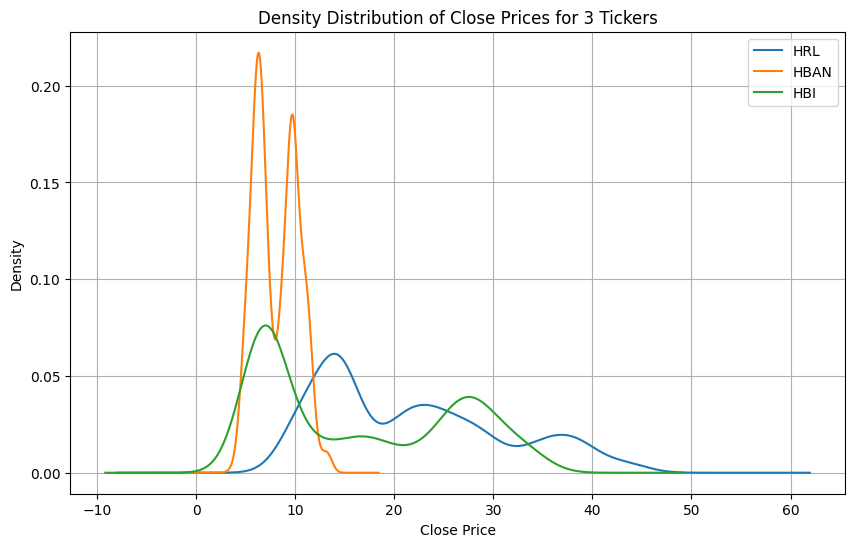

In [124]:
# Vẽ biểu đồ mật độ phân phối của dữ liệu giá đóng cửa của 3 cổ phiếu
plt.figure(figsize=(10, 6))

for ticker, df in ticker_data.items():
    # Vẽ biểu đồ mật độ phân phối cho giá đóng cửa (ClosePrice)
    df['ClosePrice'].plot(kind='kde', label=ticker)

# Tùy chỉnh biểu đồ
plt.title('Density Distribution of Close Prices for 3 Tickers')
plt.xlabel('Close Price')
plt.ylabel('Density')
plt.legend()
plt.grid(True)

# Hiển thị biểu đồ
plt.show()


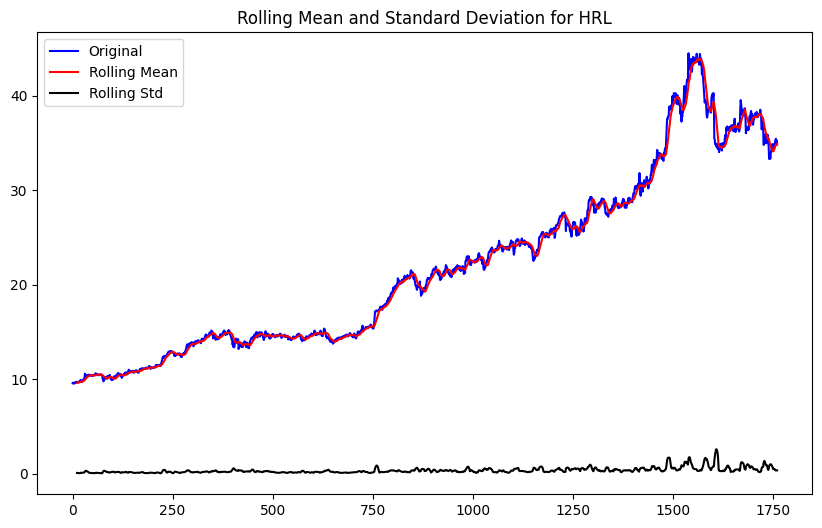

Results of Dickey-Fuller Test for HRL:
Test Statistics                  -0.577292
p-value                           0.876031
No. of lags used                  8.000000
Number of observations used    1753.000000
critical value (1%)              -3.434086
critical value (5%)              -2.863190
critical value (10%)             -2.567648
dtype: float64


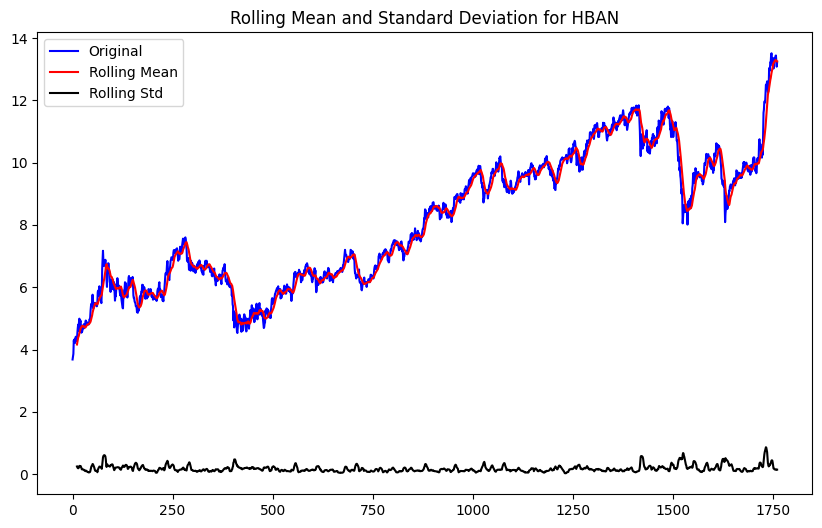

Results of Dickey-Fuller Test for HBAN:
Test Statistics                  -1.183873
p-value                           0.680494
No. of lags used                  0.000000
Number of observations used    1761.000000
critical value (1%)              -3.434069
critical value (5%)              -2.863183
critical value (10%)             -2.567645
dtype: float64


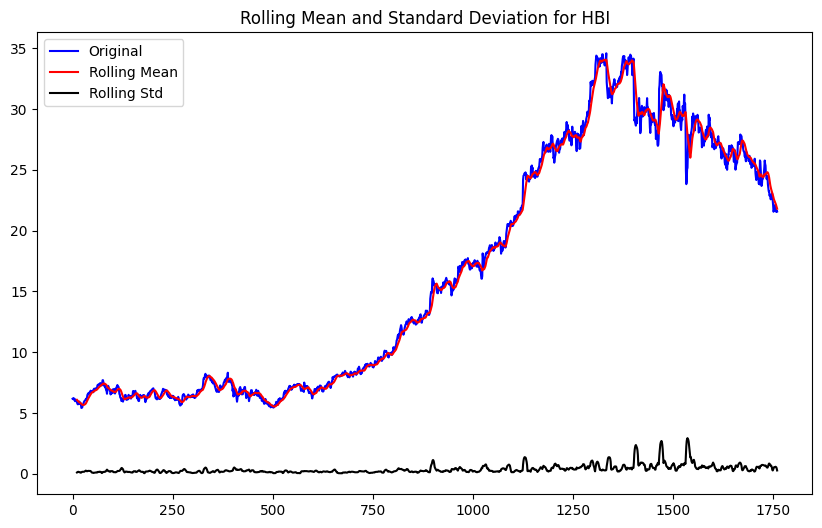

Results of Dickey-Fuller Test for HBI:
Test Statistics                  -0.940284
p-value                           0.774417
No. of lags used                 10.000000
Number of observations used    1751.000000
critical value (1%)              -3.434090
critical value (5%)              -2.863192
critical value (10%)             -2.567649
dtype: float64


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

# Số ngày tính rolling statistics
rolling_days = 12

# Hàm kiểm tra tính dừng
def test_stationarity(timeseries, ticker):

    # Tính rolling statistics
    rolmean = timeseries.rolling(rolling_days).mean()
    rolstd = timeseries.rolling(rolling_days).std()

    # Vẽ biểu đồ rolling statistics
    plt.figure(figsize=(10, 6))
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title(f'Rolling Mean and Standard Deviation for {ticker}')
    plt.show(block=False)

    # Kiểm tra Dickey-Fuller
    print(f"Results of Dickey-Fuller Test for {ticker}:")
    adft = adfuller(timeseries.dropna(), autolag='AIC')

    output = pd.Series(adft[0:4], index=['Test Statistics', 'p-value', 'No. of lags used', 'Number of observations used'])
    for key, values in adft[4].items():
        output[f'critical value ({key})'] = values
    print(output)

# Lặp qua từng ticker và kiểm tra tính dừng
for ticker, df in ticker_data.items():
    test_stationarity(df['ClosePrice'], ticker)


<Figure size 2500x1600 with 0 Axes>

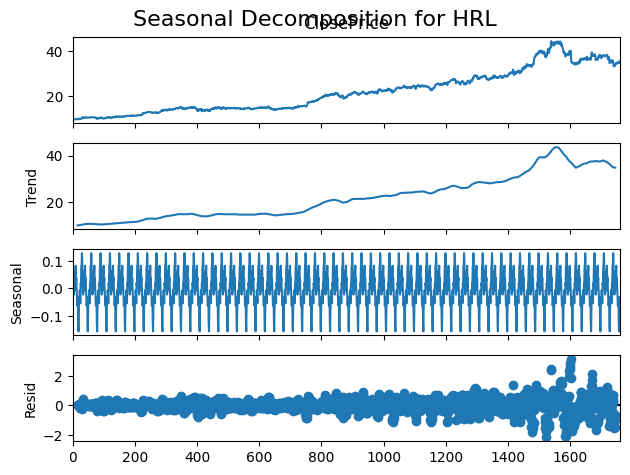

<Figure size 2500x1600 with 0 Axes>

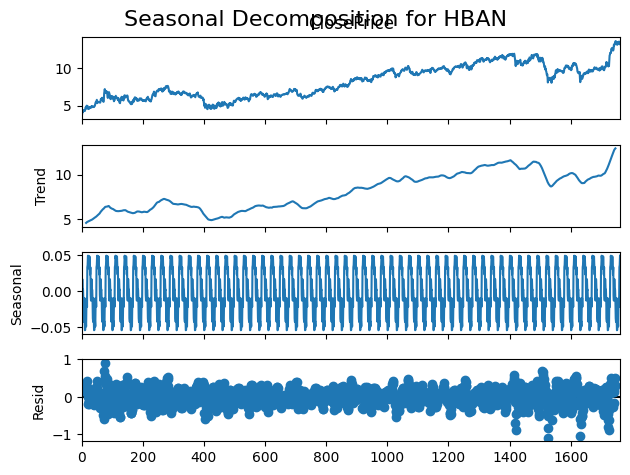

<Figure size 2500x1600 with 0 Axes>

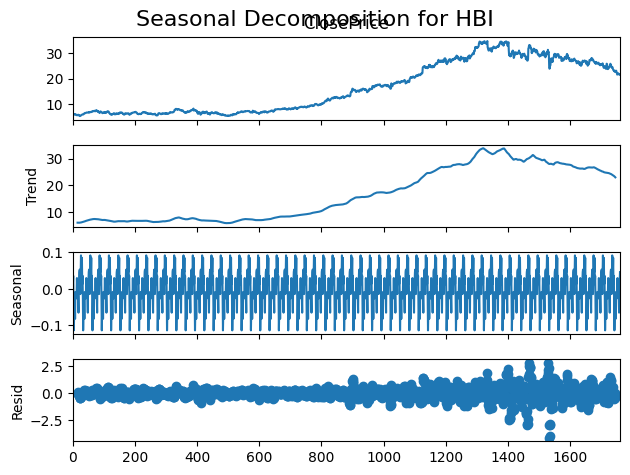

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Tách xu hướng và tính thời vụ cho từng mã cổ phiếu
def decompose_timeseries(timeseries, ticker):
    result = seasonal_decompose(timeseries.dropna(), model='additive', period=30)
    fig = plt.figure(figsize=(25, 16))
    result.plot()
    plt.suptitle(f'Seasonal Decomposition for {ticker}', fontsize=16)
    plt.show()

# Lặp qua từng ticker và thực hiện phân tách xu hướng và tính thời vụ
for ticker, df in ticker_data.items():
    decompose_timeseries(df['ClosePrice'], ticker)


In [23]:
import numpy as np
from statsmodels.tsa.stattools import adfuller

# Hàm tính lợi suất và kiểm tra tính dừng
def test_stationarity_returns(timeseries, ticker):
    # Tính lợi suất (returns)
    returns = np.log(timeseries / timeseries.shift(1))
    returns.dropna(inplace=True)

    # Kiểm tra Dickey-Fuller
    print(f"Results of Dickey-Fuller Test for {ticker} Returns:")
    adft = adfuller(returns, autolag='AIC')

    output = pd.Series(adft[0:4], index=['Test Statistics', 'p-value', 'No. of lags used', 'Number of observations used'])
    for key, values in adft[4].items():
        output[f'critical value ({key})'] = values
    print(output)

# Lặp qua từng ticker và thực hiện kiểm tra tính dừng cho chuỗi lợi suất
for ticker, df in ticker_data.items():
    test_stationarity_returns(df['ClosePrice'], ticker)


Results of Dickey-Fuller Test for HRL Returns:
Test Statistics                 -31.339626
p-value                           0.000000
No. of lags used                  1.000000
Number of observations used    1759.000000
critical value (1%)              -3.434073
critical value (5%)              -2.863185
critical value (10%)             -2.567645
dtype: float64
Results of Dickey-Fuller Test for HBAN Returns:
Test Statistics               -8.710535e+00
p-value                        3.601328e-14
No. of lags used               2.500000e+01
Number of observations used    1.735000e+03
critical value (1%)           -3.434125e+00
critical value (5%)           -2.863207e+00
critical value (10%)          -2.567658e+00
dtype: float64
Results of Dickey-Fuller Test for HBI Returns:
Test Statistics                 -19.264359
p-value                           0.000000
No. of lags used                  5.000000
Number of observations used    1755.000000
critical value (1%)              -3.434082
crit

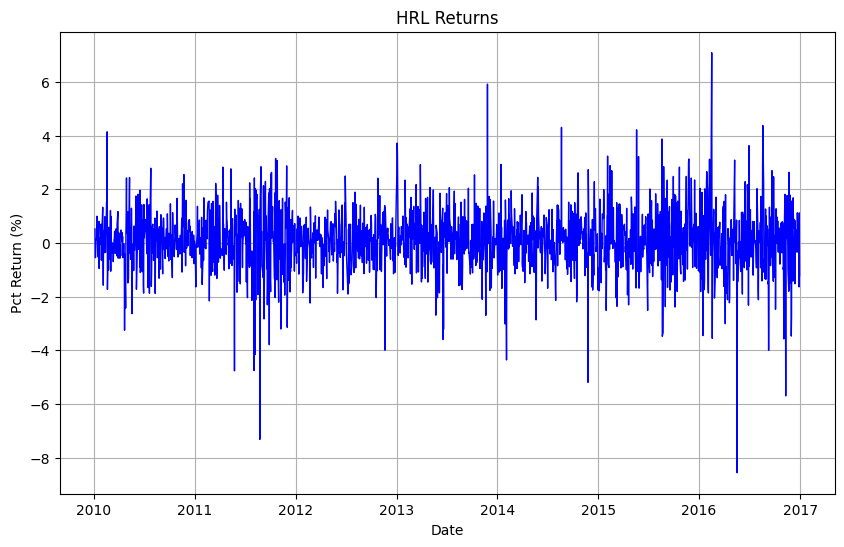

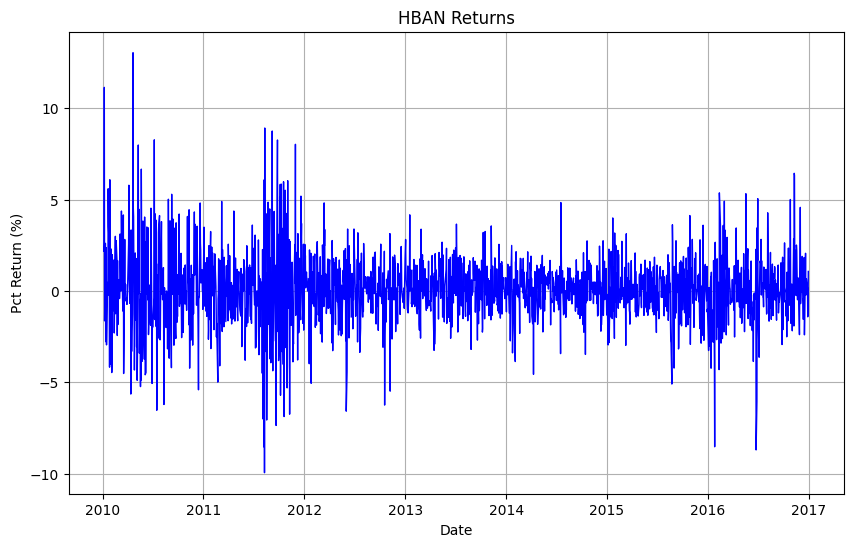

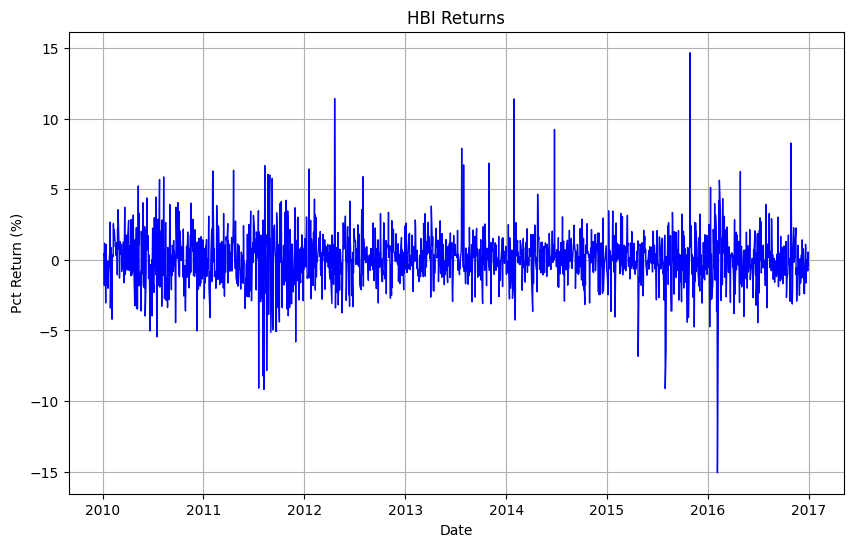

In [24]:
import matplotlib.pyplot as plt

# Hàm tính tỷ suất lợi nhuận và vẽ biểu đồ
def plot_returns(timeseries, ticker):
    # Tính toán tỷ suất lợi nhuận (%)
    timeseries['Return'] = timeseries['ClosePrice'].pct_change() * 100

    # Vẽ biểu đồ tỷ suất lợi nhuận
    plt.figure(figsize=(10, 6))
    plt.grid(True)
    plt.xlabel('Date')
    plt.ylabel('Pct Return (%)')
    plt.plot(timeseries['Date'], timeseries['Return'], linewidth=1, color='blue')
    plt.title(f'{ticker} Returns')
    plt.show()

# Lặp qua từng ticker và vẽ biểu đồ tỷ suất lợi nhuận
for ticker, df in ticker_data.items():
    # Đảm bảo cột Date là kiểu datetime
    df['Date'] = pd.to_datetime(df['Date'])
    plot_returns(df, ticker)


**Chỉ báo MA, RSI, Bolling Band**

In [25]:
for ticker, df in ticker_data.items():
    print(f"Columns in {ticker}: {df.columns}")


Columns in HRL: Index(['Date', 'Ticker', 'OpenPrice', 'ClosePrice', 'LowPrice', 'HighPrice',
       'Volume', 'Return'],
      dtype='object')
Columns in HBAN: Index(['Date', 'Ticker', 'OpenPrice', 'ClosePrice', 'LowPrice', 'HighPrice',
       'Volume', 'Return'],
      dtype='object')
Columns in HBI: Index(['Date', 'Ticker', 'OpenPrice', 'ClosePrice', 'LowPrice', 'HighPrice',
       'Volume', 'Return'],
      dtype='object')


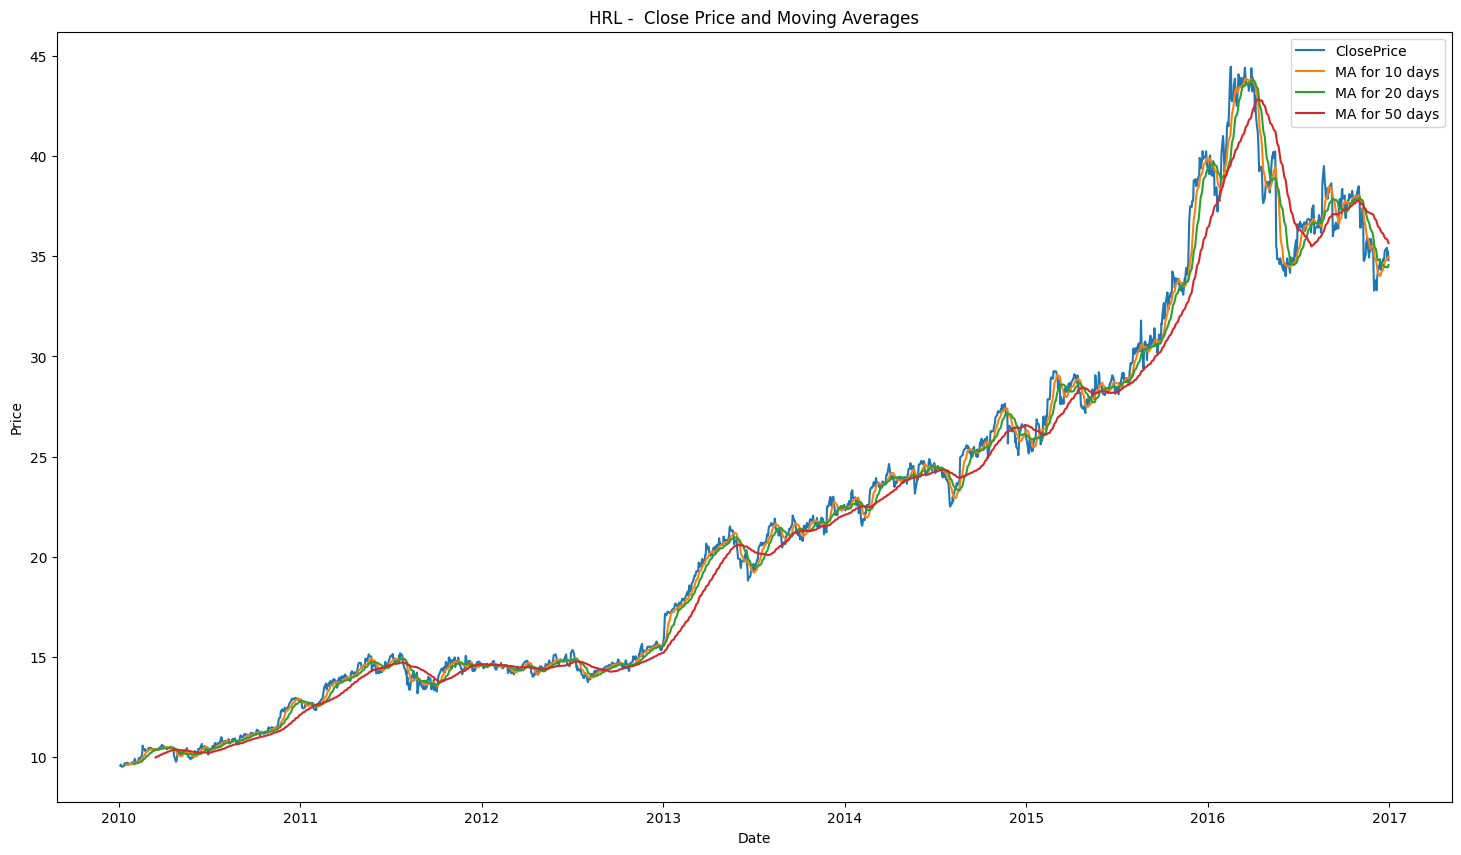

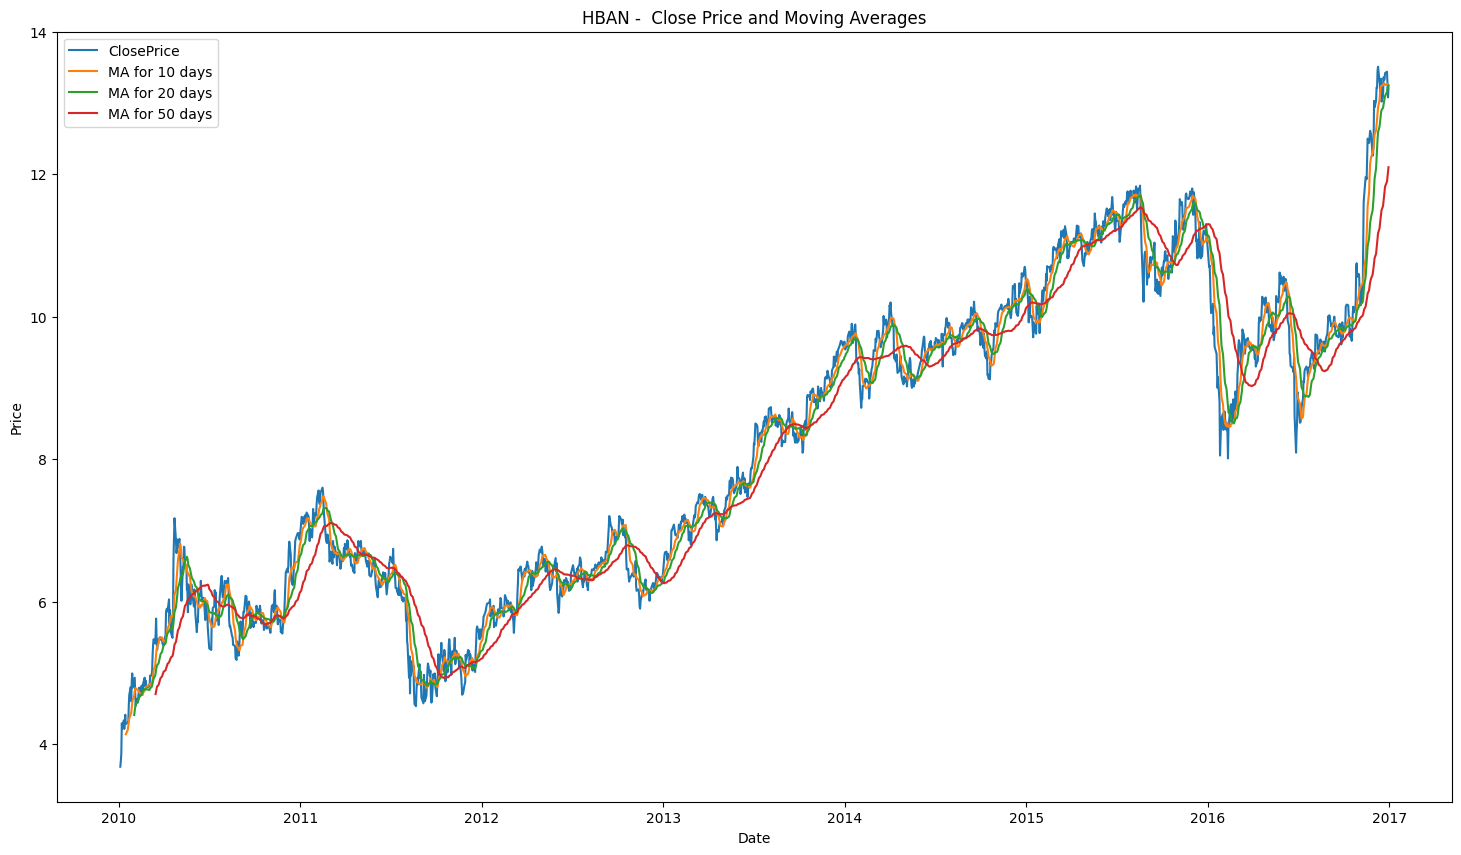

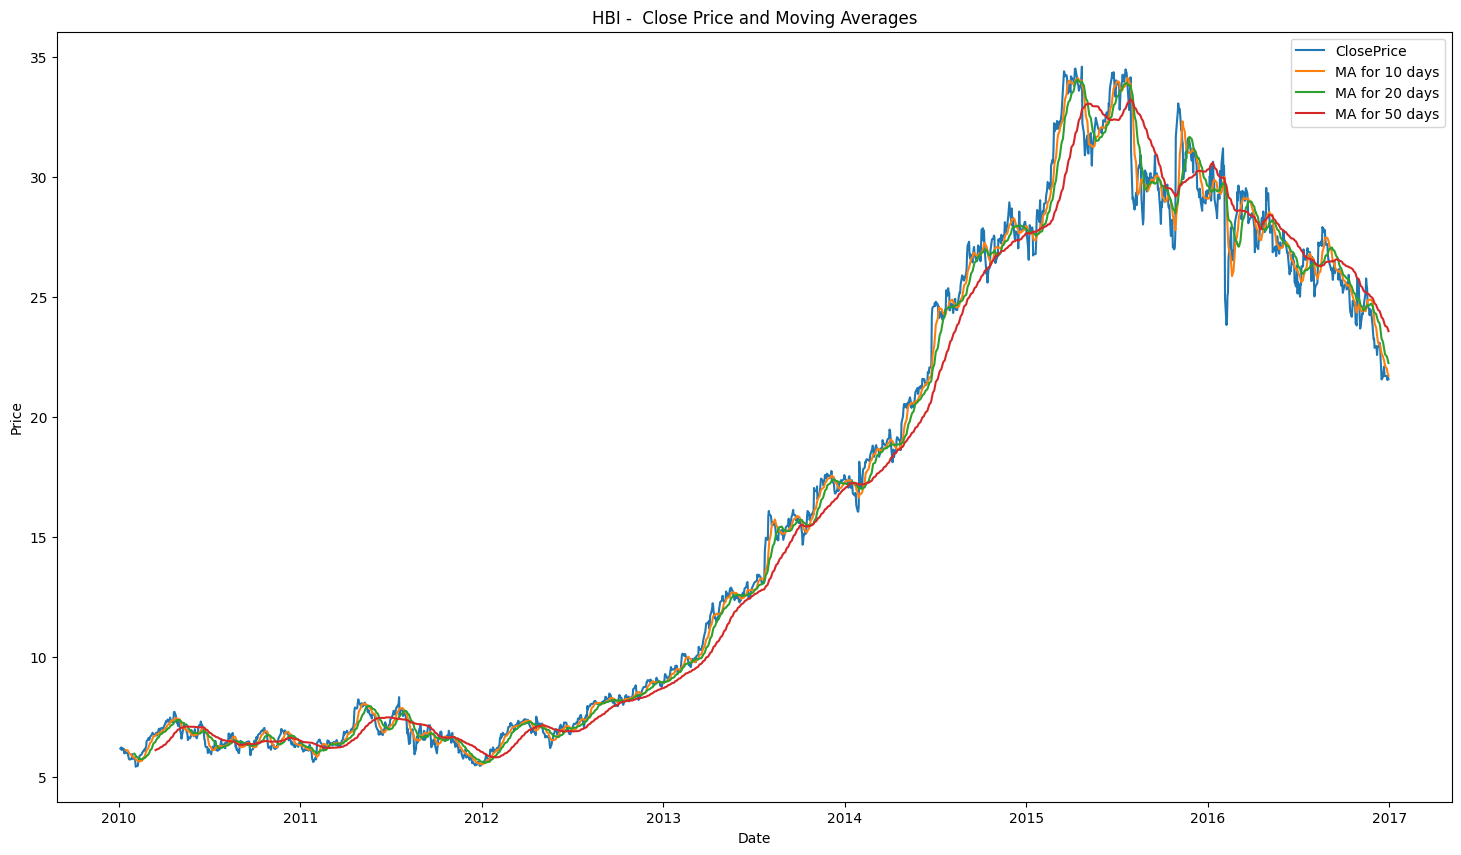

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Danh sách số ngày để tính MA (Moving Averages)
ma_day = [10, 20, 50]

# Giả sử ticker_data chứa dữ liệu cho 5 cổ phiếu
# ticker_data = {'HRL': df_HRL, 'NI': df_NI, 'HBAN': df_HBAN, 'HBI': df_HBI, 'ZION': df_ZION}

# Tính toán MA cho từng mã cổ phiếu trong ticker_data
for ticker, df in ticker_data.items():
    for ma in ma_day:
        column_name = f"MA for {ma} days"
        df[column_name] = df['ClosePrice'].rolling(ma).mean()

# Hàm vẽ biểu đồ tỷ suất lợi nhuận và đường MA
def plot_returns(df, ticker):
    plt.figure(figsize=(18, 10))
    plt.plot(df['Date'], df['ClosePrice'], label='ClosePrice')
    plt.plot(df['Date'], df[f'MA for 10 days'], label='MA for 10 days')
    plt.plot(df['Date'], df[f'MA for 20 days'], label='MA for 20 days')
    plt.plot(df['Date'], df[f'MA for 50 days'], label='MA for 50 days')
    plt.title(f'{ticker} -  Close Price and Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Lặp qua từng ticker và vẽ biểu đồ tỷ suất lợi nhuận
for ticker, df in ticker_data.items():
    # Đảm bảo cột Date là kiểu datetime
    df['Date'] = pd.to_datetime(df['Date'])
    plot_returns(df, ticker)


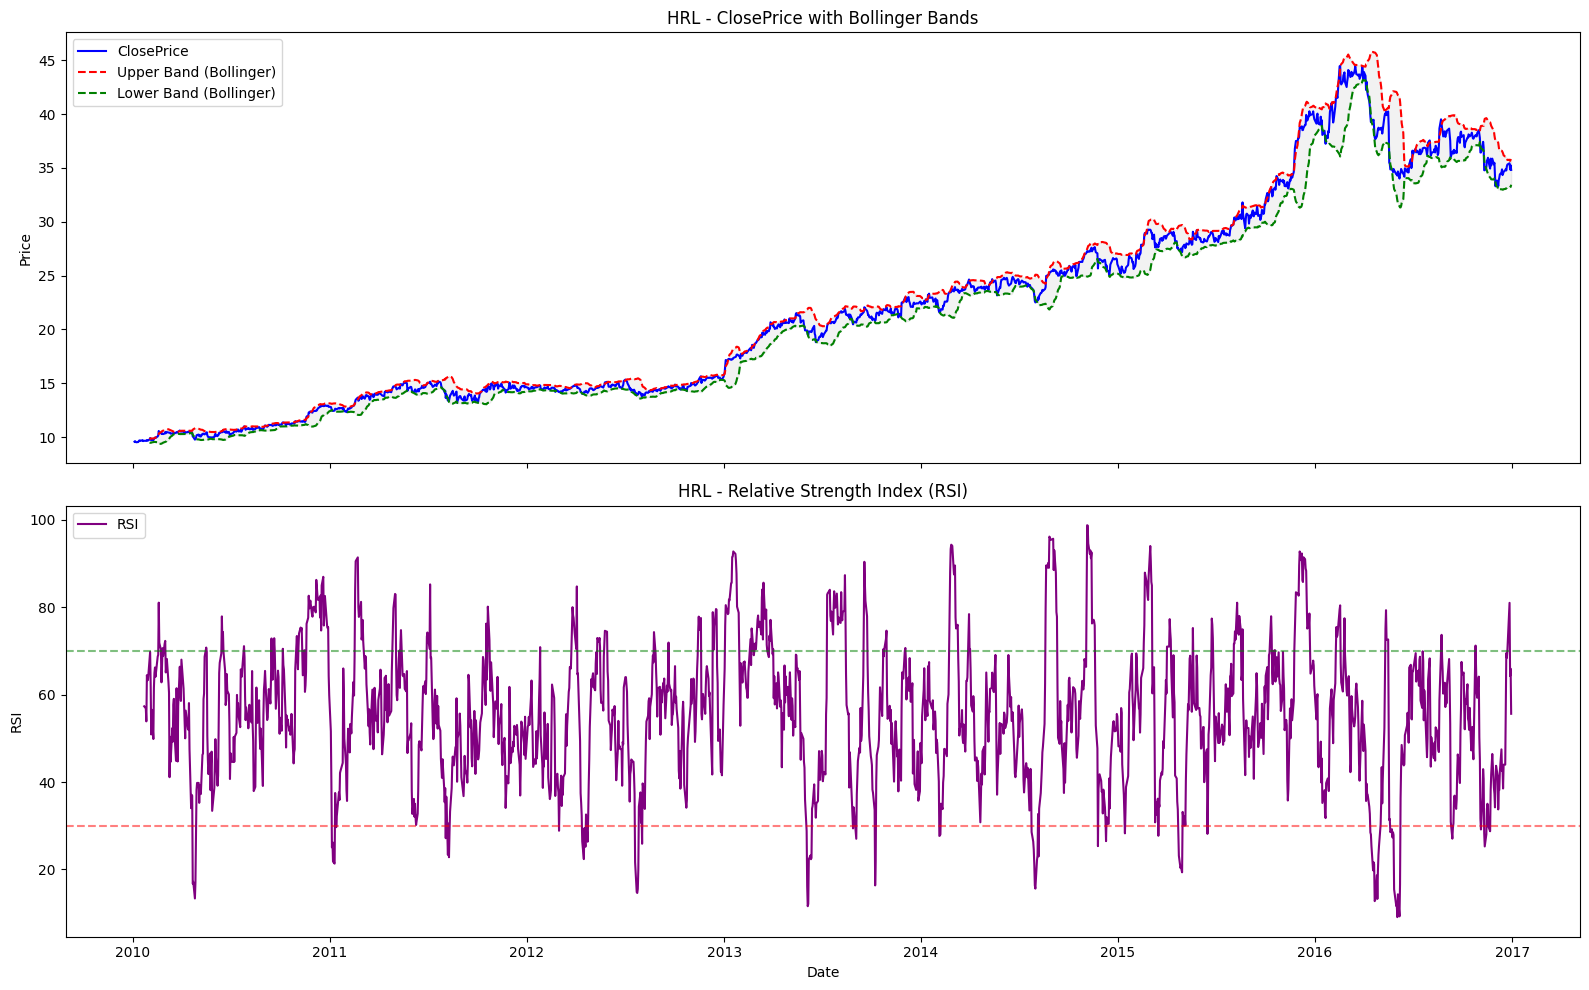

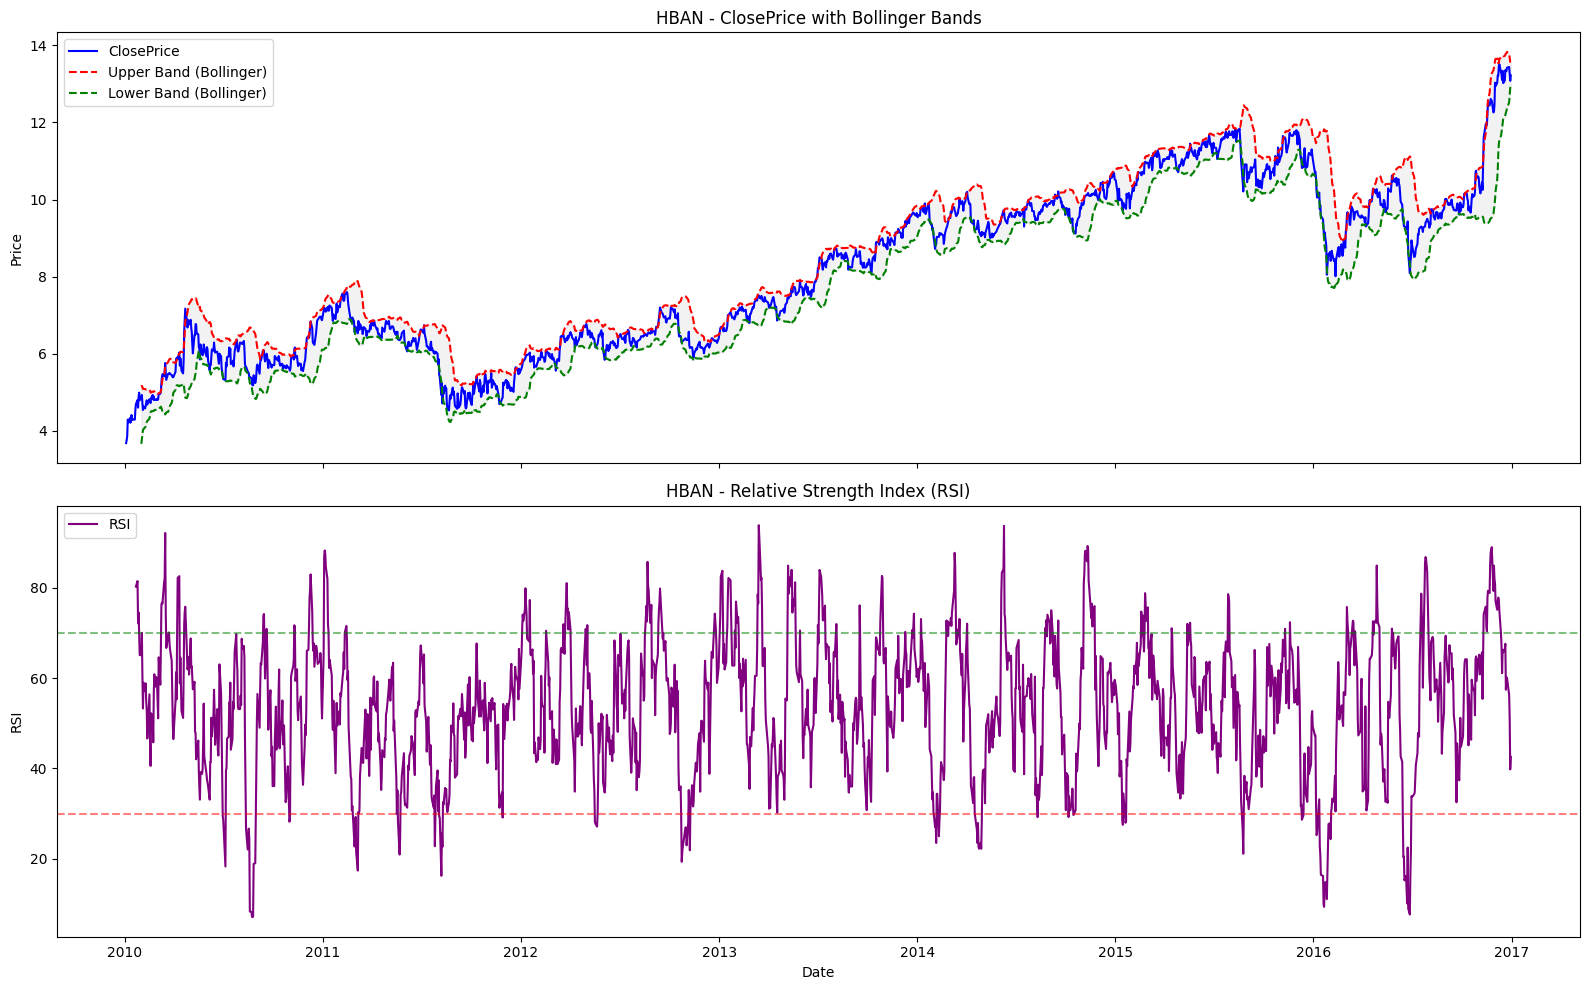

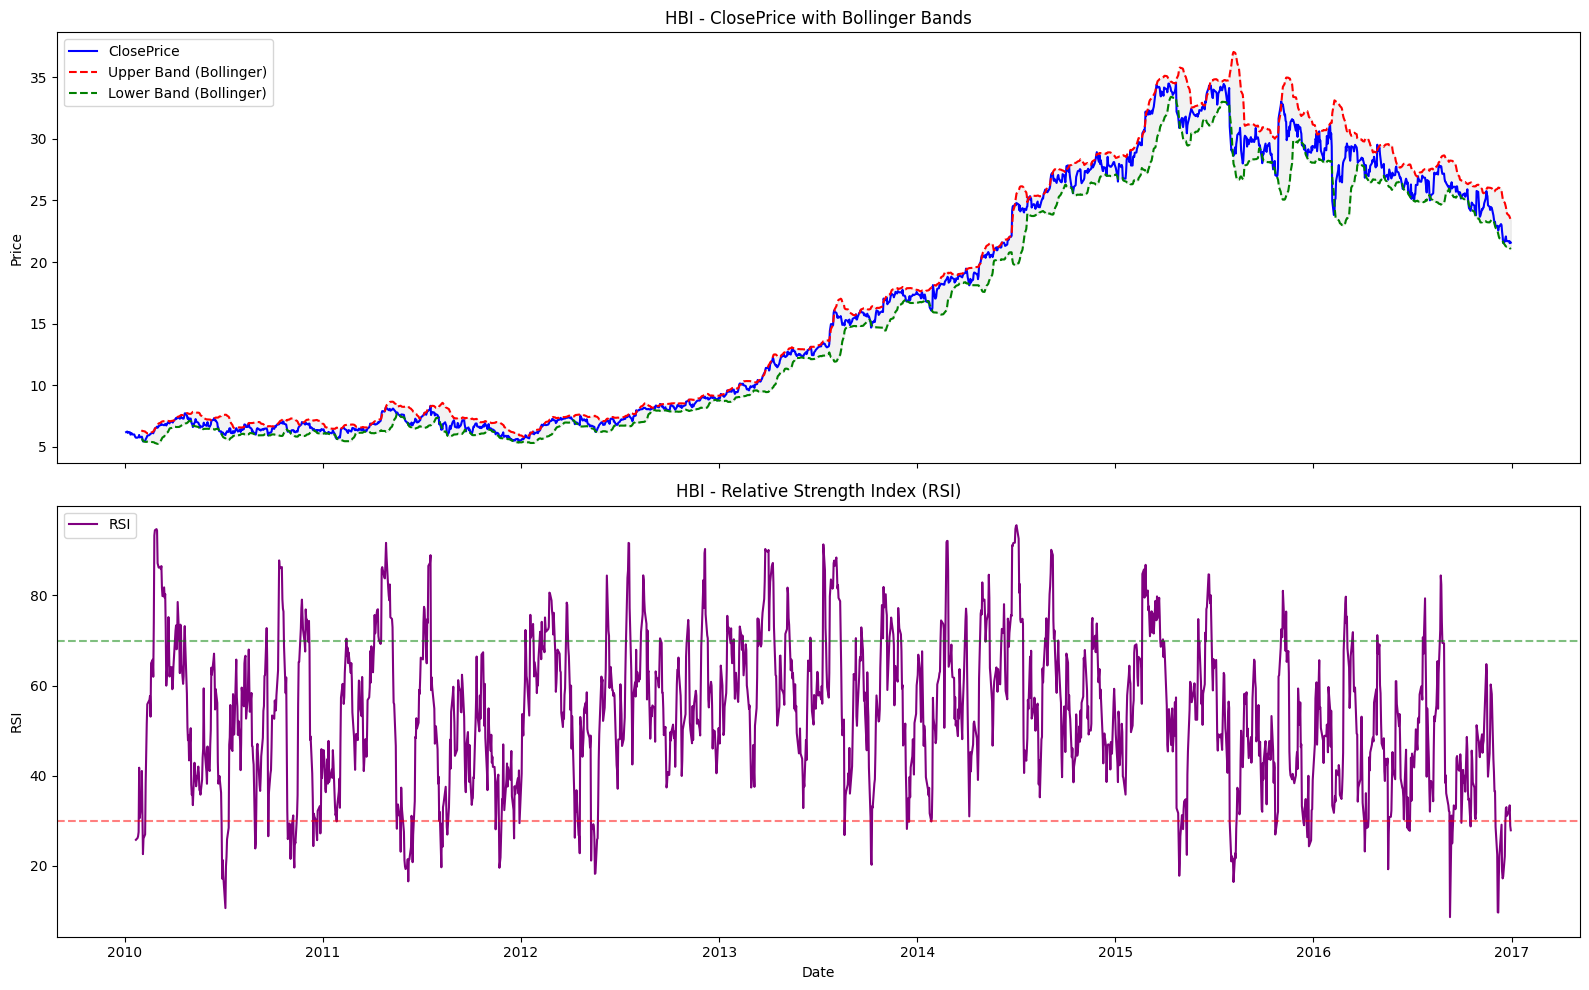

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Hàm tính toán RSI
def calculate_rsi(data, window=14):
    delta = data['ClosePrice'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

# Hàm tính Bollinger Bands
def calculate_bollinger_bands(data, window=20):
    sma = data['ClosePrice'].rolling(window=window).mean()
    std = data['ClosePrice'].rolling(window=window).std()

    upper_band = sma + (2 * std)
    lower_band = sma - (2 * std)

    return upper_band, lower_band

# Hàm vẽ Bollinger Bands và RSI trên hai biểu đồ riêng biệt
def plot_bollinger_rsi(df, ticker):
    # Tính RSI
    df['RSI'] = calculate_rsi(df, window=14)

    # Tính Bollinger Bands
    df['Upper Band'], df['Lower Band'] = calculate_bollinger_bands(df, window=20)

    # Tính MA cho Bollinger Bands (trung bình động 20 ngày)
    df['MA for 20 days'] = df['ClosePrice'].rolling(window=20).mean()

    # Vẽ biểu đồ với hai trục riêng biệt cho Bollinger Bands và RSI
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10), sharex=True)

    # Biểu đồ 1: ClosePrice và Bollinger Bands
    ax1.plot(df['Date'], df['ClosePrice'], label='ClosePrice', color='blue')
    ax1.plot(df['Date'], df['Upper Band'], label='Upper Band (Bollinger)', color='red', linestyle='--')
    ax1.plot(df['Date'], df['Lower Band'], label='Lower Band (Bollinger)', color='green', linestyle='--')
    ax1.fill_between(df['Date'], df['Lower Band'], df['Upper Band'], color='grey', alpha=0.1)
    ax1.set_title(f'{ticker} - ClosePrice with Bollinger Bands')
    ax1.set_ylabel('Price')
    ax1.legend(loc='upper left')

    # Biểu đồ 2: RSI
    ax2.plot(df['Date'], df['RSI'], label='RSI', color='purple')
    ax2.axhline(30, linestyle='--', alpha=0.5, color='red')  # Ngưỡng quá bán
    ax2.axhline(70, linestyle='--', alpha=0.5, color='green')  # Ngưỡng quá mua
    ax2.set_title(f'{ticker} - Relative Strength Index (RSI)')
    ax2.set_xlabel('Date')
    ax2.set_ylabel('RSI')
    ax2.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

# Danh sách các ticker
tickers = ['HRL', 'NI', 'HBAN', 'HBI', 'ZION']

# Lặp qua từng ticker và vẽ biểu đồ
for ticker, df in ticker_data.items():
    # Đảm bảo cột Date là kiểu datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Tính toán Bollinger Bands và RSI, sau đó vẽ biểu đồ
    plot_bollinger_rsi(df, ticker)


#3.Xây dựng mô hình

## 3.1 Xây dựng mô hình Voting hồi quy

Best params: {'roc_period': 12, 'rsi_period': 30, 'macd_fast': 12, 'macd_slow': 26, 'macd_signal': 9}
Best R² Score: 0.8470756894470761


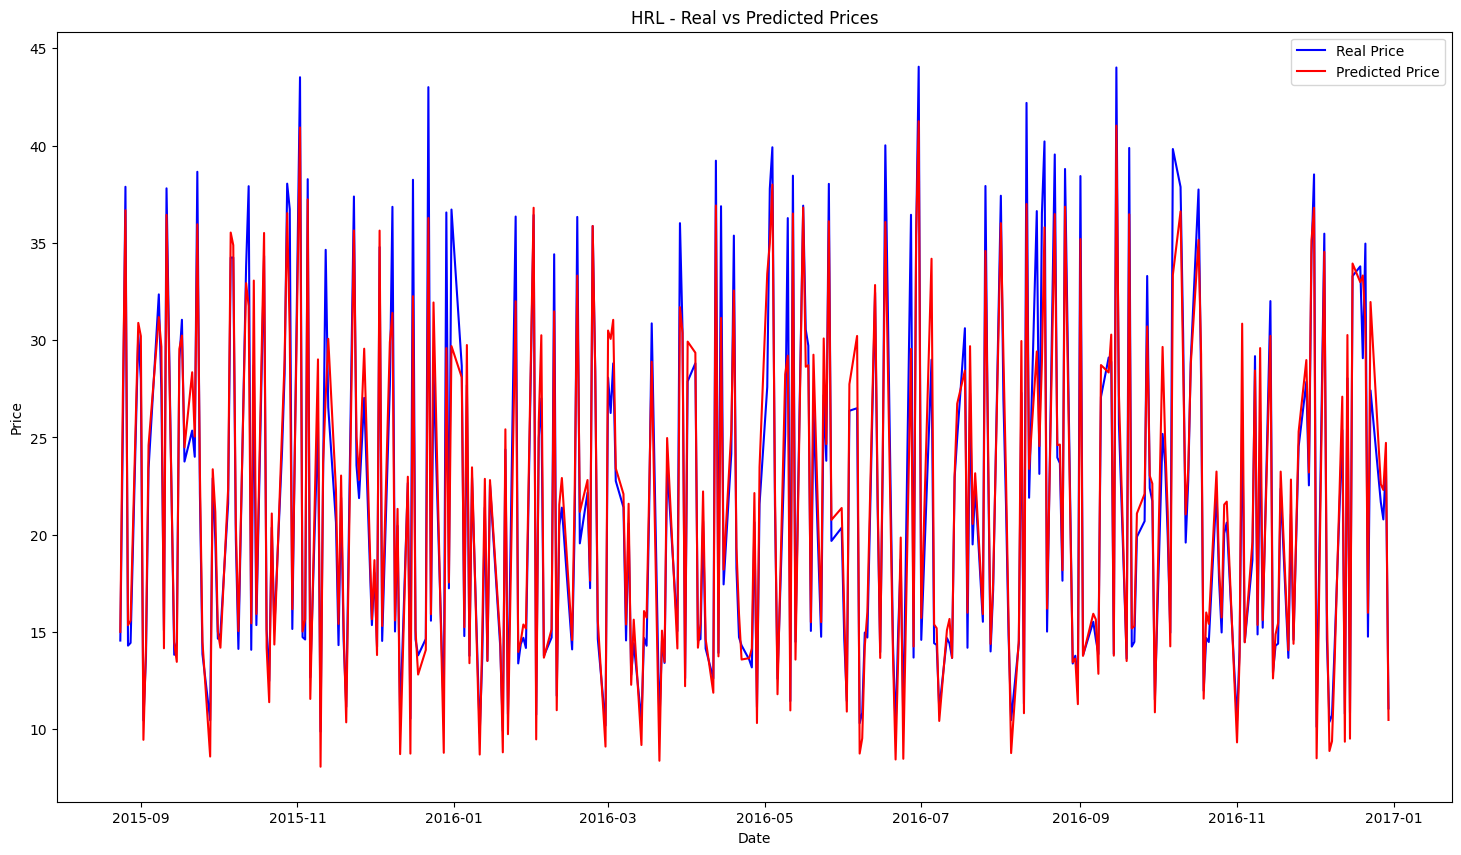

R²: 0.9464617132051285
MSE: 4.423580277468358
RMSE: 2.1032309139674505
MAE: 1.5059165981222322
MAPE: 6.64655962093407
SMAPE: 6.715342802595463
Overall Score: 0.9635086094775555
HRL - Overall Score: 0.9635086094775555
Best params: {'roc_period': 20, 'rsi_period': 10, 'macd_fast': 12, 'macd_slow': 26, 'macd_signal': 9}
Best R² Score: 0.4683059884259415


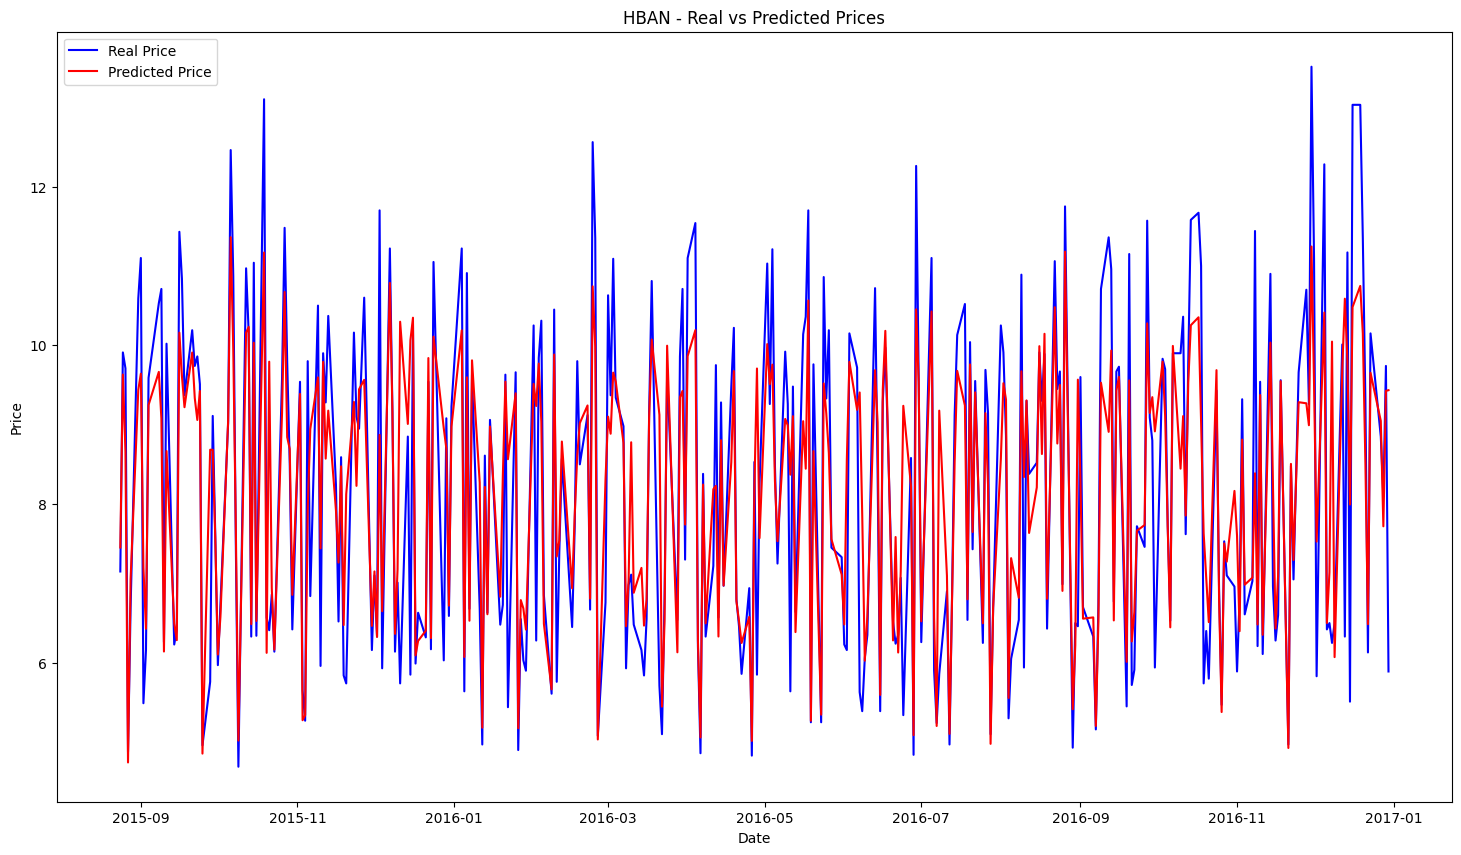

R²: 0.688224122825035
MSE: 1.3803776845636153
RMSE: 1.1748947546753348
MAE: 0.771716985871559
MAPE: 10.078880548018642
SMAPE: 9.297031718820374
Overall Score: 0.9116297525369644
HBAN - Overall Score: 0.9116297525369644
Best params: {'roc_period': 14, 'rsi_period': 10, 'macd_fast': 26, 'macd_slow': 50, 'macd_signal': 9}
Best R² Score: 0.8790337099514883


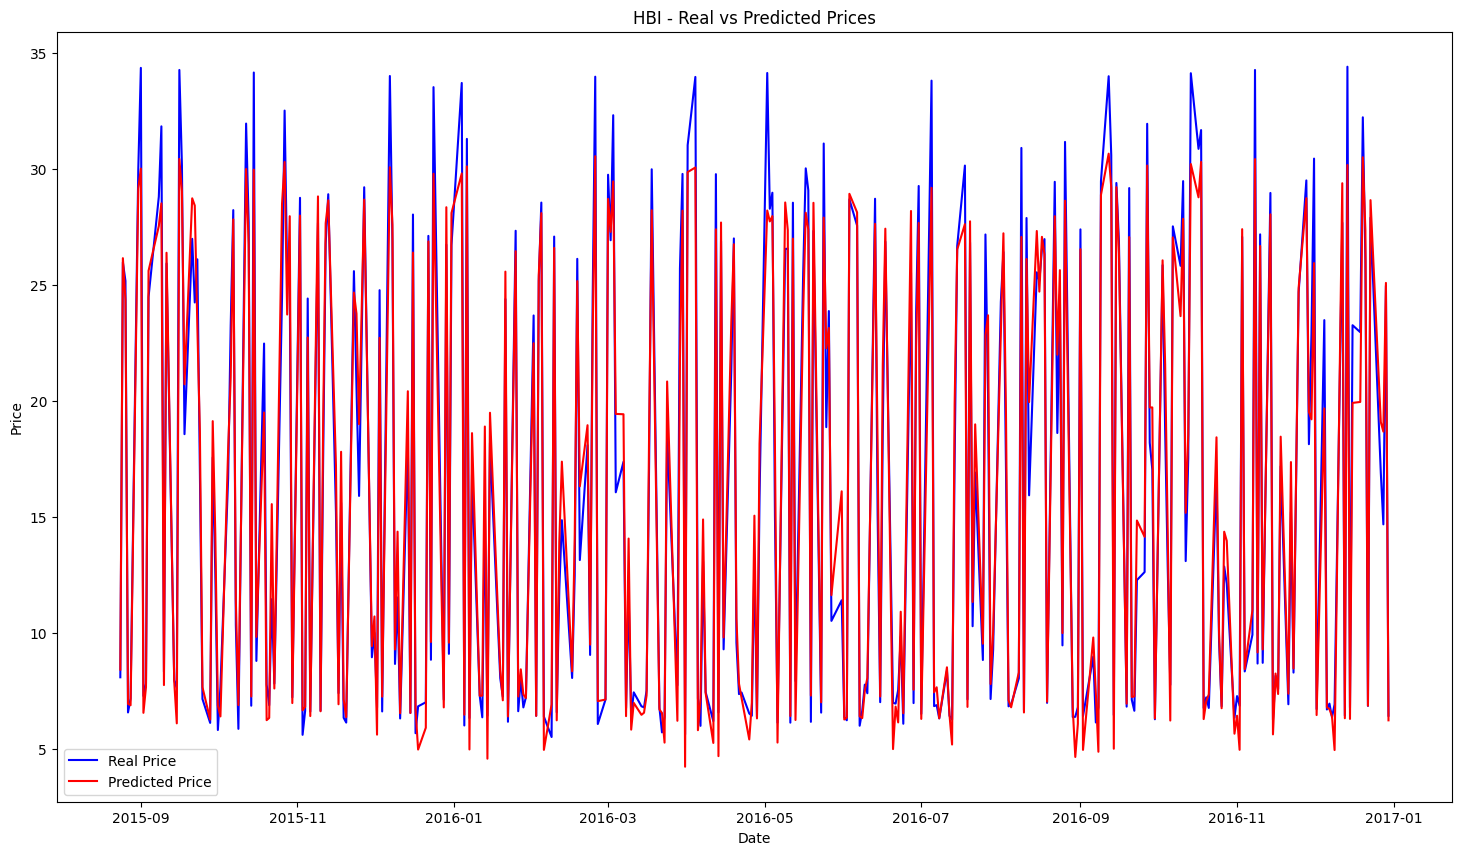

R²: 0.9678705149153394
MSE: 3.0803692038736115
RMSE: 1.7550980610420637
MAE: 1.3241128742962742
MAPE: 8.914891705254972
SMAPE: 8.937205446715984
Overall Score: 0.9650986527667083
HBI - Overall Score: 0.9650986527667083


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Hàm tính các chỉ báo kỹ thuật với tham số động
def calculate_indicators(df, roc_period=12, rsi_period=14, macd_fast=12, macd_slow=26, macd_signal=9):
    # ROC (Rate of Change)
    df['ROC'] = df['ClosePrice'].pct_change(periods=roc_period) * 100

    # Stochastic Oscillator (%K)
    df['Low 14'] = df['LowPrice'].rolling(14).min()
    df['High 14'] = df['HighPrice'].rolling(14).max()
    df['%K'] = (df['ClosePrice'] - df['Low 14']) * 100 / (df['High 14'] - df['Low 14'])

    # Williams %R
    df['%R'] = (df['High 14'] - df['ClosePrice']) * -100 / (df['High 14'] - df['Low 14'])

    # Commodity Channel Index (CCI)
    df['TP'] = (df['HighPrice'] + df['LowPrice'] + df['ClosePrice']) / 3
    df['CCI'] = (df['TP'] - df['TP'].rolling(20).mean()) / (0.015 * df['TP'].rolling(20).std())

    # RSI
    delta = df['ClosePrice'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=rsi_period).mean()
    avg_loss = loss.rolling(window=rsi_period).mean()
    rs = avg_gain / avg_loss
    df['RSI'] = 100 - (100 / (1 + rs))

    # MACD
    df['EMA12'] = df['ClosePrice'].ewm(span=macd_fast, adjust=False).mean()
    df['EMA26'] = df['ClosePrice'].ewm(span=macd_slow, adjust=False).mean()
    df['MACD'] = df['EMA12'] - df['EMA26']
    df['Signal Line'] = df['MACD'].ewm(span=macd_signal, adjust=False).mean()

    # OBV (On Balance Volume)
    df['Daily Change'] = df['ClosePrice'].diff(1)
    df['OBV'] = np.where(df['Daily Change'] > 0, df['Volume'],
                         np.where(df['Daily Change'] < 0, -df['Volume'], 0)).cumsum()

    # Loại bỏ các giá trị NaN
    df = df.dropna()

    return df

# Hàm tìm kiếm GridSearch cho các chỉ báo kỹ thuật
def grid_search_indicators(df):
    # Các tham số cần tối ưu hóa (giá trị phổ biến nhất)
    param_grid = {
        'roc_period': [10, 12, 14, 20, 25],  # Giá trị phổ biến cho khoảng thời gian tính ROC
        'rsi_period': [10, 14, 20, 25, 30],  # Giá trị phổ biến cho khoảng thời gian tính RSI
        'macd_fast': [12, 15, 18, 21, 26],  # Giá trị phổ biến cho khoảng thời gian tính MACD (fast)
        'macd_slow': [26, 30, 35, 40, 50],  # Giá trị phổ biến cho khoảng thời gian tính MACD (slow)
        'macd_signal': [9, 12, 14, 18, 21],  # Giá trị phổ biến cho khoảng thời gian tính MACD (signal)
        'stochastic_period': [10, 14, 20, 25, 30],  # Giá trị phổ biến cho Stochastic Oscillator
        'williams_r_period': [10, 14, 20, 25, 30],  # Giá trị phổ biến cho Williams %R
        'cci_period': [14, 20, 25, 30, 40]  # Giá trị phổ biến cho CCI
    }
    # Sử dụng GridSearch để tìm các tham số tốt nhất
    best_params = {}
    best_score = float('-inf')

    for roc in param_grid['roc_period']:
        for rsi in param_grid['rsi_period']:
            for macd_f in param_grid['macd_fast']:
                for macd_s in param_grid['macd_slow']:
                    for macd_sig in param_grid['macd_signal']:
                        # Tính toán chỉ báo với tham số hiện tại
                        df_with_indicators = calculate_indicators(df.copy(), roc_period=roc, rsi_period=rsi,
                                                                  macd_fast=macd_f, macd_slow=macd_s,
                                                                  macd_signal=macd_sig)

                        # Lấy dữ liệu và nhãn
                        features = ['ROC', '%K', '%R', 'CCI', 'RSI', 'MACD', 'OBV']
                        X = df_with_indicators[features]
                        y = df_with_indicators['ClosePrice']

                        # Chia dữ liệu thành train và test
                        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

                        # Huấn luyện mô hình LinearRegression để đánh giá
                        model = LinearRegression()
                        model.fit(X_train, y_train)
                        score = model.score(X_test, y_test)

                        # Cập nhật các tham số tốt nhất
                        if score > best_score:
                            best_score = score
                            best_params = {
                                'roc_period': roc,
                                'rsi_period': rsi,
                                'macd_fast': macd_f,
                                'macd_slow': macd_s,
                                'macd_signal': macd_sig
                            }

    print(f"Best params: {best_params}")
    print(f"Best R² Score: {best_score}")

    return best_params

# Hàm huấn luyện Voting Regressor
def train_voting_regressor(X_train, y_train):
    regressor = VotingRegressor([
        ('rf', RandomForestRegressor(n_estimators=100)),
        ('lr', LinearRegression()),
        ('knn', KNeighborsRegressor(n_neighbors=5))
    ])
    regressor.fit(X_train, y_train)
    return regressor

# Hàm trực quan hóa dự đoán và thực tế
def plot_predictions(df, ticker, y_true, y_pred):
    plt.figure(figsize=(18, 10))
    plt.plot(df['Date'], y_true, label='Real Price', color='blue')
    plt.plot(df['Date'], y_pred, label='Predicted Price', color='red')
    plt.title(f'{ticker} - Real vs Predicted Prices')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Hàm đánh giá mô hình
def evaluate_model(y_true, y_pred):
    # Tính toán các chỉ số
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    smape = 100 * np.mean(2 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred)))

    # Gán trọng số cho các chỉ số
    weight_r2 = 0.2
    weight_rmse = 0.3
    weight_mae = 0.2
    weight_mse = 0.1
    weight_mape = 0.1
    weight_smape = 0.1

    # Chuẩn hóa các chỉ số (giả định max tương ứng, cần điều chỉnh nếu cần)
    max_rmse = 100  # Điều chỉnh giá trị này tùy thuộc vào dữ liệu
    max_mae = 50    # Điều chỉnh giá trị này tùy thuộc vào dữ liệu
    max_mse = 5000  # Điều chỉnh giá trị này tùy thuộc vào dữ liệu
    max_mape = 100  # MAPE thường tính bằng phần trăm
    max_smape = 100 # SMAPE cũng tính bằng phần trăm

    # Chuẩn hóa các chỉ số về thang đo từ 0 đến 1 (1 là tốt nhất)
    r2_normalized = r2  # R² đã nằm trong khoảng [0, 1]
    rmse_normalized = 1 - (rmse / max_rmse)
    mae_normalized = 1 - (mae / max_mae)
    mse_normalized = 1 - (mse / max_mse)
    mape_normalized = 1 - (mape / max_mape)
    smape_normalized = 1 - (smape / max_smape)

    # Tính chỉ số tổng hợp
    overall_score = (weight_r2 * r2_normalized) + \
                    (weight_rmse * rmse_normalized) + \
                    (weight_mae * mae_normalized) + \
                    (weight_mse * mse_normalized) + \
                    (weight_mape * mape_normalized) + \
                    (weight_smape * smape_normalized)

    # In ra các chỉ số
    print(f'R²: {r2}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')
    print(f'MAPE: {mape}')
    print(f'SMAPE: {smape}')
    print(f'Overall Score: {overall_score}')

    return overall_score


# Danh sách các ticker
tickers = ['HRL', 'NI', 'HBAN', 'HBI', 'ZION']

# Lặp qua từng ticker và thực hiện các bước
for ticker, df in ticker_data.items():
    # Đảm bảo cột Date là kiểu datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Tìm tham số tốt nhất cho chỉ báo kỹ thuật bằng GridSearch
    best_params = grid_search_indicators(df)

    # Tính toán các chỉ báo kỹ thuật với tham số tối ưu
    df = calculate_indicators(df, **best_params)

    # Chuẩn bị dữ liệu
    features = ['ROC', '%K', '%R', 'CCI', 'RSI', 'MACD', 'OBV']
    X = df[features]
    y = df['ClosePrice']

    # Chia tập dữ liệu thành train và test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Huấn luyện mô hình Voting Regressor
    model = train_voting_regressor(X_train, y_train)

    # Dự đoán giá
    y_pred = model.predict(X_test)

    # Trực quan hóa kết quả
    plot_predictions(df[len(X_train):], ticker, y_test, y_pred)

    # Đánh giá mô hình và tính chỉ số tổng hợp
    overall_score = evaluate_model(y_test, y_pred)
    print(f'{ticker} - Overall Score: {overall_score}')



| Ticker | Best params                                              | R²        | MSE        | RMSE      | MAE       | MAPE      | SMAPE     | Overall Score |
|--------|-----------------------------------------------------------|-----------|------------|-----------|-----------|-----------|-----------|---------------|
| HRL    | {'roc_period': 12, 'rsi_period': 30, 'macd_fast': 12, 'macd_slow': 26, 'macd_signal': 9} | 0.946462  | 4.423544   | 2.103222  | 1.505267  | 6.644377  | 6.713307  | 0.963516      |
| HBAN   | {'roc_period': 20, 'rsi_period': 10, 'macd_fast': 12, 'macd_slow': 26, 'macd_signal': 9} | 0.689485  | 1.374797   | 1.172517  | 0.769363  | 10.051904 | 9.271435  | 0.911951      |
| HBI    | {'roc_period': 14, 'rsi_period': 10, 'macd_fast': 26, 'macd_slow': 50, 'macd_signal': 9} | 0.967750  | 3.091938   | 1.758391  | 1.323582  | 8.906190  | 8.931538  | 0.965081      |


## 3.2 Xây dựng mô hình Arima

**Chia dữ liệu**

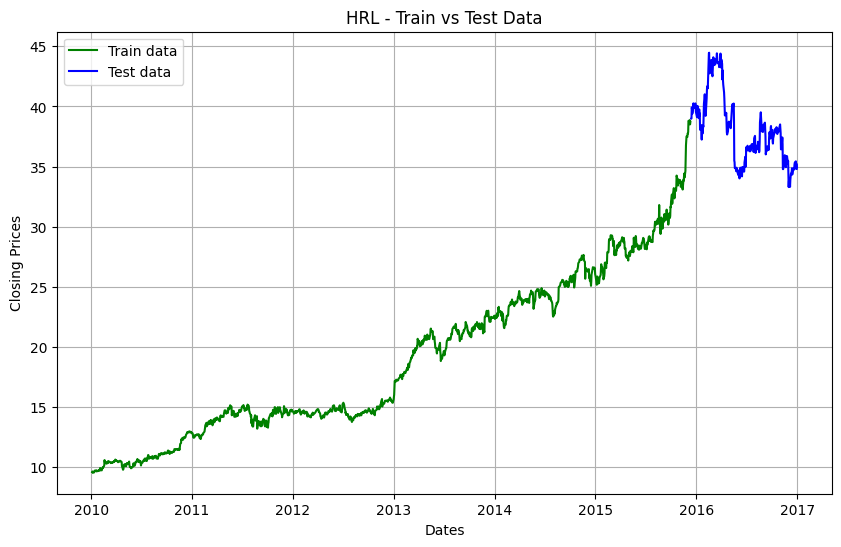

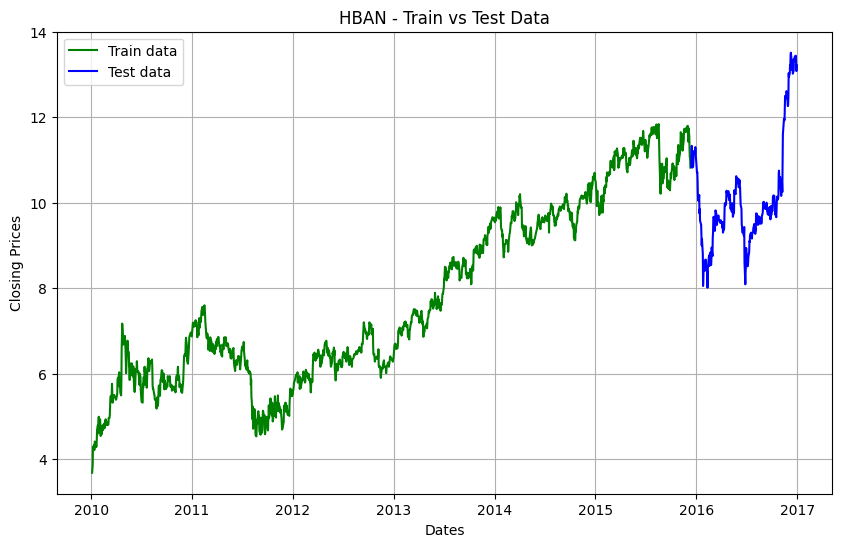

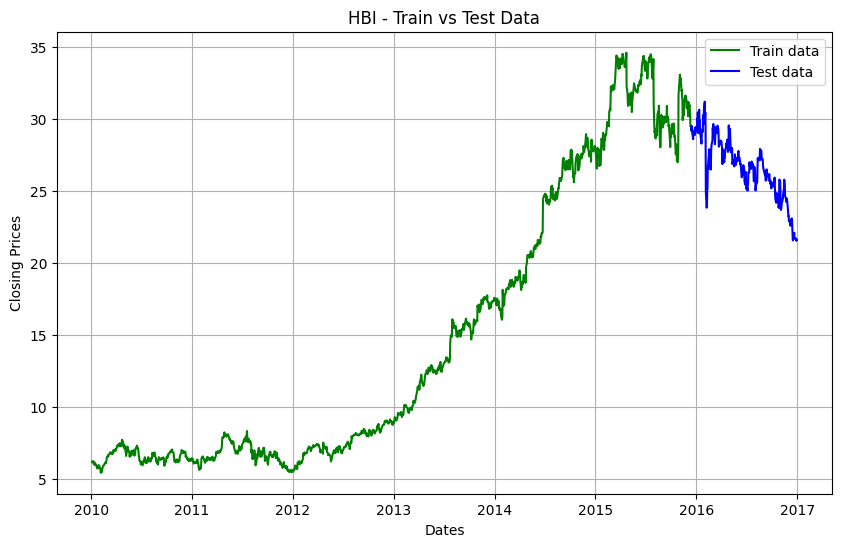

In [ ]:
import matplotlib.pyplot as plt

# Hàm chia dữ liệu và vẽ biểu đồ
def split_and_plot(timeseries, ticker, train_percent=0.85):
    # Chia dữ liệu thành tập huấn luyện và kiểm tra
    train_data, test_data = timeseries[:int(len(timeseries) * train_percent)], timeseries[int(len(timeseries) * train_percent):]

    # Vẽ biểu đồ dữ liệu huấn luyện và kiểm tra
    plt.figure(figsize=(10, 6))
    plt.grid(True)
    plt.xlabel('Dates')
    plt.ylabel('Closing Prices')
    plt.plot(train_data['Date'], train_data['ClosePrice'], 'green', label='Train data')
    plt.plot(test_data['Date'], test_data['ClosePrice'], 'blue', label='Test data')
    plt.title(f'{ticker} - Train vs Test Data')
    plt.legend()
    plt.show()

# Lặp qua từng ticker và chia dữ liệu, vẽ biểu đồ
for ticker, df in ticker_data.items():
    # Đảm bảo cột Date là kiểu datetime
    df['Date'] = pd.to_datetime(df['Date'])
    split_and_plot(df, ticker)


In [ ]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.8 MB/s eta 0:00:00


**Triển khai mô hình Arima**

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-158.764, Time=1.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-157.143, Time=0.49 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-157.201, Time=1.31 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-149.987, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-156.991, Time=6.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 9.122 seconds
Model summary for HRL:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1497
Model:               SARIMAX(0, 1, 0)   Log Likelihood                  81.382
Date:                Sun, 08 Sep 2024   AIC                           -158.764
Time:                        04:19:07   BIC                           -148.143
Sample:                             0   HQIC                          -154.807
                               - 1497                

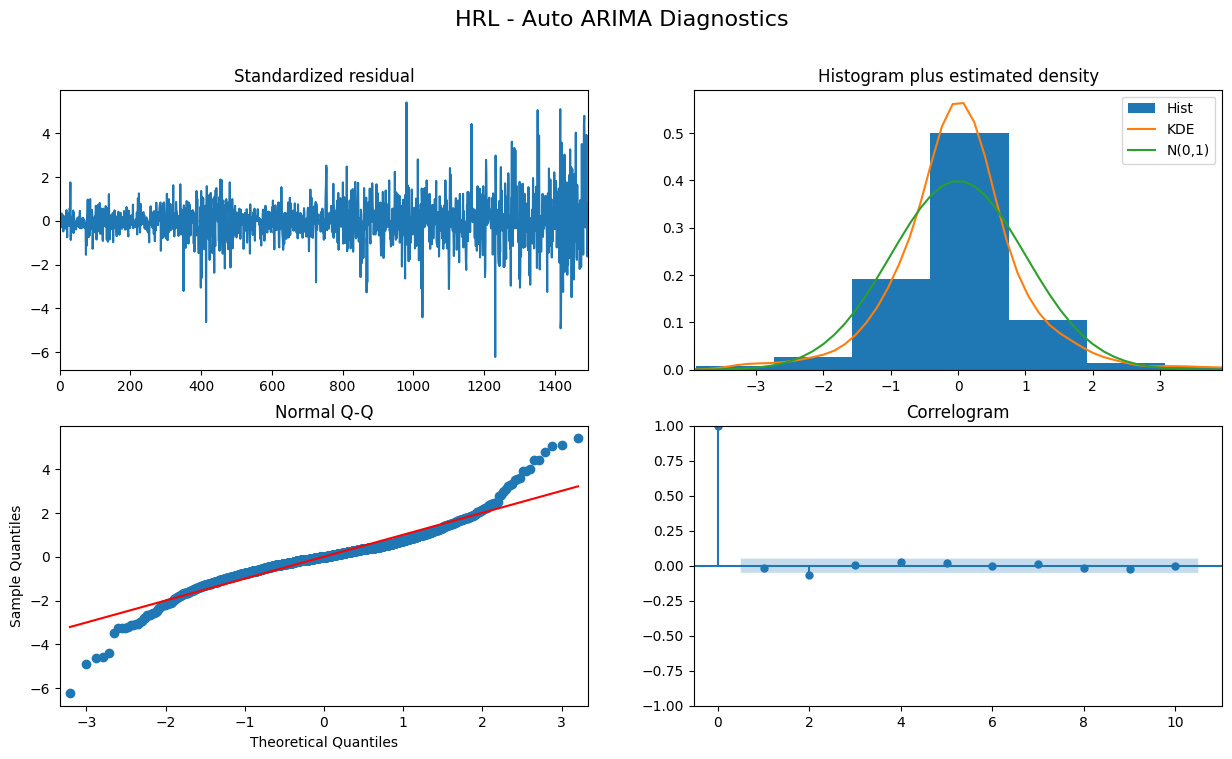

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1733.066, Time=0.46 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1736.927, Time=0.77 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1736.991, Time=2.51 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1733.209, Time=0.23 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1741.747, Time=7.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1732.985, Time=2.69 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1740.487, Time=9.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1735.044, Time=1.10 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1734.965, Time=1.08 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1743.022, Time=14.31 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-1741.177, Time=11.04 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-1740.903, Time=7.00 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-1740.112, Time=3.41 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-1740.364, Time=2.82 sec
 ARIMA(3,1,3)(0,0

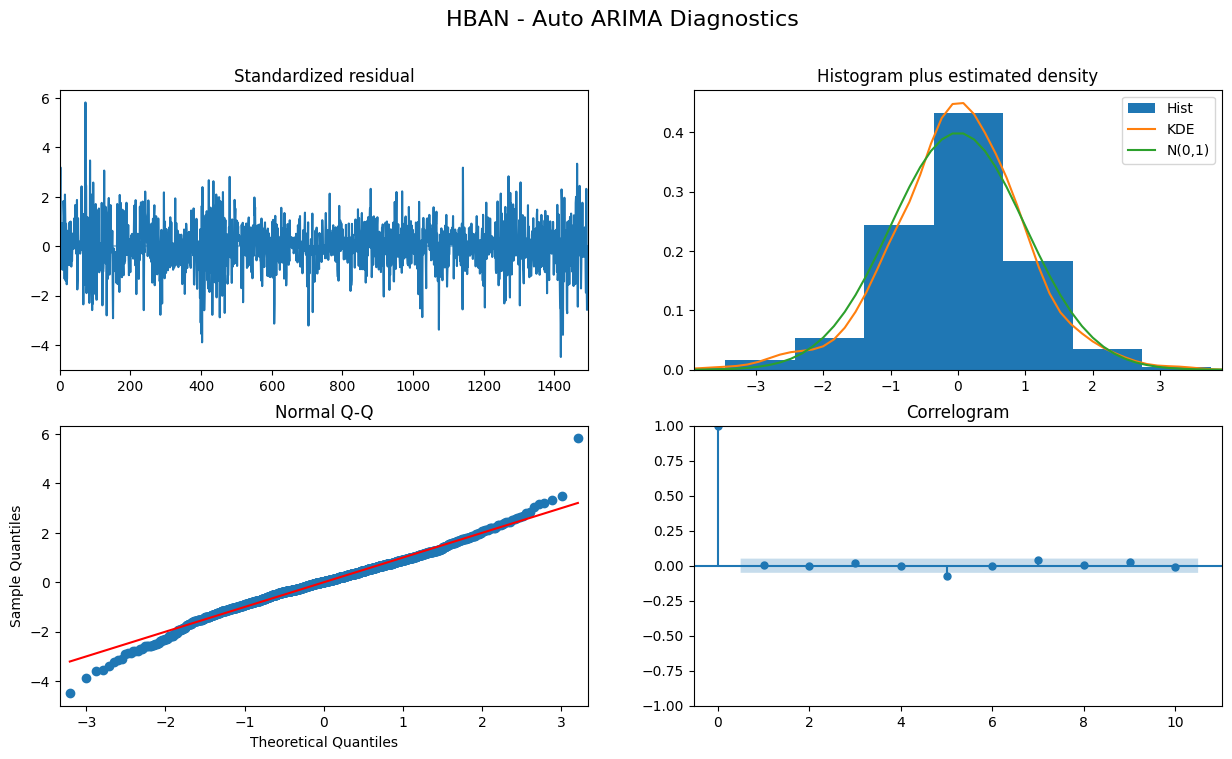

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=701.477, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=696.754, Time=0.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=696.492, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=703.368, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=698.345, Time=0.75 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=698.183, Time=0.78 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=690.786, Time=1.74 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=690.760, Time=2.74 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=689.951, Time=5.57 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=697.913, Time=0.26 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=691.016, Time=1.67 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=697.462, Time=0.34 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=692.418, Time=3.32 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=694.068, Time=0.54 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept


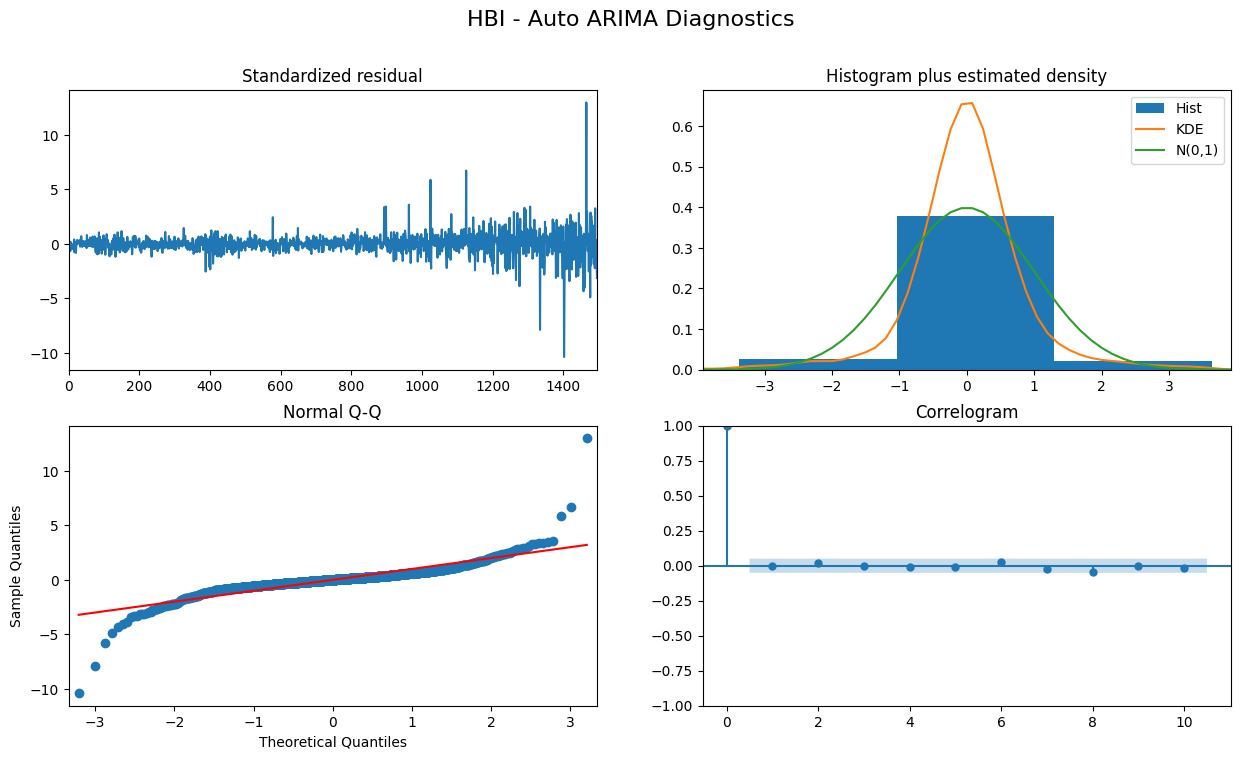

In [ ]:
from pmdarima import auto_arima
import matplotlib.pyplot as plt

# Hàm khởi tạo và huấn luyện mô hình Auto ARIMA
def train_auto_arima(train_data, ticker):
    # Khởi tạo mô hình Auto ARIMA
    model_autoARIMA = auto_arima(train_data['ClosePrice'],
                                 start_p=0, start_q=0,
                                 test='adf',        # sử dụng adftest để tìm 'd' tối ưu
                                 max_p=3, max_q=3,  # giá trị tối đa cho p và q
                                 m=1,               # tần suất của chuỗi dữ liệu
                                 d=None,            # để mô hình xác định 'd'
                                 seasonal=False,    # Không có tính thời vụ
                                 start_P=0, D=0,
                                 trace=True,
                                 error_action='ignore',
                                 suppress_warnings=True,
                                 stepwise=True)

    # Tóm tắt mô hình và tham số tối ưu
    print(f"Model summary for {ticker}:")
    print(model_autoARIMA.summary())

    # Lấy tham số tối ưu
    parameter = model_autoARIMA.get_params().get('order')
    print(f'Optimal order for {ticker} is: {parameter} \n')

    # Vẽ biểu đồ chuẩn đoán
    model_autoARIMA.plot_diagnostics(figsize=(15, 8))
    plt.suptitle(f'{ticker} - Auto ARIMA Diagnostics', fontsize=16)
    plt.show()

# Lặp qua từng ticker và khởi tạo mô hình Auto ARIMA
for ticker, df in ticker_data.items():
    # Chia dữ liệu thành tập huấn luyện (85%) và kiểm tra (15%)
    train_percent = 0.85
    train_data = df[:int(len(df) * train_percent)]

    # Huấn luyện mô hình Auto ARIMA cho tập dữ liệu huấn luyện
    train_auto_arima(train_data, ticker)


- Standardized residual: cho thấy sự thay đổi của sai số chuẩn hóa (standardized residuals) theo thời gian. Nếu sai số chuẩn hóa duy trì trong khoảng giá trị thấp gần 0 và không có xu hướng tăng hoặc giảm đột ngột, mô hình có thể được coi là tốt.
- Density plot: Biểu đồ mật độ cho thấy dữ liệu có phân phối chuẩn với giá trị trung bình bằng không.
- Normal Q-Q: cho phép đánh giá phân phối của các sai số (residuals) của mô hình. Nếu sai số có phân phối gần với phân phối chuẩn, biểu đồ sẽ trông như một đường chéo. Nếu có độ lệch khỏi đường chéo, điều này có thể chỉ ra rằng sai số không tuân theo phân phối chuẩn.
- Correlogram: giúp kiểm tra xem có sự tương quan còn tồn tại trong các sai số hay không. Nếu tất cả các giá trị nằm trong khoảng giới hạn cho phép (tức là nằm trong khoảng sai số không đáng kể), mô hình có thể được coi là có hiệu suất tốt.

ARIMA(0, 0, 0) AIC: 9955.049954621725
ARIMA(0, 0, 1) AIC: 7951.570291814383
ARIMA(0, 0, 2) AIC: 6259.140844832307
ARIMA(0, 0, 3) AIC: 4984.019823392584
ARIMA(1, 0, 0) AIC: -137.85290816501583
ARIMA(1, 0, 1) AIC: -135.97294832902816
ARIMA(1, 0, 2) AIC: -138.67593231666876
ARIMA(1, 0, 3) AIC: -136.9751615644355
ARIMA(2, 0, 0) AIC: -136.063324455577
ARIMA(2, 0, 1) AIC: -134.7874751163207
ARIMA(2, 0, 2) AIC: -133.14113717689503
ARIMA(2, 0, 3) AIC: -135.0797861191661
ARIMA(3, 0, 0) AIC: -139.0923926855562
ARIMA(3, 0, 1) AIC: -133.21321614417383
ARIMA(3, 0, 2) AIC: -134.9555311199556
ARIMA(3, 0, 3) AIC: -133.80450210343662
ARIMA(0, 1, 0) AIC: -149.9869607156911
ARIMA(0, 1, 1) AIC: -148.11453155216657
ARIMA(0, 1, 2) AIC: -150.8255806939335
ARIMA(0, 1, 3) AIC: -149.13197568029318
ARIMA(1, 1, 0) AIC: -148.0997009202511
ARIMA(1, 1, 1) AIC: -146.9651190765867
ARIMA(1, 1, 2) AIC: -148.96326868444748
ARIMA(1, 1, 3) AIC: -149.1087838420686
ARIMA(2, 1, 0) AIC: -151.18582305243154
ARIMA(2, 1, 1) AIC: 

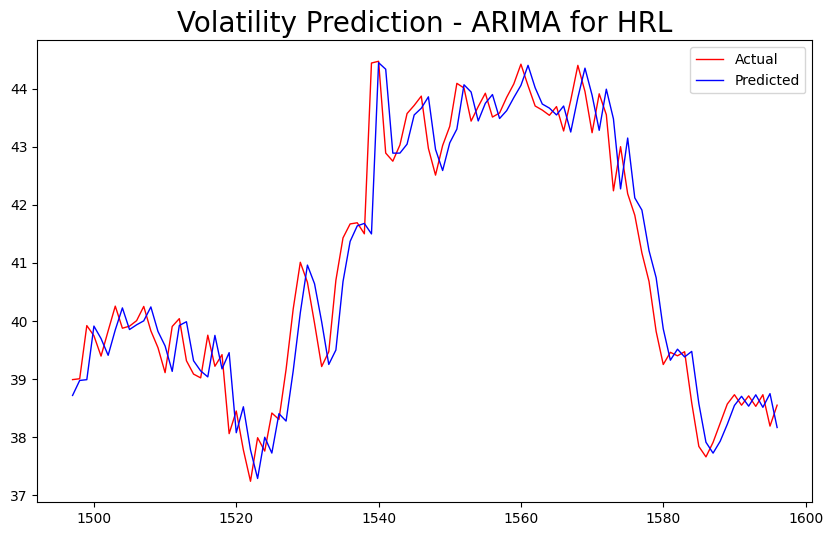

MSE: 0.33922996905693575
RMSE: 0.5824345191151841
MAE: 0.418233850503869
MAPE: 1.0977118148923841
SMAPE: 1.095637634000109
R²: 0.9584290948550171
Overall Score: 0.9860654459633688

ARIMA(0, 0, 0) AIC: 6429.193254107833
ARIMA(0, 0, 1) AIC: 4519.024131510636
ARIMA(0, 0, 2) AIC: 2993.938442824164
ARIMA(0, 0, 3) AIC: 1990.6153341284517
ARIMA(1, 0, 0) AIC: -1723.7965546280193
ARIMA(1, 0, 1) AIC: -1727.3307023325447
ARIMA(1, 0, 2) AIC: -1725.7595557404209
ARIMA(1, 0, 3) AIC: -1725.7523364003994
ARIMA(2, 0, 0) AIC: -1727.1997087458794
ARIMA(2, 0, 1) AIC: -1727.4810450402092
ARIMA(2, 0, 2) AIC: -1727.5807703328603
ARIMA(2, 0, 3) AIC: -1726.8003414177006
ARIMA(3, 0, 0) AIC: -1725.294575829007
ARIMA(3, 0, 1) AIC: -1726.8225682501393
ARIMA(3, 0, 2) AIC: -1724.146218388902
ARIMA(3, 0, 3) AIC: -1730.021862070616
ARIMA(0, 1, 0) AIC: -1733.2088913417838
ARIMA(0, 1, 1) AIC: -1736.8617890259025
ARIMA(0, 1, 2) AIC: -1734.890083872599
ARIMA(0, 1, 3) AIC: -1735.0290460653036
ARIMA(1, 1, 0) AIC: -1736.8175

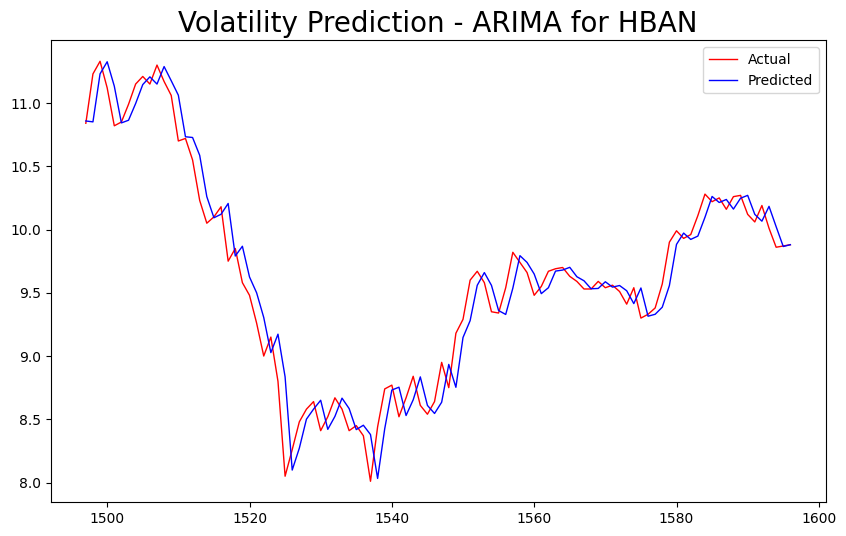

MSE: 0.03799592277335903
RMSE: 0.19492542874996846
MAE: 0.14008117477202736
MAPE: 1.4129248441793494
SMAPE: 1.412070646546142
R²: 0.975684458886748
Overall Score: 0.9911660353828305

ARIMA(0, 0, 0) AIC: 10987.493027182543
ARIMA(0, 0, 1) AIC: 8959.351018249441
ARIMA(0, 0, 2) AIC: 7260.468866112225
ARIMA(0, 0, 3) AIC: 5937.690756791649
ARIMA(1, 0, 0) AIC: 714.782163529456
ARIMA(1, 0, 1) AIC: 711.169377866335
ARIMA(1, 0, 2) AIC: 713.6890094922398
ARIMA(1, 0, 3) AIC: 711.2191675771254
ARIMA(2, 0, 0) AIC: 711.2471688825115
ARIMA(2, 0, 1) AIC: 713.379161899534
ARIMA(2, 0, 2) AIC: 707.7974906547588
ARIMA(2, 0, 3) AIC: 710.5990540227768
ARIMA(3, 0, 0) AIC: 713.9246660286004
ARIMA(3, 0, 1) AIC: 705.6852076254107
ARIMA(3, 0, 2) AIC: 716.1750301687509
ARIMA(3, 0, 3) AIC: 715.6976965089907
ARIMA(0, 1, 0) AIC: 703.3682636209228
ARIMA(0, 1, 1) AIC: 697.8842271852641
ARIMA(0, 1, 2) AIC: 699.6808151436269
ARIMA(0, 1, 3) AIC: 699.7490410946291
ARIMA(1, 1, 0) AIC: 698.1271064746725
ARIMA(1, 1, 1) AIC: 6

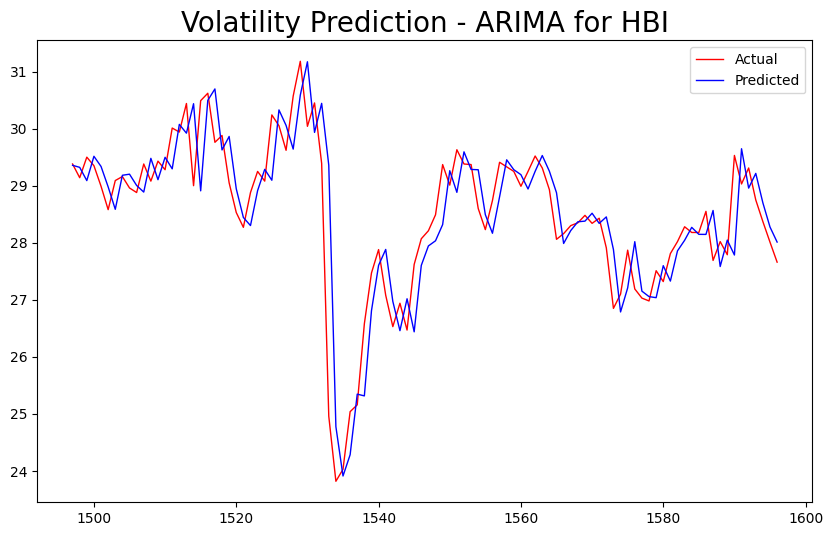

MSE: 0.30192370900154625
RMSE: 0.5494758493342052
MAE: 0.37065326583077984
MAPE: 1.384471776237346
SMAPE: 1.3791781411606965
R²: 0.931581001620689
Overall Score: 0.9804154713212341



In [ ]:
import warnings
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import ParameterGrid

# Hàm tính MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Hàm tính SMAPE
def symmetric_mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return 100 * np.mean(2 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred)))

# Hàm đánh giá mô hình với các chỉ số tổng hợp
def evaluate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    smape = symmetric_mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')
    print(f'MAPE: {mape}')
    print(f'SMAPE: {smape}')
    print(f'R²: {r2}')

    weight_r2 = 0.2
    weight_rmse = 0.3
    weight_mae = 0.2
    weight_mse = 0.1
    weight_mape = 0.1
    weight_smape = 0.1

    max_rmse = 100
    max_mae = 50
    max_mse = 5000
    max_mape = 100
    max_smape = 100

    rmse_normalized = 1 - (rmse / max_rmse)
    mae_normalized = 1 - (mae / max_mae)
    mse_normalized = 1 - (mse / max_mse)
    mape_normalized = 1 - (mape / max_mape)
    smape_normalized = 1 - (smape / max_smape)

    overall_score = (weight_r2 * r2) + \
                    (weight_rmse * rmse_normalized) + \
                    (weight_mae * mae_normalized) + \
                    (weight_mse * mse_normalized) + \
                    (weight_mape * mape_normalized) + \
                    (weight_smape * smape_normalized)

    print(f'Overall Score: {overall_score}\n')

# Grid Search cho ARIMA
def arima_grid_search(train_data, p_values, d_values, q_values):
    warnings.simplefilter('ignore')
    best_score, best_cfg = float("inf"), None
    grid = ParameterGrid({'p': p_values, 'd': d_values, 'q': q_values})
    for params in grid:
        order = (params['p'], params['d'], params['q'])
        try:
            model = ARIMA(train_data, order=order)
            model_fit = model.fit()
            aic = model_fit.aic
            if aic < best_score:
                best_score, best_cfg = aic, order
            print(f'ARIMA{order} AIC: {aic}')
        except:
            continue
    print(f'Best ARIMA{best_cfg} AIC: {best_score}')
    return best_cfg

# Hàm huấn luyện và dự đoán ARIMA
def arima_walk_forward(train_data, test_data, parameter, ticker):
    warnings.simplefilter('ignore')
    arm_history = [x for x in train_data['ClosePrice']]
    arm_predictions = list()

    # Walk-forward validation
    for t in range(len(test_data)):
        arm_model = ARIMA(arm_history, order=parameter)
        arm_model_fit = arm_model.fit()
        output = arm_model_fit.forecast()
        yhat = output[0]
        arm_predictions.append(yhat)
        obs = test_data['ClosePrice'].iloc[t]
        arm_history.append(obs)

    # Tạo series cho dự đoán
    arm_predictions = pd.Series(arm_predictions, index=test_data.index)

    # Vẽ biểu đồ dự đoán so với giá thực tế
    plt.figure(figsize=(10, 6))
    plt.plot(test_data['ClosePrice'][:100], color='red', linewidth=1, label='Actual')
    plt.plot(arm_predictions[:100], color='blue', linewidth=1, label='Predicted')
    plt.title(f'Volatility Prediction - ARIMA for {ticker}', fontsize=20)
    plt.legend()
    plt.show()

    # Đánh giá mô hình
    evaluate_metrics(test_data['ClosePrice'], arm_predictions)

# Lặp qua từng ticker, chia dữ liệu, huấn luyện ARIMA và đánh giá
for ticker, df in ticker_data.items():
    # Chia dữ liệu thành tập huấn luyện (85%) và kiểm tra (15%)
    train_percent = 0.85
    train_data, test_data = df[:int(len(df) * train_percent)], df[int(len(df) * train_percent):]

    # Tìm tham số tốt nhất bằng GridSearch cho ARIMA
    p_values = range(0, 4)
    d_values = range(0, 2)
    q_values = range(0, 4)
    best_order = arima_grid_search(train_data['ClosePrice'], p_values, d_values, q_values)

    # Huấn luyện ARIMA và dự đoán
    arima_walk_forward(train_data, test_data, best_order, ticker)


| Ticker | Best ARIMA Order | MSE        | RMSE      | MAE       | MAPE      | SMAPE     | R²        | Overall Score |
|--------|------------------|------------|-----------|-----------|-----------|-----------|-----------|---------------|
| HRL    | (2, 1, 0)        | 0.339230   | 0.582435  | 0.418234  | 1.097712  | 1.095638  | 0.958429  | 0.986065      |
| HBAN   | (2, 1, 2)        | 0.037996   | 0.194925  | 0.140081  | 1.412925  | 1.412071  | 0.975684  | 0.991166      |
| HBI    | (3, 1, 2)        | 0.301924   | 0.549476  | 0.370653  | 1.384472  | 1.379178  | 0.931581  | 0.980415      |



## 3.3 Xây dựng mô hình LSTM

Training and predicting for HRL
Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 126ms/step - loss: 0.0319 - val_loss: 0.0025
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - loss: 4.6707e-04 - val_loss: 5.9251e-04
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 162ms/step - loss: 9.9825e-05 - val_loss: 6.6144e-04
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 7.5254e-05 - val_loss: 6.3116e-04
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - loss: 7.2343e-05 - val_loss: 6.0117e-04
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 9s 255ms/step - loss: 7.7263e-05 - val_loss: 5.1960e-04
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 8.3179e-05 - val_loss: 4.8423e-04
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 145ms/step - loss: 6.9940e-05 - val_loss: 4.9873e-04
Epoch 9/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - loss: 7.6366e-05 - val_loss: 4.7033e-04
Epoch 10/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 107ms/step - loss: 6.9628e-05 - val_loss: 4.8399e-04
Epoch 11/100
28/28 ━━━━━━

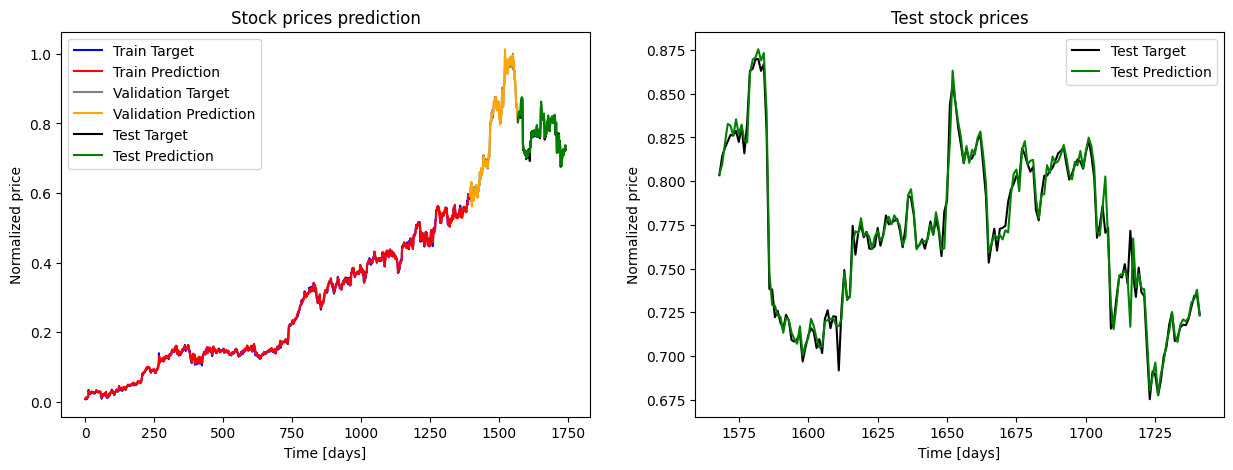

Training and predicting for HBAN
Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 129ms/step - loss: 0.0629 - val_loss: 0.0018
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 159ms/step - loss: 0.0021 - val_loss: 0.0012
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - loss: 4.2602e-04 - val_loss: 9.7130e-04
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - loss: 2.9462e-04 - val_loss: 8.4335e-04
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 189ms/step - loss: 3.3940e-04 - val_loss: 7.9506e-04
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - loss: 3.0136e-04 - val_loss: 7.2622e-04
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - loss: 3.1103e-04 - val_loss: 7.0894e-04
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 209ms/step - loss: 2.7893e-04 - val_loss: 6.6752e-04
Epoch 9/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - loss: 2.6989e-04 - val_loss: 6.3612e-04
Epoch 10/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 214ms/step - loss: 2.3916e-04 - val_loss: 6.2449e-04
Epoch 11/100
28/28 ━━━━━━━━━━━━━

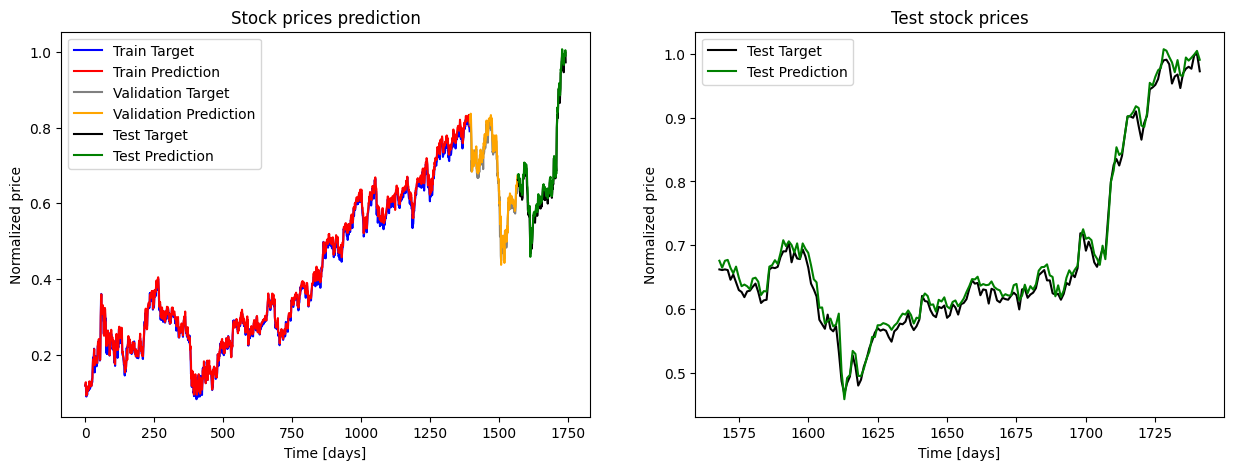

Training and predicting for HBI
Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - loss: 0.0663 - val_loss: 0.0111
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 200ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 112ms/step - loss: 2.4629e-04 - val_loss: 0.0014
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 204ms/step - loss: 1.8412e-04 - val_loss: 0.0013
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 8s 110ms/step - loss: 1.4251e-04 - val_loss: 0.0013
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 149ms/step - loss: 1.7550e-04 - val_loss: 0.0012
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 171ms/step - loss: 1.7947e-04 - val_loss: 0.0012
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - loss: 1.4117e-04 - val_loss: 0.0012
Epoch 9/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - loss: 1.4366e-04 - val_loss: 0.0012
Epoch 10/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 148ms/step - loss: 1.4051e-04 - val_loss: 0.0011
Epoch 11/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 206ms/step - loss: 1.3

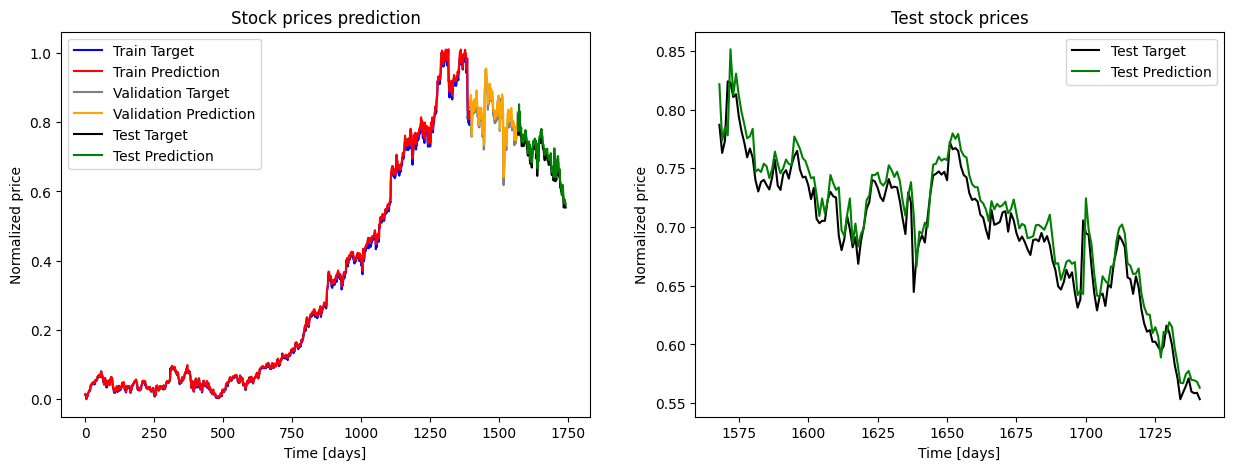

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.preprocessing
import tensorflow as tf
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Hàm tính các chỉ số MSE, RMSE, RMSA, MAE, và R²
def calculate_metrics(y_true, y_pred, max_rmse=100, max_mae=50, max_mse=5000, max_mape=100, max_smape=100):
    # Tính các chỉ số
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mae = mean_absolute_error(y_true, y_pred)

    # Tính MAPE và SMAPE
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    smape = 100 * np.mean(2 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred)))

    # Chuẩn hóa các chỉ số (giả định max tương ứng)
    r2_normalized = r2  # R² đã nằm trong khoảng [0, 1]

    # Chuẩn hóa các chỉ số còn lại
    rmse_normalized = 1 - (rmse / max_rmse)
    mae_normalized = 1 - (mae / max_mae)
    mse_normalized = 1 - (mse / max_mse)
    mape_normalized = 1 - (mape / max_mape)
    smape_normalized = 1 - (smape / max_smape)

    # Gán trọng số
    weight_r2 = 0.2
    weight_rmse = 0.3
    weight_mae = 0.2
    weight_mse = 0.1
    weight_mape = 0.1
    weight_smape = 0.1

    # Tính chỉ số tổng hợp
    overall_score = (weight_r2 * r2_normalized) + \
                    (weight_rmse * rmse_normalized) + \
                    (weight_mae * mae_normalized) + \
                    (weight_mse * mse_normalized) + \
                    (weight_mape * mape_normalized) + \
                    (weight_smape * smape_normalized)

    return {
        'R²': r2,
        'RMSE': rmse,
        'MAE': mae,
        'MSE': mse,
        'MAPE': mape,
        'SMAPE': smape,
        'Overall Score': overall_score
    }

# Function for min-max normalization of stock
def normalize_data(df):
    min_max_scaler = sklearn.preprocessing.MinMaxScaler()
    df['OpenPrice'] = min_max_scaler.fit_transform(df['OpenPrice'].values.reshape(-1, 1))
    df['HighPrice'] = min_max_scaler.fit_transform(df['HighPrice'].values.reshape(-1, 1))
    df['LowPrice'] = min_max_scaler.fit_transform(df['LowPrice'].values.reshape(-1, 1))
    df['ClosePrice'] = min_max_scaler.fit_transform(df['ClosePrice'].values.reshape(-1, 1))
    if 'Volume' in df.columns:
        df['Volume'] = min_max_scaler.fit_transform(df['Volume'].values.reshape(-1, 1))
    return df

# Function to create train, validation, test data given stock data and sequence length
def load_data(stock, seq_len):
    # Convert DataFrame to numpy array with only the necessary columns
    data_raw = stock[['OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice']].to_numpy()

    data = []

    # Create all possible sequences of length seq_len
    for index in range(len(data_raw) - seq_len):
        data.append(data_raw[index: index + seq_len])

    data = np.array(data)
    valid_set_size_percentage = 10
    test_set_size_percentage = 10

    valid_set_size = int(np.round(valid_set_size_percentage/100 * data.shape[0]))
    test_set_size = int(np.round(test_set_size_percentage/100 * data.shape[0]))
    train_set_size = data.shape[0] - (valid_set_size + test_set_size)

    x_train = data[:train_set_size, :-1, :]
    y_train = data[:train_set_size, -1, :]  # Dự đoán giá trị cuối cùng của chuỗi
    x_valid = data[train_set_size:train_set_size + valid_set_size, :-1, :]
    y_valid = data[train_set_size:train_set_size + valid_set_size, -1, :]
    x_test = data[train_set_size + valid_set_size:, :-1, :]
    y_test = data[train_set_size + valid_set_size:, -1, :]

    return [x_train, y_train, x_valid, y_valid, x_test, y_test]

# Hàm chính để train và dự đoán cho từng ticker
def train_for_ticker(df, seq_len=20):
    # Normalize stock data
    df_stock_norm = df.copy()
    df_stock_norm = normalize_data(df_stock_norm)

    # Create train, test data
    x_train, y_train, x_valid, y_valid, x_test, y_test = load_data(df_stock_norm, seq_len)

    # Convert NumPy arrays to float32
    x_train = x_train.astype('float32')
    y_train = y_train.astype('float32')
    x_valid = x_valid.astype('float32')
    y_valid = y_valid.astype('float32')
    x_test = x_test.astype('float32')
    y_test = y_test.astype('float32')

    # Parameters
    n_steps = seq_len-1
    n_inputs = 4  # Số lượng đầu vào (OpenPrice, HighPrice, LowPrice, ClosePrice)
    n_neurons = 200
    n_outputs = 4  # Dự đoán tất cả giá trị đầu ra (Open, Close, High, Low)
    n_layers = 2
    learning_rate = 0.001
    batch_size = 50
    n_epochs = 100
    train_set_size = x_train.shape[0]

    # Build the model
    model = tf.keras.Sequential()
    for _ in range(n_layers - 1):
        model.add(tf.keras.layers.GRU(units=n_neurons, activation='leaky_relu', return_sequences=True))
    # Ở lớp cuối cùng đặt return_sequences=False để chỉ trả về đầu ra cuối cùng
    model.add(tf.keras.layers.GRU(units=n_neurons, activation='leaky_relu', return_sequences=False))
    model.add(tf.keras.layers.Dense(n_outputs))

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), loss='mean_squared_error')

    # Train the model with validation data
    model.fit(x_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_data=(x_valid, y_valid))

    # Predictions
    y_train_pred = model.predict(x_train)
    y_valid_pred = model.predict(x_valid)
    y_test_pred = model.predict(x_test)

    # Calculate and print metrics for test set
    test_metrics = calculate_metrics(y_test, y_test_pred)
    print(f'Test Metrics: {test_metrics}')

    # Calculate and print metrics for validation set
    val_metrics = calculate_metrics(y_valid, y_valid_pred)
    print(f'Validation Metrics: {val_metrics}')

    # Show predictions
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(np.arange(y_train.shape[0]), y_train[:, 0], color='blue', label='Train Target')
    plt.plot(np.arange(y_train_pred.shape[0]), y_train_pred[:, 0], color='red', label='Train Prediction')
    plt.plot(np.arange(y_train.shape[0], y_train.shape[0] + y_valid.shape[0]), y_valid[:, 0], color='gray', label='Validation Target')
    plt.plot(np.arange(y_train_pred.shape[0], y_train_pred.shape[0] + y_valid_pred.shape[0]), y_valid_pred[:, 0], color='orange', label='Validation Prediction')
    plt.plot(np.arange(y_train.shape[0] + y_valid.shape[0], y_train.shape[0] + y_valid.shape[0] + y_test.shape[0]), y_test[:, 0], color='black', label='Test Target')
    plt.plot(np.arange(y_train_pred.shape[0] + y_valid_pred.shape[0], y_train_pred.shape[0] + y_valid_pred.shape[0] + y_test_pred.shape[0]), y_test_pred[:, 0], color='green', label='Test Prediction')
    plt.title('Stock prices prediction')
    plt.xlabel('Time [days]')
    plt.ylabel('Normalized price')
    plt.legend(loc='best')

    plt.subplot(1, 2, 2)
    plt.plot(np.arange(y_train.shape[0] + y_valid.shape[0], y_train.shape[0] + y_valid.shape[0] + y_test.shape[0]), y_test[:, 0], color='black', label='Test Target')
    plt.plot(np.arange(y_train_pred.shape[0] + y_valid_pred.shape[0], y_train_pred.shape[0] + y_valid_pred.shape[0] + y_test_pred.shape[0]), y_test_pred[:, 0], color='green', label='Test Prediction')
    plt.title('Test stock prices')
    plt.xlabel('Time [days]')
    plt.ylabel('Normalized price')
    plt.legend(loc='best')

    plt.show()


# Áp dụng mô hình cho từng ticker
for ticker, df in ticker_data.items():
    print(f'Training and predicting for {ticker}')
    train_for_ticker(df)


| Ticker | Metrics            | R²        | RMSE      | MAE       | MSE        | MAPE      | SMAPE     | Overall Score |
|--------|--------------------|-----------|-----------|-----------|------------|-----------|-----------|---------------|
| HRL    | Test Metrics        | 0.914163  | 0.012827  | 0.009161  | 0.000180   | 1.186756  | 1.191437  | 0.980379      |
| HRL    | Validation Metrics  | 0.988453  | 0.014082  | 0.010509  | 0.000211   | 1.345136  | 1.355240  | 0.994906      |
| HBAN   | Test Metrics        | 0.980945  | 0.017840  | 0.013316  | 0.000342   | 1.963405  | 1.983849  | 0.992135      |
| HBAN   | Validation Metrics  | 0.966375  | 0.018452  | 0.014413  | 0.000352   | 2.247224  | 2.259271  | 0.988656      |
| HBI    | Test Metrics        | 0.927313  | 0.015235  | 0.011035  | 0.000241   | 1.585566  | 1.575094  | 0.982212      |
| HBI    | Validation Metrics  | 0.846295  | 0.020485  | 0.014165  | 0.000438   | 1.761767  | 1.750092  | 0.965629      |



## 3.4 Xây sựng mô hình XGBoost

Processing HRL...
[0]	test-rmse:9.06950
[1]	test-rmse:8.97887
[2]	test-rmse:8.89064
[3]	test-rmse:8.80250
[4]	test-rmse:8.71514
[5]	test-rmse:8.62814
[6]	test-rmse:8.54295
[7]	test-rmse:8.45801
[8]	test-rmse:8.37400
[9]	test-rmse:8.29236
[10]	test-rmse:8.21014
[11]	test-rmse:8.12872
[12]	test-rmse:8.04792
[13]	test-rmse:7.96807
[14]	test-rmse:7.88971
[15]	test-rmse:7.81138
[16]	test-rmse:7.73415
[17]	test-rmse:7.65743
[18]	test-rmse:7.58166
[19]	test-rmse:7.50645
[20]	test-rmse:7.43248
[21]	test-rmse:7.35872
[22]	test-rmse:7.28589
[23]	test-rmse:7.21374
[24]	test-rmse:7.14248
[25]	test-rmse:7.07182
[26]	test-rmse:7.00182
[27]	test-rmse:6.93260
[28]	test-rmse:6.86379
[29]	test-rmse:6.79586
[30]	test-rmse:6.72877
[31]	test-rmse:6.66225
[32]	test-rmse:6.59599
[33]	test-rmse:6.53078
[34]	test-rmse:6.46602
[35]	test-rmse:6.40236


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:14:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[36]	test-rmse:6.33899
[37]	test-rmse:6.27649
[38]	test-rmse:6.21446
[39]	test-rmse:6.15290
[40]	test-rmse:6.09229
[41]	test-rmse:6.03178
[42]	test-rmse:5.97224
[43]	test-rmse:5.91331
[44]	test-rmse:5.85529
[45]	test-rmse:5.79747
[46]	test-rmse:5.74032
[47]	test-rmse:5.68364
[48]	test-rmse:5.62772
[49]	test-rmse:5.57185
[50]	test-rmse:5.51743
[51]	test-rmse:5.46293
[52]	test-rmse:5.40975
[53]	test-rmse:5.35647
[54]	test-rmse:5.30359
[55]	test-rmse:5.25185
[56]	test-rmse:5.20043
[57]	test-rmse:5.14919
[58]	test-rmse:5.09847
[59]	test-rmse:5.04820
[60]	test-rmse:4.99844
[61]	test-rmse:4.94908
[62]	test-rmse:4.90065
[63]	test-rmse:4.85227
[64]	test-rmse:4.80452
[65]	test-rmse:4.75751
[66]	test-rmse:4.71073
[67]	test-rmse:4.66434
[68]	test-rmse:4.61841
[69]	test-rmse:4.57296
[70]	test-rmse:4.52811
[71]	test-rmse:4.48363
[72]	test-rmse:4.43978
[73]	test-rmse:4.39606
[74]	test-rmse:4.35279
[75]	test-rmse:4.30993
[76]	test-rmse:4.26820
[77]	test-rmse:4.22632
[78]	test-rmse:4.18454
[79]	test-r

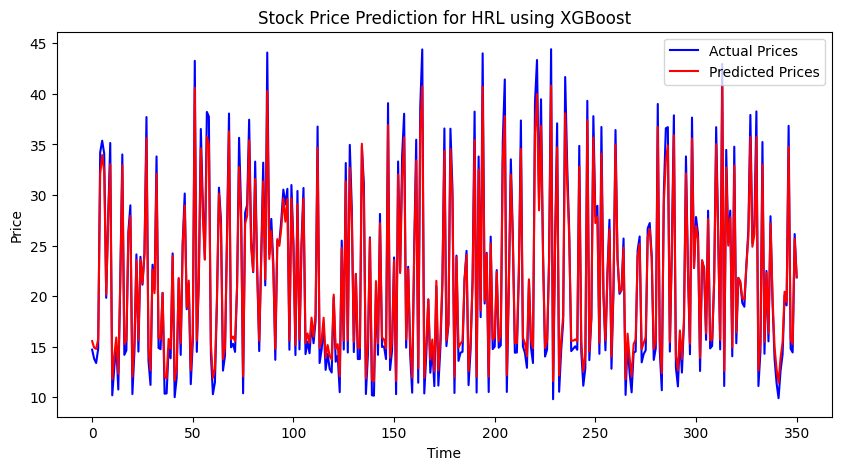

Processing HBAN...
[0]	test-rmse:2.13775
[1]	test-rmse:2.11689
[2]	test-rmse:2.09597
[3]	test-rmse:2.07513
[4]	test-rmse:2.05453
[5]	test-rmse:2.03437
[6]	test-rmse:2.01427
[7]	test-rmse:1.99430
[8]	test-rmse:1.97453
[9]	test-rmse:1.95492
[10]	test-rmse:1.93552
[11]	test-rmse:1.91632
[12]	test-rmse:1.89748
[13]	test-rmse:1.87868
[14]	test-rmse:1.86022
[15]	test-rmse:1.84187
[16]	test-rmse:1.82379
[17]	test-rmse:1.80572
[18]	test-rmse:1.78779
[19]	test-rmse:1.77012
[20]	test-rmse:1.75273
[21]	test-rmse:1.73538
[22]	test-rmse:1.71814
[23]	test-rmse:1.70112
[24]	test-rmse:1.68439
[25]	test-rmse:1.66777
[26]	test-rmse:1.65122


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:14:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[27]	test-rmse:1.63490
[28]	test-rmse:1.61883
[29]	test-rmse:1.60288
[30]	test-rmse:1.58707
[31]	test-rmse:1.57153
[32]	test-rmse:1.55623
[33]	test-rmse:1.54086
[34]	test-rmse:1.52568
[35]	test-rmse:1.51071
[36]	test-rmse:1.49592
[37]	test-rmse:1.48117
[38]	test-rmse:1.46659
[39]	test-rmse:1.45215
[40]	test-rmse:1.43795
[41]	test-rmse:1.42391
[42]	test-rmse:1.40986
[43]	test-rmse:1.39599
[44]	test-rmse:1.38236
[45]	test-rmse:1.36873
[46]	test-rmse:1.35531
[47]	test-rmse:1.34201
[48]	test-rmse:1.32900
[49]	test-rmse:1.31601
[50]	test-rmse:1.30310
[51]	test-rmse:1.29024
[52]	test-rmse:1.27783
[53]	test-rmse:1.26534
[54]	test-rmse:1.25295
[55]	test-rmse:1.24069
[56]	test-rmse:1.22860
[57]	test-rmse:1.21654
[58]	test-rmse:1.20469
[59]	test-rmse:1.19293
[60]	test-rmse:1.18124
[61]	test-rmse:1.16978
[62]	test-rmse:1.15853
[63]	test-rmse:1.14718
[64]	test-rmse:1.13595
[65]	test-rmse:1.12493
[66]	test-rmse:1.11398
[67]	test-rmse:1.10323
[68]	test-rmse:1.09250
[69]	test-rmse:1.08201
[70]	test-r

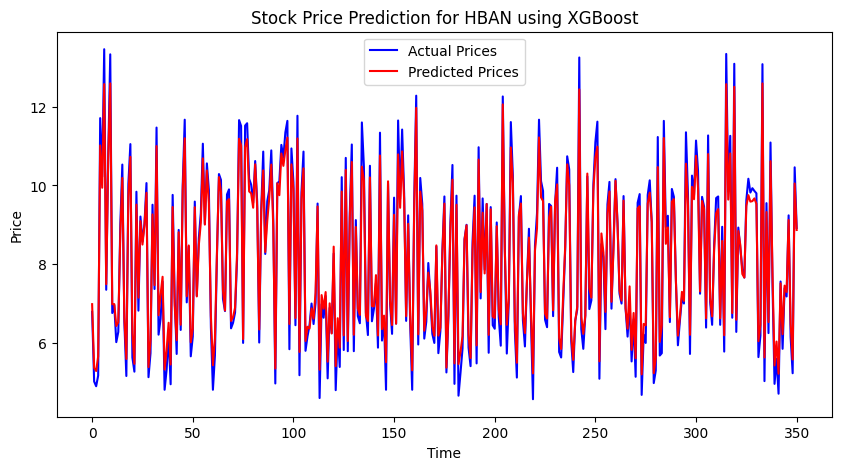

Processing HBI...
[0]	test-rmse:9.55703
[1]	test-rmse:9.46200
[2]	test-rmse:9.36711
[3]	test-rmse:9.27379
[4]	test-rmse:9.18088
[5]	test-rmse:9.08927
[6]	test-rmse:8.99828
[7]	test-rmse:8.90833
[8]	test-rmse:8.81947
[9]	test-rmse:8.73068
[10]	test-rmse:8.64387
[11]	test-rmse:8.55782
[12]	test-rmse:8.47267
[13]	test-rmse:8.38847
[14]	test-rmse:8.30430
[15]	test-rmse:8.22078
[16]	test-rmse:8.13869
[17]	test-rmse:8.05767
[18]	test-rmse:7.97706
[19]	test-rmse:7.89764


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:14:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[20]	test-rmse:7.81864
[21]	test-rmse:7.74088
[22]	test-rmse:7.66384
[23]	test-rmse:7.58707
[24]	test-rmse:7.51155
[25]	test-rmse:7.43693
[26]	test-rmse:7.36283
[27]	test-rmse:7.28945
[28]	test-rmse:7.21684
[29]	test-rmse:7.14484
[30]	test-rmse:7.07358
[31]	test-rmse:7.00304
[32]	test-rmse:6.93335
[33]	test-rmse:6.86440
[34]	test-rmse:6.79589
[35]	test-rmse:6.72784
[36]	test-rmse:6.66085
[37]	test-rmse:6.59473
[38]	test-rmse:6.52902
[39]	test-rmse:6.46403
[40]	test-rmse:6.39949
[41]	test-rmse:6.33556
[42]	test-rmse:6.27276
[43]	test-rmse:6.21034
[44]	test-rmse:6.14828
[45]	test-rmse:6.08708
[46]	test-rmse:6.02648
[47]	test-rmse:5.96642
[48]	test-rmse:5.90684
[49]	test-rmse:5.84812
[50]	test-rmse:5.78970
[51]	test-rmse:5.73184
[52]	test-rmse:5.67436
[53]	test-rmse:5.61782
[54]	test-rmse:5.56188
[55]	test-rmse:5.50638
[56]	test-rmse:5.45148
[57]	test-rmse:5.39716
[58]	test-rmse:5.34341
[59]	test-rmse:5.29009
[60]	test-rmse:5.23741
[61]	test-rmse:5.18523
[62]	test-rmse:5.13342
[63]	test-r

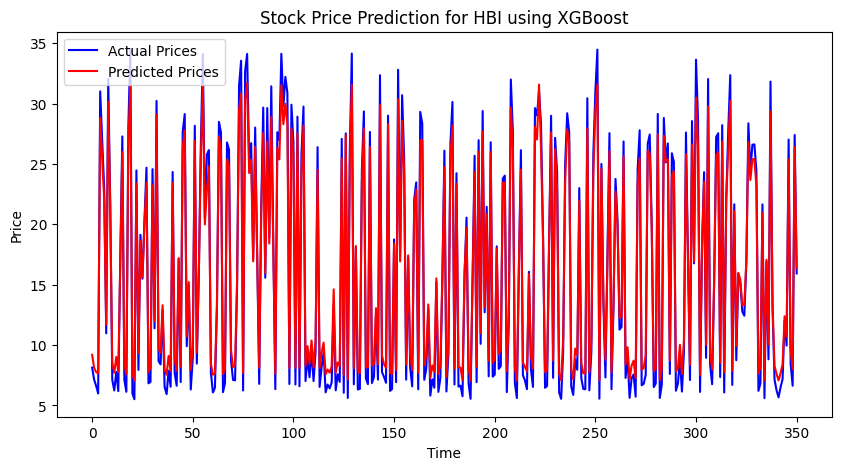

In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
import matplotlib.pyplot as plt

# Functions to calculate technical indicators
def calculate_bollinger_bands(data, window=10, num_of_std=2):
    """Calculate Bollinger Bands"""
    rolling_mean = data.rolling(window=window).mean()
    rolling_std = data.rolling(window=window).std()
    upper_band = rolling_mean + (rolling_std * num_of_std)
    lower_band = rolling_mean - (rolling_std * num_of_std)
    return upper_band, lower_band

def calculate_rsi(data, window=10):
    """Calculate Relative Strength Index"""
    delta = data.diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_roc(data, periods=10):
    """Calculate Rate of Change."""
    roc = ((data - data.shift(periods)) / data.shift(periods)) * 100
    return roc

# Custom evaluation function
def evaluate_model(y_true, y_pred):
    # Calculate evaluation metrics
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    smape = 100 * np.mean(2 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred)))

    # Weights for the scores
    weight_r2 = 0.2
    weight_rmse = 0.3
    weight_mae = 0.2
    weight_mse = 0.1
    weight_mape = 0.1
    weight_smape = 0.1

    # Max values for normalization (adjust as needed)
    max_rmse = 100
    max_mae = 50
    max_mse = 5000
    max_mape = 100
    max_smape = 100

    # Normalize scores between 0 and 1
    r2_normalized = r2  # R² is already between [0, 1]
    rmse_normalized = 1 - (rmse / max_rmse)
    mae_normalized = 1 - (mae / max_mae)
    mse_normalized = 1 - (mse / max_mse)
    mape_normalized = 1 - (mape / max_mape)
    smape_normalized = 1 - (smape / max_smape)

    # Calculate overall score
    overall_score = (weight_r2 * r2_normalized) + \
                    (weight_rmse * rmse_normalized) + \
                    (weight_mae * mae_normalized) + \
                    (weight_mse * mse_normalized) + \
                    (weight_mape * mape_normalized) + \
                    (weight_smape * smape_normalized)

    # Print evaluation metrics
    print(f'R²: {r2}')
    print(f'MSE: {mse}')
    print(f'RMSE: {rmse}')
    print(f'MAE: {mae}')
    print(f'MAPE: {mape}')
    print(f'SMAPE: {smape}')
    print(f'Overall Score: {overall_score}')

    return overall_score

# List of tickers
tickers = ['HRL', 'HBAN', 'HBI']

# Loop through each ticker
for ticker in tickers:
    print(f"Processing {ticker}...")

    # Load data for each ticker
    data = pd.read_csv(f'{ticker}.csv')

    # Prepare data (using 'ClosePrice')
    data['ClosePrice'] = data['ClosePrice']

    # Calculate technical indicators
    data['UpperBand'], data['LowerBand'] = calculate_bollinger_bands(data['ClosePrice'])
    data['RSI'] = calculate_rsi(data['ClosePrice'])
    data['ROC'] = calculate_roc(data['ClosePrice'])

    # Drop NaN values generated by rolling calculations
    data = data.dropna()

    # Define features and target variable
    features = ['ClosePrice', 'UpperBand', 'LowerBand', 'RSI', 'ROC']
    target = 'ClosePrice'

    # Normalize features
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data[features])

    # Prepare data for XGBoost
    X = data_scaled[:-1]  # Features
    y = data[target].shift(-1).dropna().values  # Predict next day ClosePrice
    y = y[:len(X)]  # Ensure target length matches input length

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create XGBoost DMatrix
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)

    # XGBoost model parameters
    params = {
        'objective': 'reg:squarederror',  # Regression task
        'max_depth': 6,
        'learning_rate': 0.01,
        'n_estimators': 1000,
        'colsample_bytree': 0.7,
        'subsample': 0.8,
        'alpha': 0.01,
        'lambda': 0.01,
        'seed': 42
    }

    # Train the XGBoost model
    model = xgb.train(params, dtrain, num_boost_round=200, evals=[(dtest, 'test')], early_stopping_rounds=10)

    # Predict on test data
    y_pred = model.predict(dtest)

    # Evaluate the model
    print(f"Results for {ticker}:")
    overall_score = evaluate_model(y_test, y_pred)

    # Plot actual vs predicted prices
    plt.figure(figsize=(10, 5))
    plt.plot(y_test, label='Actual Prices', color='blue')
    plt.plot(y_pred, label='Predicted Prices', color='red')
    plt.title(f'Stock Price Prediction for {ticker} using XGBoost')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()
